# Predicting Default in P2P Lending: Leveraging Supervised Machine Learning and Macroeconomic Factors for Enhanced Risk Assessment

## Data Collection

In [ ]:
%reset -f

In [ ]:
# Importing the required libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import os #??
import hvplot.pandas
import gc

In [ ]:
# Reading the LendingClub Loan Data
df_loans = pd.read_csv(r"C:/Users/Lawrence/Documents/Master Digital Driven Business/Master Thesis/Python Research Folder/loan.csv")

C:\Users\Lawrence\AppData\Local\Temp\ipykernel_10832\3924328017.py:2: DtypeWarning: Columns (19,47,55,112,123,124,125,128,129,130,133,139,140,141) have mixed types. Specify dtype option on import or set low_memory=False.
  df_loans = pd.read_csv(r"C:/Users/Lawrence/Documents/Master Digital Driven Business/Master Thesis/Python Research Folder/loan.csv")


In [ ]:
# Reading the change in GDP Data per State
df_dGDP = pd.read_csv(r"C:/Users/Lawrence/Documents/Master Digital Driven Business/Master Thesis/Python Research Folder/Change in GDP.csv")

In [ ]:
# Reading the change in Real GDP per State
df_dRGDP = pd.read_csv(r"C:/Users/Lawrence/Documents/Master Digital Driven Business/Master Thesis/Python Research Folder/Change in Real GDP.csv")

In [ ]:
# Reading the Unemployment rate per State
df_unemp = pd.read_csv(r"C:/Users/Lawrence/Documents/Master Digital Driven Business/Master Thesis/Python Research Folder/Unemployment rate per state per month.csv")

In [ ]:
# Reading the CPI per census region
df_CPI = pd.read_csv(r"C:/Users/Lawrence/Documents/Master Digital Driven Business/Master Thesis/Python Research Folder/CPI per census region.csv")

In [ ]:
# Reading the Russell 2000 index
df_Russell = pd.read_csv(r"C:/Users/Lawrence/Documents/Master Digital Driven Business/Master Thesis/Python Research Folder/Russel 2000 index.csv")

In [ ]:
# Reading the FED interest rates
df_fed = pd.read_csv(r"C:/Users/Lawrence/Documents/Master Digital Driven Business/Master Thesis/Python Research Folder/FEDFUNDS.csv")

### Data Understanding

LendingClub Loan Data

Change in GDP per State year over year

In [ ]:
df_dGDP.head(5)

addr_state  dGDP0607  dGDP0708  dGDP0809  dGDP0910  dGDP1011  dGDP1112  \
0         AL       3.9       0.9      -2.1       3.7       3.8       2.9   
1         AK      10.0      11.2      -9.4       6.8       6.7       2.4   
2         AZ       6.3       0.6      -6.3       1.9       3.9       4.0   
3         AR       2.6       1.3      -2.2       4.1       4.2       2.6   
4         CA       4.8       2.4      -2.8       3.4       3.6       4.4   

   dGDP1213  
0       2.9  
1      -1.8  
2       2.6  
3       4.4  
4       5.1

Change in Real GDP year over year

In [ ]:
df_dRGDP.head(5)

addr_state  dRGDP0607  dRGDP0708  dRGDP0809  dRGDP0910  dRGDP1011  \
0         AL        0.9       -1.1       -3.3        2.2        1.6   
1         AK        5.1       -0.9        9.7       -2.9        1.2   
2         AZ        3.3       -0.9       -8.3        1.1        2.2   
3         AR       -0.8       -1.0       -3.3        2.6        2.1   
4         CA        1.9        1.0       -3.2        2.0        1.4   

   dRGDP1112  dRGDP1213  
0        0.9        1.1  
1        5.4       -5.0  
2        2.0        0.8  
3        0.5        2.1  
4        2.4        3.1

Unemployment rate per month per state

In [ ]:
df_unemp.head()

addr_state  Dec/06  Jan/07  Feb/07  Mar/07  Apr/07  May/07  Jun/07  Jul/07  \
0         AL     3.8     3.8     3.8     3.9     3.9     3.9     4.0     4.0   
1         AK     6.3     6.3     6.2     6.2     6.2     6.2     6.3     6.3   
2         AZ     4.0     3.9     3.9     3.8     3.7     3.6     3.5     3.5   
3         AR     5.3     5.3     5.3     5.3     5.3     5.4     5.5     5.5   
4         CA     4.9     4.9     5.0     5.0     5.1     5.1     5.2     5.3   

   Aug/07  ...  Mar/13  Apr/13  May/13  Jun/13  Jul/13  Aug/13  Sep/13  \
0     4.1  ...     7.5     7.4     7.3     7.3     7.2     7.2     7.2   
1     6.3  ...     7.0     7.0     7.0     7.0     7.0     7.0     7.0   
2     3.5  ...     8.0     8.0     7.9     7.9     7.8     7.8     7.7   
3     5.5  ...     7.2     7.2     7.2     7.1     7.1     7.1     7.0   
4     5.4  ...     9.4     9.3     9.2     9.1     9.0     8.9     8.8   

   Oct/13  Nov/13  Dec/13  
0     7.2     7.2     7.2  
1     7.0     6.9     6.9  
2     7.6     7.5     7.4  
3     6.9     6.7     6.6  
4     8.6     8.5     8.4  

[5 rows x 86 columns]

Consumer Price Index per month per census region

In [ ]:
df_CPI.head()

census_region  Dec/06   Jan/07   Feb/07   Mar/07   Apr/07   May/07   Jun/07  \
0     Northeast   215.2  215.813  216.651  218.334  219.501  220.591  221.579   
1       Midwest   192.9  193.068  194.458  196.389  197.405  199.194  199.263   
2         South   194.8  195.021  195.950  197.904  199.618  200.804  201.675   
3          West   206.2  207.790  208.995  210.778  212.036  213.063  212.680   

    Jul/07   Aug/07  ...   Mar/13   Apr/13   May/13   Jun/13   Jul/13  \
0  221.945  221.559  ...  248.719  248.464  248.584  248.851  249.411   
1  198.989  198.551  ...  222.121  221.931  223.049  223.775  222.902   
2  201.571  201.041  ...  226.628  226.202  226.289  227.148  227.548   
3  212.542  212.406  ...  235.511  235.488  235.979  236.227  236.341   

    Aug/13   Sep/13   Oct/13   Nov/13   Dec/13  
0  249.858  250.231  249.320  249.503  249.567  
1  223.046  223.252  222.171  221.718  221.194  
2  227.837  227.876  227.420  226.811  227.082  
3  236.591  237.146  237.000  236.153  236.096  

[4 rows x 86 columns]

Russell 2000 Index per month

In [ ]:
df_Russell.head()

Date      Open      High       Low    Close* Adj Close**  \
0  Dec 01, 2013  1,142.30  1,167.96  1,099.67  1,163.64    1,163.64   
1  Nov 01, 2013  1,099.09  1,147.00  1,079.08  1,142.89    1,142.89   
2  Oct 01, 2013  1,073.69  1,123.26  1,037.86  1,100.15    1,100.15   
3  Sep 01, 2013  1,019.48  1,082.00  1,009.00  1,073.79    1,073.79   
4  Aug 01, 2013  1,051.23  1,063.52  1,009.46  1,010.90    1,010.90   

           Volume  
0  64,958,820,000  
1  63,509,720,000  
2  76,627,760,000  
3  66,174,410,000  
4  64,802,810,000

Federal Interest Rate per day

In [ ]:
df_fed.head()

DATE  FEDFUNDS
0  2007-01-01      5.25
1  2007-02-01      5.26
2  2007-03-01      5.26
3  2007-04-01      5.25
4  2007-05-01      5.25

## Data Cleaning

LendingClub Data

The id and member_id have been removed by the administrator of this data, pressumably to protect the identity and preserve anonymity of the borrower.

The original dataset contains 145 columns.

We will continue by removing all the unnecessary columns. 

In [ ]:
# Create a list of columns to keep. These are the variables listed in Table 2.
cols_to_keep = ['grade', 'sub_grade', 'int_rate', 'purpose', 'loan_amnt', 'annual_inc', 
                'home_ownership', 'emp_length', 'earliest_cr_line', 'delinq_2yrs', 
                'inq_last_6mths', 'pub_rec', 'revol_util', 'open_acc', 'installment',
                'mths_since_last_delinq', 'dti', 'issue_d', 'term', 'addr_state', 'loan_status']

# Drop other columns
df_loans1 = df_loans[cols_to_keep]

In [ ]:
df_loans1.head(5)

grade sub_grade  int_rate             purpose  loan_amnt  annual_inc  \
0     C        C1     13.56  debt_consolidation       2500     55000.0   
1     D        D2     18.94  debt_consolidation      30000     90000.0   
2     D        D1     17.97  debt_consolidation       5000     59280.0   
3     D        D2     18.94  debt_consolidation       4000     92000.0   
4     C        C4     16.14  debt_consolidation      30000     57250.0   

  home_ownership emp_length earliest_cr_line  delinq_2yrs  ...  pub_rec  \
0           RENT  10+ years         Apr-2001          0.0  ...      1.0   
1       MORTGAGE  10+ years         Jun-1987          0.0  ...      1.0   
2       MORTGAGE    6 years         Apr-2011          0.0  ...      0.0   
3       MORTGAGE  10+ years         Feb-2006          0.0  ...      0.0   
4       MORTGAGE  10+ years         Dec-2000          0.0  ...      0.0   

   revol_util  open_acc  installment  mths_since_last_delinq    dti   issue_d  \
0        10.3       9.0        84.92                     NaN  18.24  Dec-2018   
1        24.2      13.0       777.23                    71.0  26.52  Dec-2018   
2        19.1       8.0       180.69                     NaN  10.51  Dec-2018   
3        78.1      10.0       146.51                     NaN  16.74  Dec-2018   
4         3.6      12.0       731.78                     NaN  26.35  Dec-2018   

         term addr_state loan_status  
0   36 months         NY     Current  
1   60 months         LA     Current  
2   36 months         MI     Current  
3   36 months         WA     Current  
4   60 months         MD     Current  

[5 rows x 21 columns]

In [ ]:
# Changing 'issue_d' to date format
df_loans1['issue_d'] = pd.to_datetime(df_loans1['issue_d'], format='%b-%Y')

C:\Users\Lawrence\AppData\Local\Temp\ipykernel_10832\3478053709.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loans1['issue_d'] = pd.to_datetime(df_loans1['issue_d'], format='%b-%Y')


In [ ]:
# Checking all loan issue dates
df_loans1.sort_values(by='issue_d', inplace=True)
print(df_loans1['issue_d'].unique())

['2007-06-01T00:00:00.000000000' '2007-07-01T00:00:00.000000000'
 '2007-08-01T00:00:00.000000000' '2007-09-01T00:00:00.000000000'
 '2007-10-01T00:00:00.000000000' '2007-11-01T00:00:00.000000000'
 '2007-12-01T00:00:00.000000000' '2008-01-01T00:00:00.000000000'
 '2008-02-01T00:00:00.000000000' '2008-03-01T00:00:00.000000000'
 '2008-04-01T00:00:00.000000000' '2008-05-01T00:00:00.000000000'
 '2008-06-01T00:00:00.000000000' '2008-07-01T00:00:00.000000000'
 '2008-08-01T00:00:00.000000000' '2008-09-01T00:00:00.000000000'
 '2008-10-01T00:00:00.000000000' '2008-11-01T00:00:00.000000000'
 '2008-12-01T00:00:00.000000000' '2009-01-01T00:00:00.000000000'
 '2009-02-01T00:00:00.000000000' '2009-03-01T00:00:00.000000000'
 '2009-04-01T00:00:00.000000000' '2009-05-01T00:00:00.000000000'
 '2009-06-01T00:00:00.000000000' '2009-07-01T00:00:00.000000000'
 '2009-08-01T00:00:00.000000000' '2009-09-01T00:00:00.000000000'
 '2009-10-01T00:00:00.000000000' '2009-11-01T00:00:00.000000000'
 '2009-12-01T00:00:00.000

C:\Users\Lawrence\AppData\Local\Temp\ipykernel_10832\3543506561.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loans1.sort_values(by='issue_d', inplace=True)


In [ ]:
print(df_loans1['term'].unique())

[' 36 months' ' 60 months']


The first loan issued in this dataset was on June 2007, and last loan issued was on December 2018. 

The loan term is either 36 months or 60 months.

So, in order to avoid any current loans, we remove all loans issued from Jan 2014 and after.

In [ ]:
# Filter out rows from 2014 to 2018
df_loans2 = df_loans1[(df_loans1['issue_d'].dt.year < 2014) | (df_loans1['issue_d'].dt.year > 2018)]

In [ ]:
print(df_loans2['loan_status'].value_counts())

Fully Paid                                             192610
Charged Off                                             35336
Does not meet the credit policy. Status:Fully Paid       1988
Does not meet the credit policy. Status:Charged Off       761
Current                                                     9
Late (31-120 days)                                          8
Late (16-30 days)                                           2
In Grace Period                                             2
Name: loan_status, dtype: int64


There are still 21 loans that have not fully matured yet, we can remove these loans without major consequences.

Loans that say: 'Does not meet the credit policy', have been granted a loan in the past, but would not meet the criteria for a loan today.

Only loans that are eligible for a loan today are relevant, so we remove the rest.

In [ ]:
# Keep only 'Fully Paid' and 'Charged Off' loans
df_loans3 = df_loans2[(df_loans2['loan_status'] == 'Fully Paid') | (df_loans2['loan_status'] == 'Charged Off')]

In [ ]:
df_loans3.head()

grade sub_grade  int_rate             purpose  loan_amnt  annual_inc  \
2139270     E        E2     13.75  debt_consolidation       7500     22000.0   
2139264     A        A2      7.43         credit_card       5000     85000.0   
2139247     B        B5      9.96         educational       3500     13500.0   
2139246     B        B2      9.01               other       5000    250000.0   
2139245     F        F4     15.96  debt_consolidation       2700     52200.0   

        home_ownership emp_length earliest_cr_line  delinq_2yrs  ...  pub_rec  \
2139270            OWN   < 1 year         Oct-2003          1.0  ...      0.0   
2139264            OWN     1 year         Oct-1997          0.0  ...      0.0   
2139247           RENT   < 1 year         Dec-2002          0.0  ...      0.0   
2139246       MORTGAGE     1 year         Apr-2003          2.0  ...      0.0   
2139245           RENT     1 year         Aug-2003          0.0  ...      0.0   

         revol_util  open_acc  installment  mths_since_last_delinq    dti  \
2139270        51.5       7.0       255.43                    11.0  14.29   
2139264         0.6       7.0       155.38                     0.0   0.31   
2139247        41.1      10.0       112.87                     0.0  16.44   
2139246        36.6       5.0       159.03                     5.0  10.00   
2139245        92.3      12.0        94.88                     0.0  12.57   

           issue_d        term addr_state loan_status  
2139270 2007-06-01   36 months         MA  Fully Paid  
2139264 2007-07-01   36 months         WI  Fully Paid  
2139247 2007-07-01   36 months         FL  Fully Paid  
2139246 2007-07-01   36 months         NY  Fully Paid  
2139245 2007-07-01   36 months         MA  Fully Paid  

[5 rows x 21 columns]

We will now check for missing values, and remove them if it is not a significant number.

In [ ]:
# Count NaN values per column
nan_counts = df_loans3.isna().sum()

print(nan_counts)

grade                          0
sub_grade                      0
int_rate                       0
purpose                        0
loan_amnt                      0
annual_inc                     0
home_ownership                 0
emp_length                  8964
earliest_cr_line               0
delinq_2yrs                    0
inq_last_6mths                 0
pub_rec                        0
revol_util                   175
open_acc                       0
installment                    0
mths_since_last_delinq    133292
dti                            0
issue_d                        0
term                           0
addr_state                     0
loan_status                    0
dtype: int64


In [ ]:
# Count NaN values per column
nan_counts1 = df_loans3.isna().sum()

# Calculate percentage of total
nan_percentage = (nan_counts1 / len(df_loans3)) * 100

print(nan_percentage)

grade                      0.000000
sub_grade                  0.000000
int_rate                   0.000000
purpose                    0.000000
loan_amnt                  0.000000
annual_inc                 0.000000
home_ownership             0.000000
emp_length                 3.932510
earliest_cr_line           0.000000
delinq_2yrs                0.000000
inq_last_6mths             0.000000
pub_rec                    0.000000
revol_util                 0.076773
open_acc                   0.000000
installment                0.000000
mths_since_last_delinq    58.475253
dti                        0.000000
issue_d                    0.000000
term                       0.000000
addr_state                 0.000000
loan_status                0.000000
dtype: float64


While analyzing the dataset, it was observed that 'Employment Length' had approximately 3.93% missing values and 'Revolving Utilisation' had around 0.1% missing values. Given the relatively low percentage of missing data in these categories, their removal is unlikely to significantly impact the validity or accuracy of subsequent analyses.

On the other hand, 'Months since last delinquency' presented a much more substantial missing data issue, with approximately 58.5% of its values missing. Such a high level of missing data could introduce bias if not handled appropriately. However, studies by Serrano-Cinca, Gutiérrez-Nieto, & López-Palacios (2015) and Emekter, Tu, Jirasakuldech, & Lu (2015) suggest that this variable does not significantly contribute to the prediction of loan defaults.

Therefore, to maintain the robustness of the dataset and avoid potential bias, the 'Months since last delinquency' column will be dropped entirely. This decision not only preserves the maximum number of rows for analysis but also ensures the robustness of future predictive models developed from this dataset.

In [ ]:
df_loans4 = df_loans3.drop(columns=['mths_since_last_delinq']).dropna(subset=['revol_util']).dropna(subset=['emp_length'])

nan_counts1 = df_loans4.isna().sum()

print(nan_counts1)

grade               0
sub_grade           0
int_rate            0
purpose             0
loan_amnt           0
annual_inc          0
home_ownership      0
emp_length          0
earliest_cr_line    0
delinq_2yrs         0
inq_last_6mths      0
pub_rec             0
revol_util          0
open_acc            0
installment         0
dti                 0
issue_d             0
term                0
addr_state          0
loan_status         0
dtype: int64


In [ ]:
# Checking data types
df_loans4.dtypes

grade                       object
sub_grade                   object
int_rate                   float64
purpose                     object
loan_amnt                    int64
annual_inc                 float64
home_ownership              object
emp_length                  object
earliest_cr_line            object
delinq_2yrs                float64
inq_last_6mths             float64
pub_rec                    float64
revol_util                 float64
open_acc                   float64
installment                float64
dti                        float64
issue_d             datetime64[ns]
term                        object
addr_state                  object
loan_status                 object
dtype: object

In [ ]:
# Changing types 
df_loans4['annual_inc'] = df_loans4['annual_inc'].astype(int)
df_loans4['earliest_cr_line'] = pd.to_datetime(df_loans1['earliest_cr_line'], format='%b-%Y')
df_loans4['delinq_2yrs'] = df_loans4['delinq_2yrs'].astype(int)
df_loans4['inq_last_6mths'] = df_loans4['inq_last_6mths'].astype(int)
df_loans4['pub_rec'] = df_loans4['pub_rec'].astype(int)
df_loans4['revol_util'] = df_loans4['revol_util'].astype(int)
df_loans4['open_acc'] = df_loans4['open_acc'].astype(int)

In [ ]:
df_loans4.head()

grade sub_grade  int_rate             purpose  loan_amnt  annual_inc  \
2139270     E        E2     13.75  debt_consolidation       7500       22000   
2139264     A        A2      7.43         credit_card       5000       85000   
2139247     B        B5      9.96         educational       3500       13500   
2139246     B        B2      9.01               other       5000      250000   
2139245     F        F4     15.96  debt_consolidation       2700       52200   

        home_ownership emp_length earliest_cr_line  delinq_2yrs  \
2139270            OWN   < 1 year       2003-10-01            1   
2139264            OWN     1 year       1997-10-01            0   
2139247           RENT   < 1 year       2002-12-01            0   
2139246       MORTGAGE     1 year       2003-04-01            2   
2139245           RENT     1 year       2003-08-01            0   

         inq_last_6mths  pub_rec  revol_util  open_acc  installment    dti  \
2139270               0        0          51         7       255.43  14.29   
2139264               0        0           0         7       155.38   0.31   
2139247               1        0          41        10       112.87  16.44   
2139246               0        0          36         5       159.03  10.00   
2139245               1        0          92        12        94.88  12.57   

           issue_d        term addr_state loan_status  
2139270 2007-06-01   36 months         MA  Fully Paid  
2139264 2007-07-01   36 months         WI  Fully Paid  
2139247 2007-07-01   36 months         FL  Fully Paid  
2139246 2007-07-01   36 months         NY  Fully Paid  
2139245 2007-07-01   36 months         MA  Fully Paid

In [ ]:
# Checking for duplicate loans
df_loans4.duplicated().sum()

0

In [ ]:
print(df_loans4.loan_status.value_counts())

Fully Paid     185304
Charged Off     33509
Name: loan_status, dtype: int64


## Remaining Data Description

Grade                       -
Sub_grade                    -
Int_rate                    -
Purpose                     -
Loan_amnt                   -
Annual_inc                  -
Home_ownership              -
Emp_length                  -
Earliest_cr_line            -
Delinq_2yrs                 -
Inq_last_6mths              -
Pub_rec                     -
Revol_util                  -
Open_acc                    -
Installment                 -
Mths_since_last_delinq      -
Dti                         -
Issue_d                     -
Term                        -
Addr_state                  -
Loan_status                 -

Change in GDP per state per year

In [ ]:
df_dGDP.isna().sum()

addr_state    0
dGDP0607      0
dGDP0708      0
dGDP0809      0
dGDP0910      0
dGDP1011      0
dGDP1112      0
dGDP1213      0
dtype: int64

In [ ]:
df_dGDP.dtypes

addr_state     object
dGDP0607      float64
dGDP0708      float64
dGDP0809      float64
dGDP0910      float64
dGDP1011      float64
dGDP1112      float64
dGDP1213      float64
dtype: object

Change in Real GDP per state per year

In [ ]:
df_dRGDP.isna().sum()

addr_state    0
dRGDP0607     0
dRGDP0708     0
dRGDP0809     0
dRGDP0910     0
dRGDP1011     0
dRGDP1112     0
dRGDP1213     0
dtype: int64

In [ ]:
df_dRGDP.dtypes

addr_state     object
dRGDP0607     float64
dRGDP0708     float64
dRGDP0809     float64
dRGDP0910     float64
dRGDP1011     float64
dRGDP1112     float64
dRGDP1213     float64
dtype: object

Russell 200 Index per month

In [ ]:
df_Russell.isna().sum()

Date           1676
Open           1677
High           1677
Low            1677
Close*         1677
Adj Close**    1677
Volume         1677
dtype: int64

In [ ]:
df_Russell = df_Russell.dropna()

In [ ]:
# Convert 'Date' to datetime
df_Russell['Date'] = pd.to_datetime(df_Russell['Date'])

# Convert numeric columns to appropriate dtypes
cols = ['Open', 'High', 'Low', 'Close*', 'Adj Close**', 'Volume']
for col in cols:
    df_Russell[col] = pd.to_numeric(df_Russell[col].str.replace(',', ''), errors='coerce')

df_Russell.dtypes

Date           datetime64[ns]
Open                  float64
High                  float64
Low                   float64
Close*                float64
Adj Close**           float64
Volume                  int64
dtype: object

In [ ]:
df_Russell.head()

Date     Open     High      Low   Close*  Adj Close**       Volume
0 2013-12-01  1142.30  1167.96  1099.67  1163.64      1163.64  64958820000
1 2013-11-01  1099.09  1147.00  1079.08  1142.89      1142.89  63509720000
2 2013-10-01  1073.69  1123.26  1037.86  1100.15      1100.15  76627760000
3 2013-09-01  1019.48  1082.00  1009.00  1073.79      1073.79  66174410000
4 2013-08-01  1051.23  1063.52  1009.46  1010.90      1010.90  64802810000

Federal Funds Rate

In [ ]:
df_fed.isna().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of      DATE  FEDFUNDS
0   False     False
1   False     False
2   False     False
3   False     False
4   False     False
..    ...       ...
79  False     False
80  False     False
81  False     False
82  False     False
83  False     False

[84 rows x 2 columns]>

In [ ]:
df_fed.head()

DATE  FEDFUNDS
0  2007-01-01      5.25
1  2007-02-01      5.26
2  2007-03-01      5.26
3  2007-04-01      5.25
4  2007-05-01      5.25

In [ ]:
df_fed.dtypes

DATE         object
FEDFUNDS    float64
dtype: object

In [ ]:
# Converting DATE column from object to datetime
df_fed['DATE'] = pd.to_datetime(df_fed['DATE'])

### Integrating Macroeconomic Variables

Merging the loan dataset with the change in GDP dataset based on state and issue date

In [ ]:
df2_melted = df_dGDP.melt(id_vars='addr_state', var_name='year', value_name='dGDP')

df2_melted['year'] = df2_melted['year'].str[-2:].map({'07': '2007', '08': '2008', '09': '2009', '10': '2010', '11': '2011', '12': '2012', '13': '2013'})

df_loans4['year'] = pd.DatetimeIndex(df_loans4['issue_d']).year.astype(str)

df_merged = pd.merge(df_loans4, df2_melted, left_on=['addr_state', 'year'], right_on=['addr_state', 'year'], how='left')

In [ ]:
df3_melted = df_dRGDP.melt(id_vars='addr_state', var_name='year', value_name='dRGDP')

df3_melted['year'] = df3_melted['year'].str[-2:].map({'07': '2007', '08': '2008', '09': '2009', '10': '2010', '11': '2011', '12': '2012', '13': '2013'})

df_merged = pd.merge(df_merged, df3_melted, left_on=['addr_state', 'year'], right_on=['addr_state', 'year'], how='left')

In [ ]:
# Merge the datasets on their date fields
df_merged = pd.merge(df_merged, df_Russell[['Date', 'Volume']], left_on='issue_d', right_on='Date', how='left')

In [ ]:
df_merged# Rename the 'Volume' column to 'russell_vol'
df_merged = df_merged.rename(columns={'Volume': 'russell_vol'})

In [ ]:
df4_melted = df_unemp.melt(id_vars='addr_state', var_name='month_year', value_name='unempl_rate')

df4_melted['month_year'] = pd.to_datetime(df4_melted['month_year'], format='%b/%y')

df4_melted['year'] = df4_melted['month_year'].dt.year.astype(str)

df4_melted['month'] = df4_melted['month_year'].dt.month

df_merged['month'] = df_merged['issue_d'].dt.month

df_merged = pd.merge(df_merged, df4_melted, left_on=['addr_state', 'year', 'month'], right_on=['addr_state', 'year', 'month'], how='left')

In [ ]:
df_merged.head()

grade sub_grade  int_rate             purpose  loan_amnt  annual_inc  \
0     E        E2     13.75  debt_consolidation       7500       22000   
1     A        A2      7.43         credit_card       5000       85000   
2     B        B5      9.96         educational       3500       13500   
3     B        B2      9.01               other       5000      250000   
4     F        F4     15.96  debt_consolidation       2700       52200   

  home_ownership emp_length earliest_cr_line  delinq_2yrs  ...  addr_state  \
0            OWN   < 1 year       2003-10-01            1  ...          MA   
1            OWN     1 year       1997-10-01            0  ...          WI   
2           RENT   < 1 year       2002-12-01            0  ...          FL   
3       MORTGAGE     1 year       2003-04-01            2  ...          NY   
4           RENT     1 year       2003-08-01            0  ...          MA   

   loan_status  year  dGDP  dRGDP       Date  russell_vol month month_year  \
0   Fully Paid  2007   5.4    2.8 2007-06-01  65322800000     6 2007-06-01   
1   Fully Paid  2007   3.5    0.6 2007-07-01  70337430000     7 2007-07-01   
2   Fully Paid  2007   4.3    1.2 2007-07-01  70337430000     7 2007-07-01   
3   Fully Paid  2007   4.1    0.8 2007-07-01  70337430000     7 2007-07-01   
4   Fully Paid  2007   5.4    2.8 2007-07-01  70337430000     7 2007-07-01   

  unempl_rate  
0         4.5  
1         4.9  
2         3.3  
3         4.5  
4         4.5  

[5 rows x 28 columns]

In [ ]:
# Melt the second additional dataset and convert the 'month_year' column to datetime
df5_melted = pd.melt(df_CPI, id_vars=['census_region'], var_name='month_year', value_name='cpi')
df5_melted['month_year'] = pd.to_datetime(df5_melted['month_year'], format='%b/%y')
df5_melted['year'] = df5_melted['month_year'].dt.year
df5_melted['month'] = df5_melted['month_year'].dt.month

# Now we have a state-to-region mapping dataset
state_to_region = {
    'CT': 'Northeast', 'ME': 'Northeast', 'MA': 'Northeast',
    'NH': 'Northeast', 'RI': 'Northeast', 'VT': 'Northeast',
    'NJ': 'Northeast', 'NY': 'Northeast', 'PA': 'Northeast',
    'IL': 'Midwest', 'IN': 'Midwest', 'MI': 'Midwest',
    'OH': 'Midwest', 'WI': 'Midwest', 'IA': 'Midwest',
    'KS': 'Midwest', 'MN': 'Midwest', 'MO': 'Midwest',
    'NE': 'Midwest', 'ND': 'Midwest', 'SD': 'Midwest',
    'DE': 'South', 'FL': 'South', 'GA': 'South',
    'MD': 'South', 'NC': 'South', 'SC': 'South',
    'VA': 'South', 'DC': 'South', 'WV': 'South',
    'AL': 'South', 'KY': 'South', 'MS': 'South',
    'TN': 'South', 'AR': 'South', 'LA': 'South',
    'OK': 'South', 'TX': 'South', 'AZ': 'West', 'CO': 'West',
    'ID': 'West', 'MT': 'West', 'NV': 'West', 'NM': 'West',
    'UT': 'West', 'WY': 'West', 'AK': 'West', 'CA': 'West',
    'HI': 'West', 'OR': 'West', 'WA': 'West'
}

# Map states in the main dataset to regions
df_merged['census_region'] = df_merged['addr_state'].map(state_to_region)

# Convert 'year' and 'month' in the main dataframe to int64
df_merged['year'] = df_merged['year'].astype('int64')
df_merged['month'] = df_merged['month'].astype('int64')

# Merge the reshaped second additional dataset with the main dataset
df_merged = pd.merge(df_merged, df5_melted,  how='left', left_on=['census_region','year','month'], right_on = ['census_region','year','month'])


In [ ]:
# Converting datetime object from Fed interest rate to match issue_d
df_fed['DATE'] = pd.to_datetime(df_fed['DATE'])
df_merged['issue_d'] = pd.to_datetime(df_merged['issue_d'])

# Perform the merge
df_merged = pd.merge(df_merged, df_fed, left_on='issue_d', right_on='DATE', how='left')


In [ ]:
df_merged = df_merged.drop(columns=['year', 'month', 'month_year_x', 'month_year_y', 'Date', 'DATE'])
df_merged = df_merged.rename(columns={'FEDFUNDS': 'fed_funds'})


In [ ]:
df_merged.head()

grade sub_grade  int_rate             purpose  loan_amnt  annual_inc  \
0     E        E2     13.75  debt_consolidation       7500       22000   
1     A        A2      7.43         credit_card       5000       85000   
2     B        B5      9.96         educational       3500       13500   
3     B        B2      9.01               other       5000      250000   
4     F        F4     15.96  debt_consolidation       2700       52200   

  home_ownership emp_length earliest_cr_line  delinq_2yrs  ...        term  \
0            OWN   < 1 year       2003-10-01            1  ...   36 months   
1            OWN     1 year       1997-10-01            0  ...   36 months   
2           RENT   < 1 year       2002-12-01            0  ...   36 months   
3       MORTGAGE     1 year       2003-04-01            2  ...   36 months   
4           RENT     1 year       2003-08-01            0  ...   36 months   

   addr_state  loan_status  dGDP  dRGDP  russell_vol unempl_rate  \
0          MA   Fully Paid   5.4    2.8  65322800000         4.5   
1          WI   Fully Paid   3.5    0.6  70337430000         4.9   
2          FL   Fully Paid   4.3    1.2  70337430000         3.3   
3          NY   Fully Paid   4.1    0.8  70337430000         4.5   
4          MA   Fully Paid   5.4    2.8  70337430000         4.5   

  census_region      cpi fed_funds  
0     Northeast  221.579      5.25  
1       Midwest  198.989      5.26  
2         South  201.571      5.26  
3     Northeast  221.945      5.26  
4     Northeast  221.945      5.26  

[5 rows x 27 columns]

## Feature engineering

Creating a column for 'loan amount to annual income' and 'annual instalment to income'

In [ ]:
# Create 'loan_to_income' column
df_merged['loan_to_income'] = df_merged['loan_amnt'] / df_merged['annual_inc']

# Create 'installment_to_income' column
df_merged['installment_to_income'] = df_merged['installment'] / df_merged['annual_inc']

In [ ]:
# Convert 'earliest_cr_line' to datetime
df_merged['earliest_cr_line'] = pd.to_datetime(df_merged['earliest_cr_line'])

# Compute the number of days since 'earliest_cr_line'
reference_date = pd.Timestamp("today")
df_merged['days_since_earliest_cr_line'] = (reference_date - df_merged['earliest_cr_line']).dt.days

# Exploratory Data Analysis

In [ ]:
# Set the color theme for later use
basic = sns.color_palette()[0]
plt.style.use("dark_background")

In [ ]:
df_merged.describe()

int_rate      loan_amnt    annual_inc    delinq_2yrs  \
count  218813.000000  218813.000000  2.188130e+05  218813.000000   
mean       13.890311   13919.163395  7.259485e+04       0.224626   
std         4.405709    8099.959218  5.467439e+04       0.673923   
min         5.420000     500.000000  4.000000e+03       0.000000   
25%        10.740000    8000.000000  4.500000e+04       0.000000   
50%        13.670000   12000.000000  6.200000e+04       0.000000   
75%        16.780000   19500.000000  8.700000e+04       0.000000   
max        26.060000   35000.000000  7.141778e+06      29.000000   

       inq_last_6mths        pub_rec     revol_util       open_acc  \
count   218813.000000  218813.000000  218813.000000  218813.000000   
mean         0.816775       0.093605      56.360253      10.746779   
std          1.039950       0.377855      24.275400       4.620698   
min          0.000000       0.000000       0.000000       1.000000   
25%          0.000000       0.000000      39.000000       7.000000   
50%          0.000000       0.000000      59.000000      10.000000   
75%          1.000000       0.000000      76.000000      13.000000   
max          8.000000      54.000000     140.000000      62.000000   

         installment            dti           dGDP          dRGDP  \
count  218813.000000  218813.000000  218813.000000  218813.000000   
mean      425.977742      16.363649       3.650872       1.614539   
std       241.560643       7.556504       1.795184       1.694974   
min         4.930000       0.000000     -15.300000      -9.000000   
25%       250.330000      10.710000       2.800000       0.700000   
50%       380.020000      16.100000       3.700000       1.600000   
75%       557.740000      21.770000       4.600000       2.600000   
max      1408.130000      34.990000      12.900000       9.700000   

        russell_vol    unempl_rate            cpi      fed_funds  \
count  2.188130e+05  218813.000000  218813.000000  218813.000000   
mean   7.501641e+10       7.972769     230.735677       0.134663   
std    1.210966e+10       1.615100      10.427944       0.240807   
min    5.780970e+10       2.600000     198.551000       0.070000   
25%    6.638818e+10       6.800000     223.109000       0.090000   
50%    7.175232e+10       7.900000     227.837000       0.100000   
75%    7.709800e+10       9.000000     236.341000       0.150000   
max    1.618436e+11      14.000000     250.231000       5.260000   

       loan_to_income  installment_to_income  days_since_earliest_cr_line  
count   218813.000000          218813.000000                218813.000000  
mean         0.214237               0.006616                  9367.510408  
std          0.111426               0.003388                  2480.605180  
min          0.000789               0.000024                  4598.000000  
25%          0.126415               0.003997                  7704.000000  
50%          0.200000               0.006218                  8920.000000  
75%          0.290909               0.008893                 10626.000000  
max          0.830000               0.026689                 28278.000000

<AxesSubplot:>

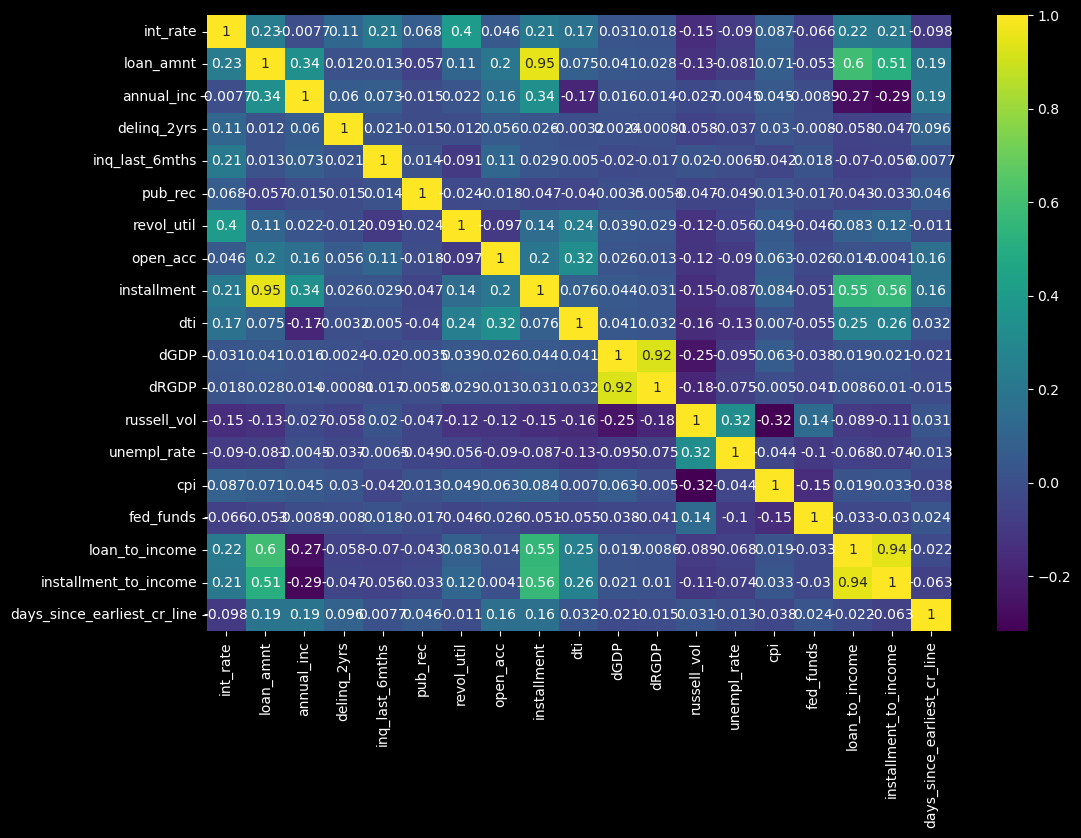

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_merged.corr(), annot=True, cmap='viridis')

Only installment and loan amount show a correlation of 0.95. In order to avoid multicollinearity, one of the variables should be dropped.

Other variables show no significant correlation to one and other.

### Histograms for all numerical variables

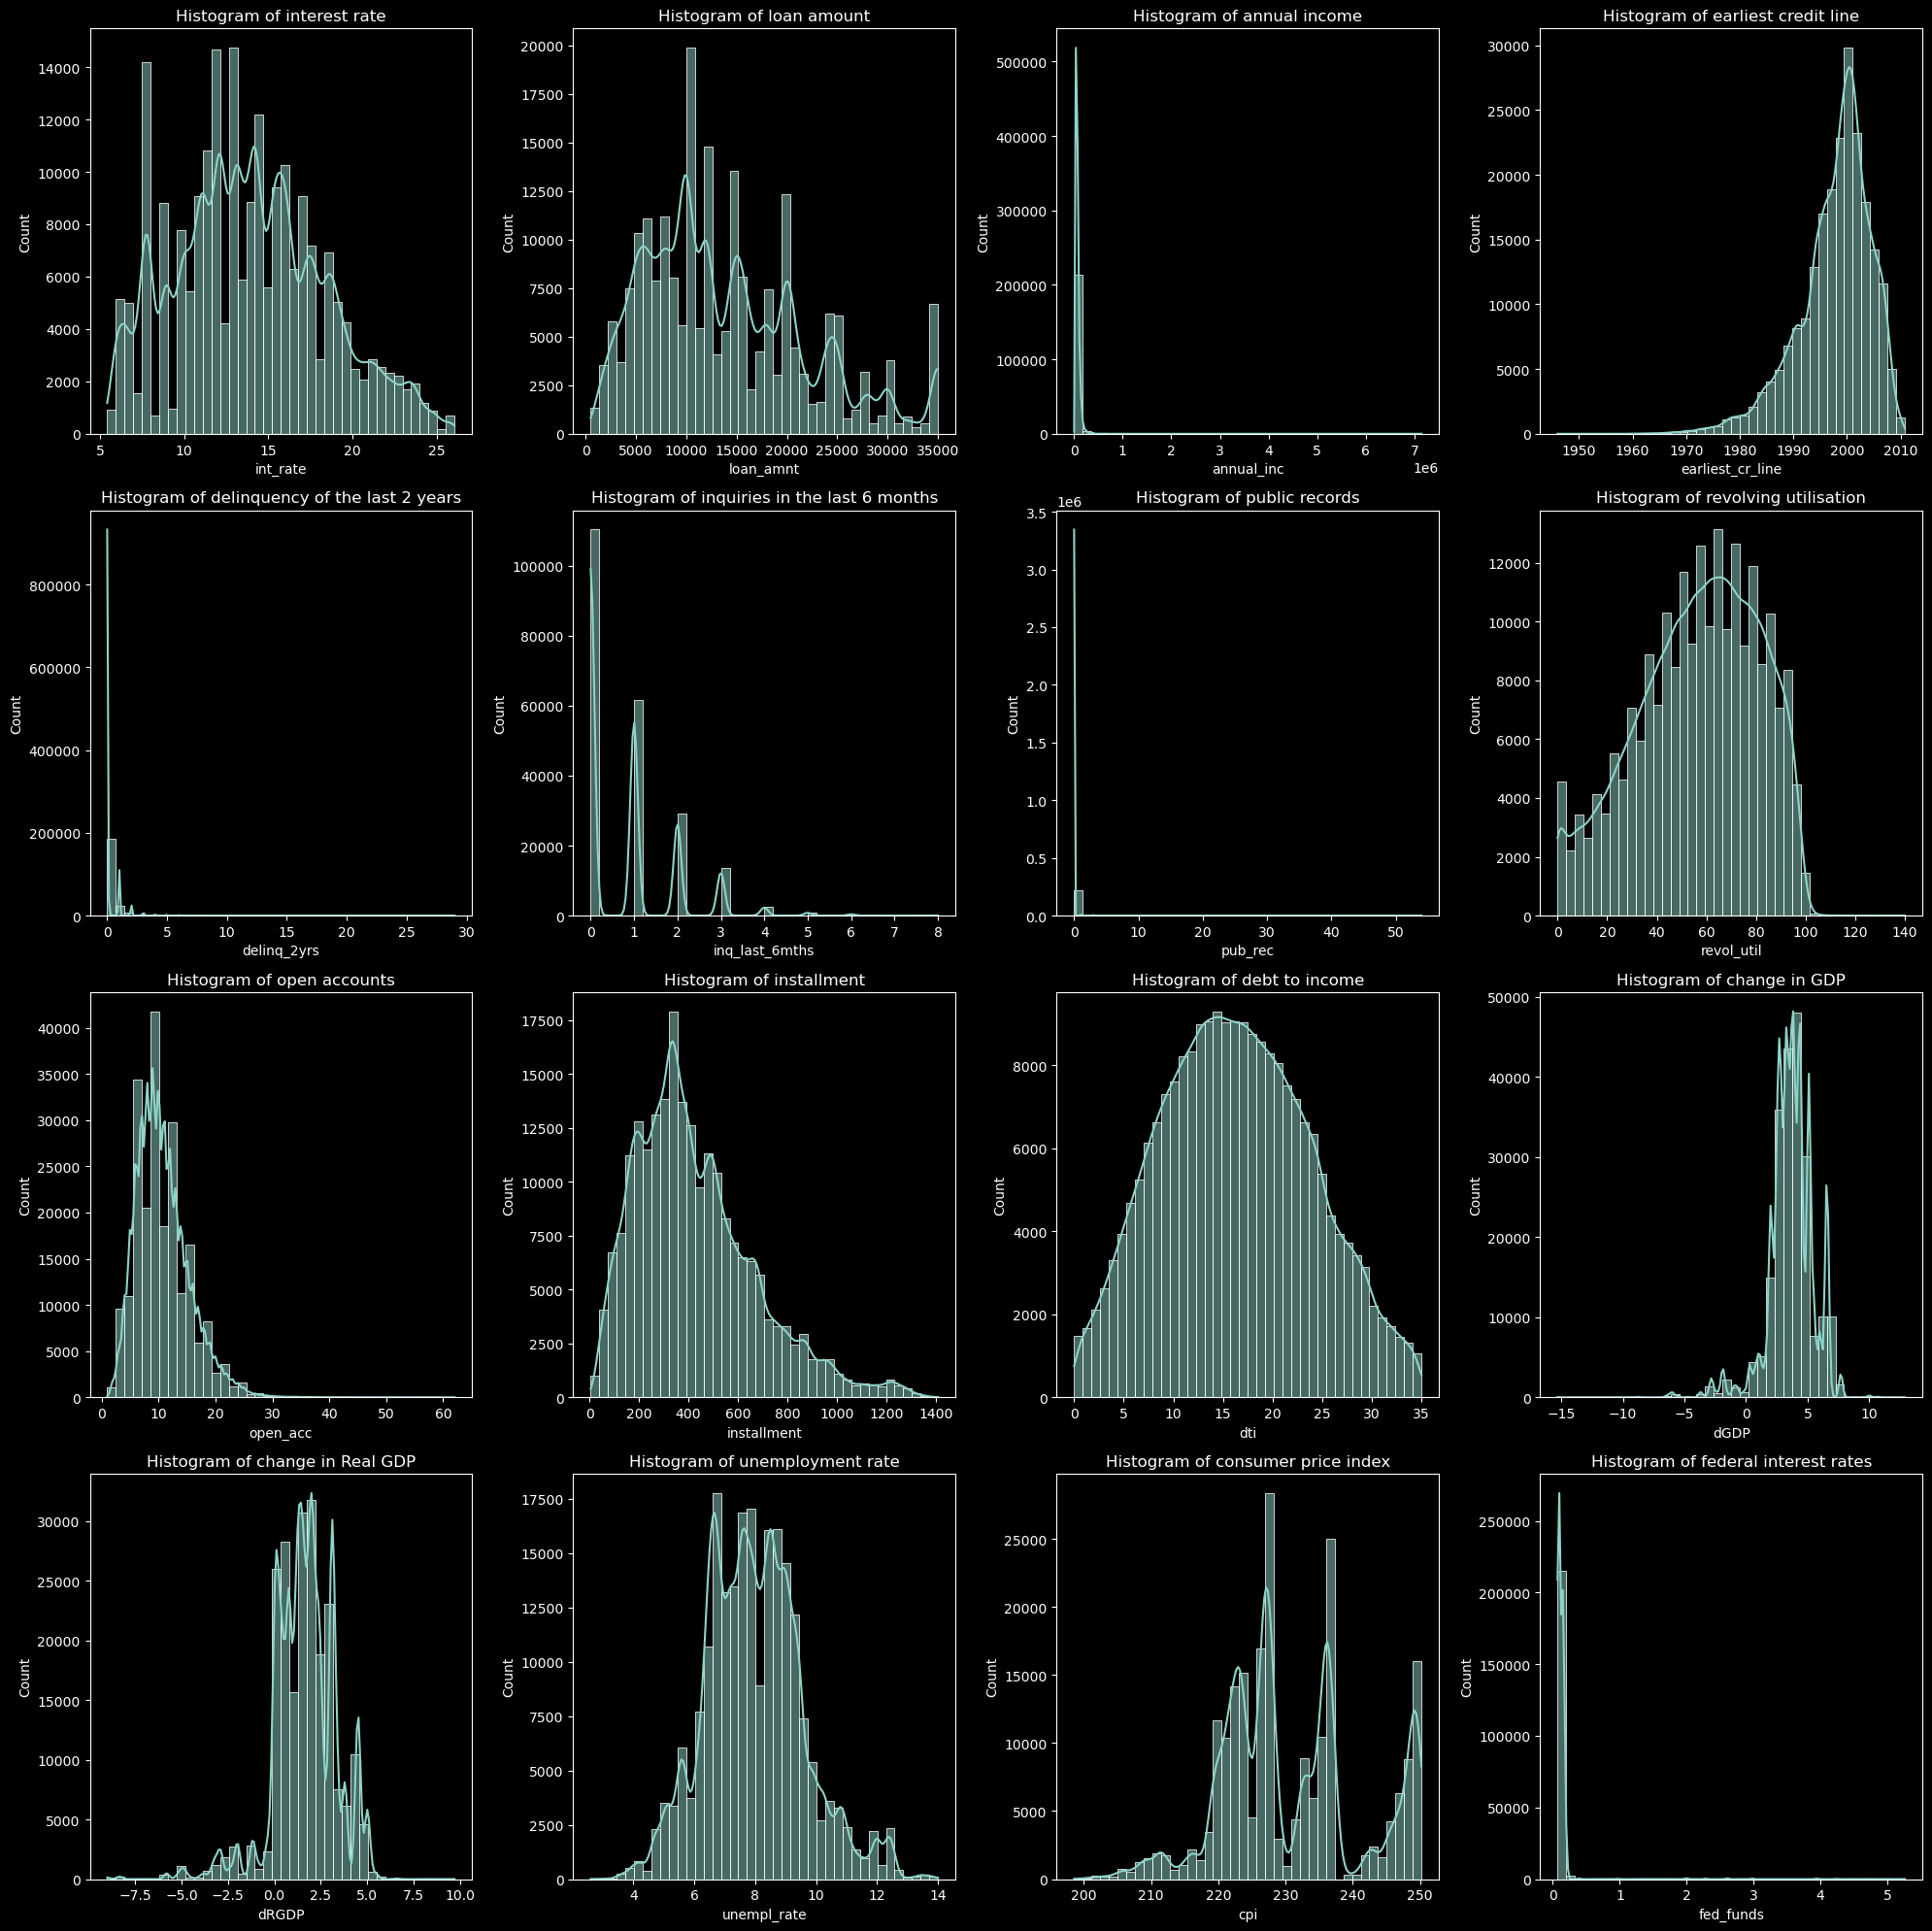

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

variables = ['int_rate', 'loan_amnt', 'annual_inc', 'earliest_cr_line', 'delinq_2yrs', 'inq_last_6mths', 'pub_rec', 'revol_util', 
             'open_acc', 'installment', 'dti', 'dGDP', 'dRGDP', 'unempl_rate', 'cpi', 'fed_funds']
titles = ['interest rate', 'loan amount', 'annual income', 'earliest credit line', 'delinquency of the last 2 years', 
          'inquiries in the last 6 months', 'public records', 'revolving utilisation', 'open accounts', 
          'installment', 'debt to income', 'change in GDP', 'change in Real GDP', 'unemployment rate', 
          'consumer price index', 'federal interest rates']

fig, axs = plt.subplots(4, 4, figsize=(20, 20))  # Create a grid of 4x4 subplots

for ax, var, title in zip(axs.ravel(), variables, titles):
    sns.histplot(data=df_merged, x=var, bins=40, kde=True, ax=ax)
    ax.set_title(f'Histogram of {title}')

plt.tight_layout()  # Ensure the subplots do not overlap
plt.show()


In [ ]:
# Creat a column for listing year
df_merged['year'] = df_merged['issue_d'].dt.year 

# Creat a temporary dataframe for listing year and count
year_df = df_merged.groupby("year").issue_d.count().reset_index()
year_df

year  issue_d
0  2007      251
1  2008     1554
2  2009     4702
3  2010    11199
4  2011    20955
5  2012    51398
6  2013   128754

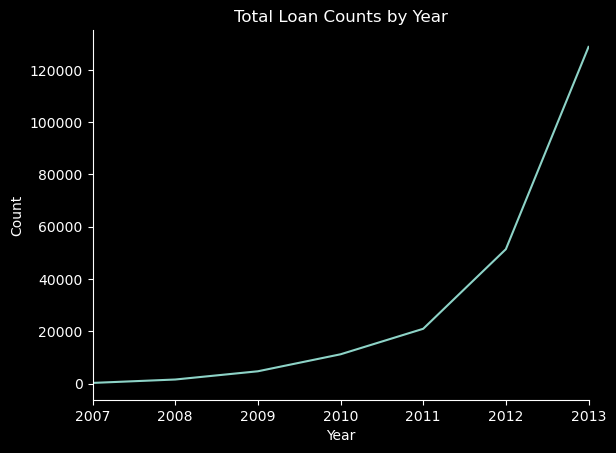

In [ ]:
sns.lineplot(data = year_df, x = 'year', y = 'issue_d')
plt.title("Total Loan Counts by Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.xlim((2007, 2013))
plt.xticks([2007, 2008, 2009, 2010, 2011, 2012, 2013], [2007, 2008, 2009, 2010, 2011, 2012, 2013])

sns.despine()
plt.show();

The graph show an exponential growth of loans issued between 2007 and 2013.

In [ ]:
df_merged.groupby(by='loan_status')['loan_amnt'].describe()

count          mean          std    min     25%      50%  \
loan_status                                                                
Charged Off   33509.0  15071.049569  8433.121658  900.0  8500.0  14000.0   
Fully Paid   185304.0  13710.864849  8020.619018  500.0  7675.0  12000.0   

                 75%      max  
loan_status                    
Charged Off  20000.0  35000.0  
Fully Paid   19000.0  35000.0

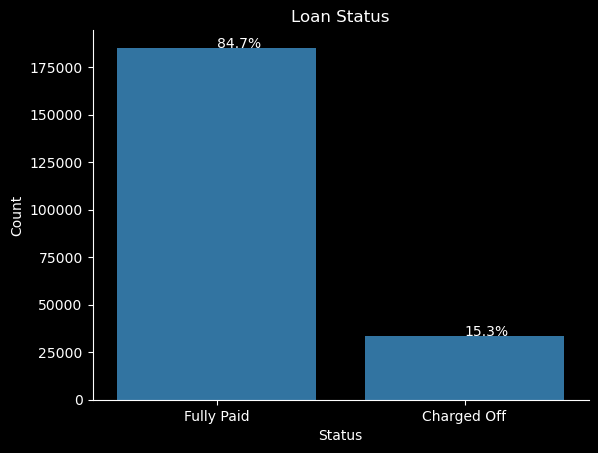

In [ ]:
ax = sns.countplot(data = df_merged, x = 'loan_status', order = df_merged.loan_status.value_counts().index, 
                    color = basic)

# Annotation
a = 0
for p in ax.patches:
    if a < 4:
        total = len(df_merged.loan_status)
        percentage = "{:.1f}%".format(100 * p.get_height() / total)
        y = p.get_y() + p.get_height()
        x = (p.get_x() + p.get_width() / 2)
        ax.annotate(percentage, (x, y))
        a += 1
plt.title("Loan Status")
plt.xlabel('Status')
plt.ylabel('Count')

sns.despine()
plt.show();

Loans per LendingClub Grade

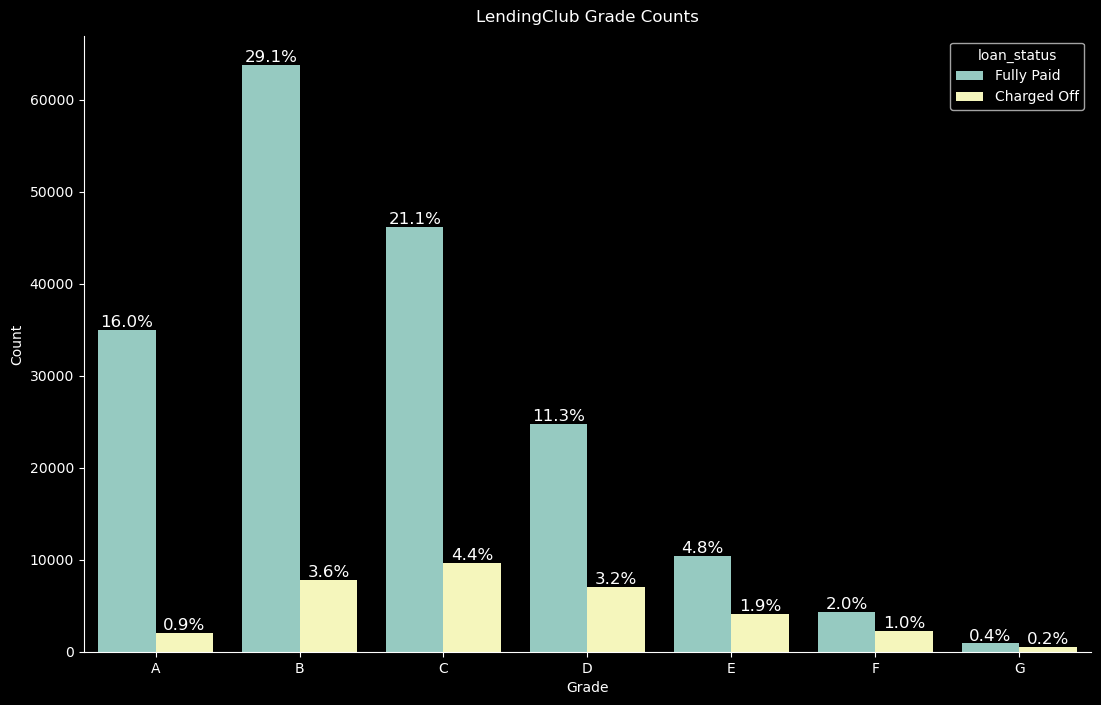

In [ ]:
# Set the size of the plot
plt.figure(figsize=(13, 8))

# Plot for LendingClub grade
order = sorted(df_merged.grade.unique())
ax = sns.countplot(data = df_merged, x = 'grade', hue = 'loan_status', order = order)
ax.set_title('LendingClub Grade Counts', pad = 10)
ax.set_xlabel('Grade')
ax.set_ylabel('Count')

# Total number of loans
total_loans = len(df_merged)

# Add annotation
for p in ax.patches:
    percentage = "{:.1f}%".format(100 * p.get_height() / total_loans)
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), fontsize = 12, ha = 'center', va = 'bottom')
sns.despine()

plt.show();


From The graph above, we can see that 32.7% of the loans are labelled with a "B" grade, 25.5% with a "C" grade, and 16.9% with an "A" grade.
This indicates that 75.1% of all loans have a moderate to high level of creditworthiness, as per LendingClub's assessment.

Now, let us check how the subgrades are distributed.

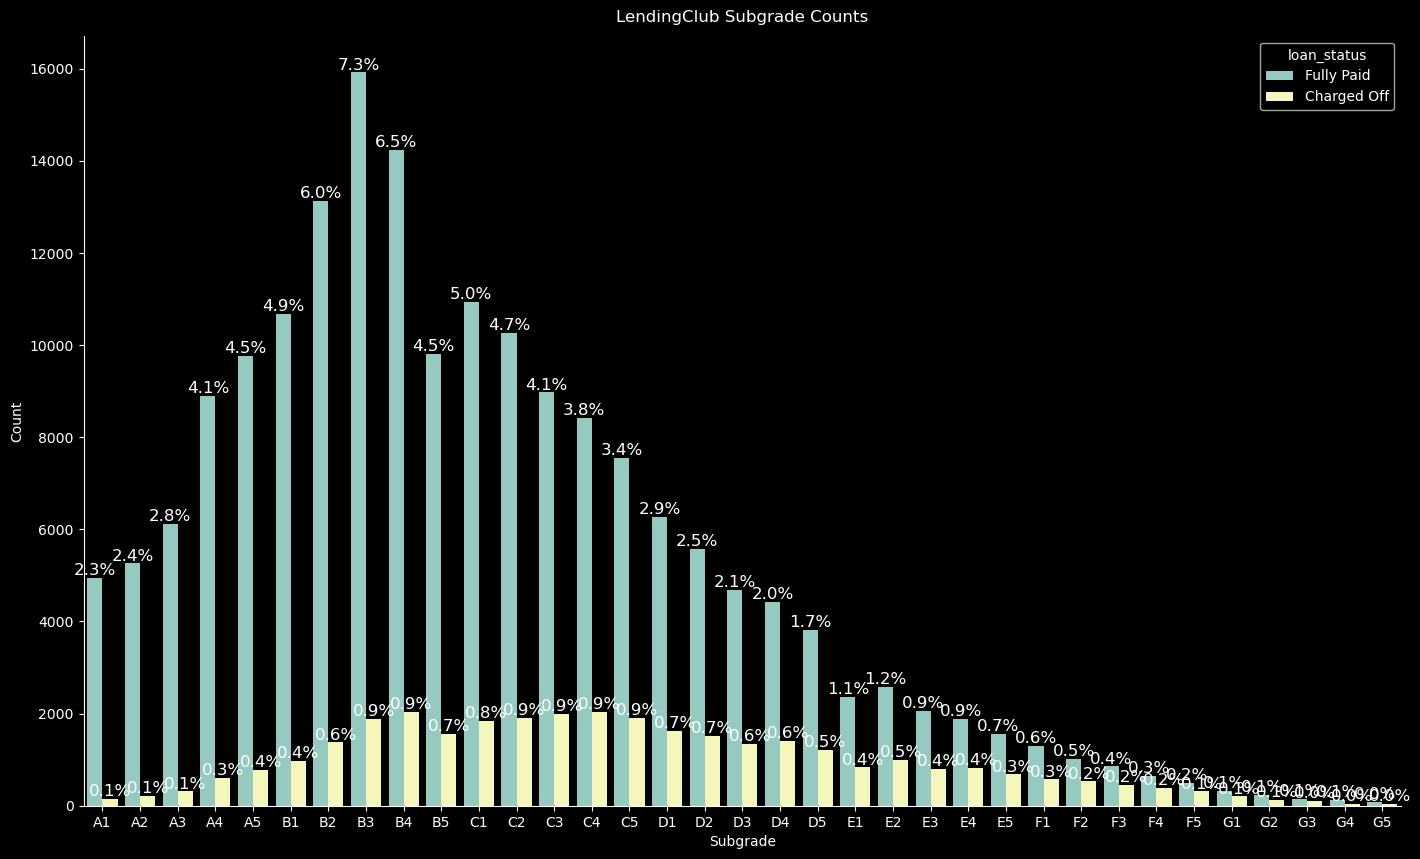

In [ ]:
# Set the size of the plot
plt.figure(figsize=(17, 10))

# Plot for LendingClub subgrade
order = sorted(df_merged.sub_grade.unique())
ax = sns.countplot(data = df_merged, x = 'sub_grade', hue = 'loan_status', order = order)
ax.set_title('LendingClub Subgrade Counts', pad = 10)
ax.set_xlabel('Subgrade')
ax.set_ylabel('Count')

# Total number of loans
total_loans = len(df_merged)

# Add annotation
for p in ax.patches:
    percentage = "{:.1f}%".format(100 * p.get_height() / total_loans)
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), fontsize = 12, ha = 'center', va = 'bottom')
sns.despine()

plt.show();


Most of the paid off loans are between the A4 and C1 loan sub-grade. Whereas the charged off loans range between B3 and D1.

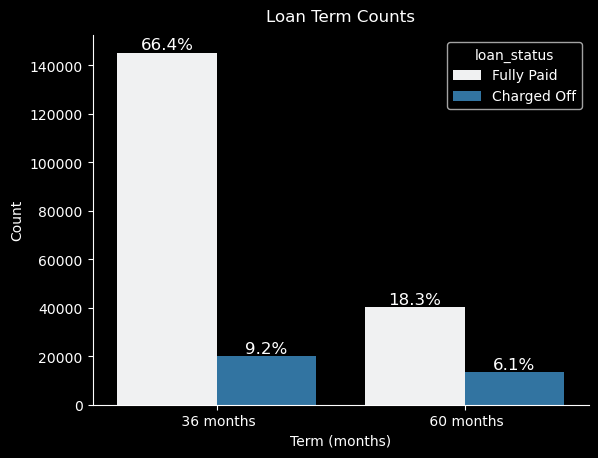

In [ ]:
term_order = df_merged.term.value_counts().index

ax = sns.countplot(data = df_merged, x = 'term', hue = 'loan_status', color = basic, order = term_order)
ax.set_title("Loan Term Counts", pad = 10)
ax.set_xlabel('Term (months)')
ax.set_ylabel('Count')

for p in ax.patches:
    total = df_merged.term.count()
    percentage = "{:.1f}%".format(100*p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y), fontsize = 12, ha = 'center', va = 'bottom')
    sns.despine()

plt.show();


Loans with a 60 month term have a relatively higher default rate than 36 month loans. However, there are also significantly more 36 month loans issued than 60 month loans.

Nevertheless, we can dummify the loan terms for our regression analysis.

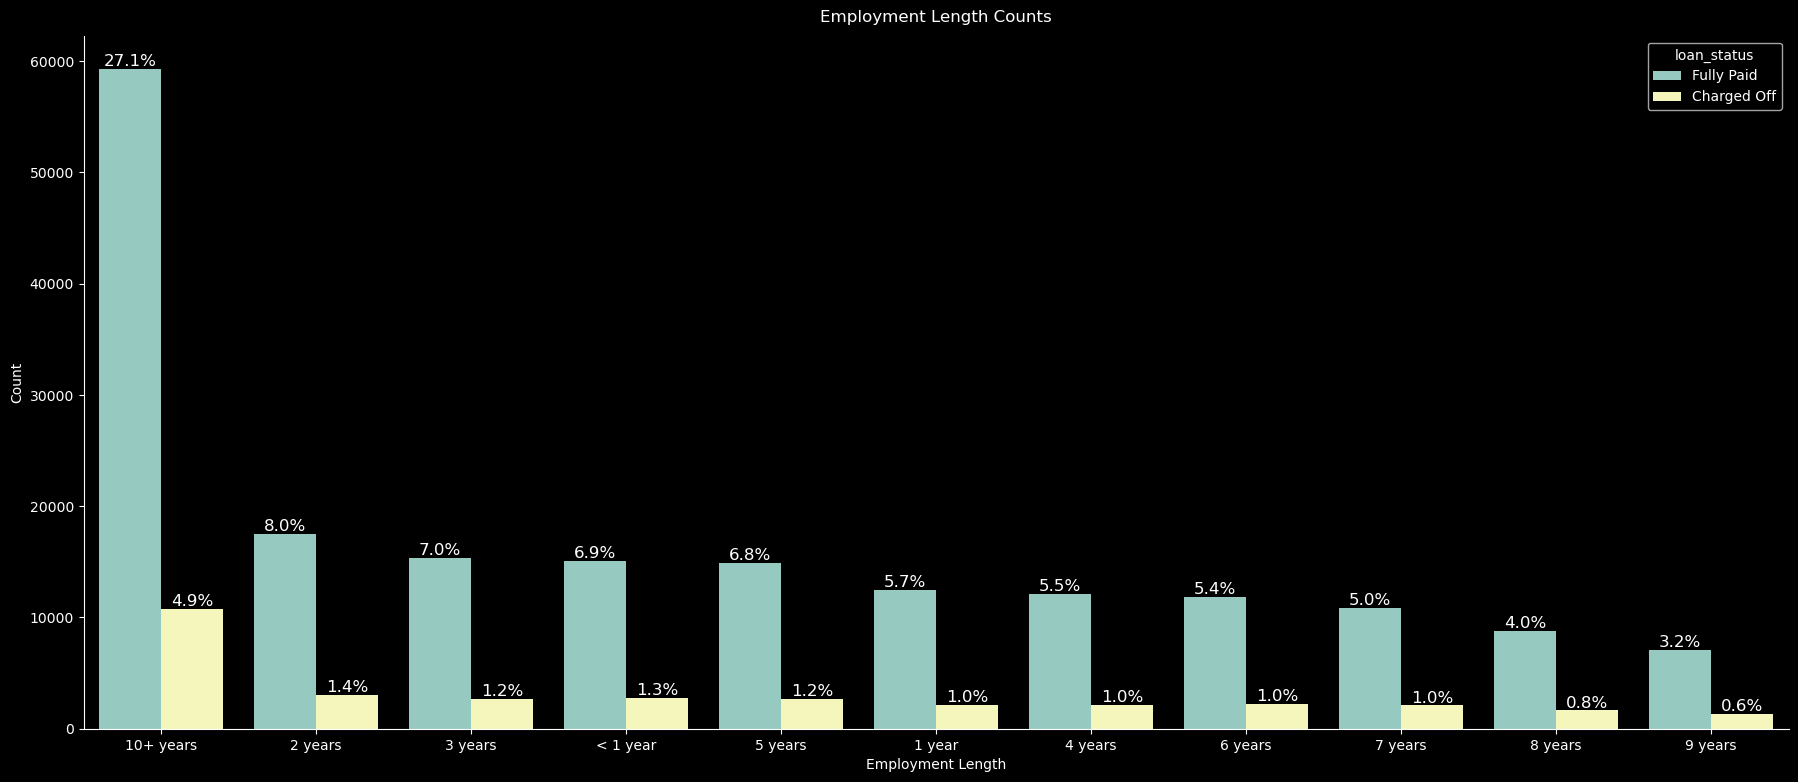

In [ ]:
plt.figure(figsize=(22, 9))

emp_length_order = df_merged.emp_length.value_counts().index

ax = sns.countplot(data = df_merged, x = 'emp_length', hue = 'loan_status', order = emp_length_order)
ax.set_title("Employment Length Counts", pad = 10)
ax.set_xlabel('Employment Length')
ax.set_ylabel('Count')

for p in ax.patches:
    total = df_merged.emp_length.count()
    percentage = "{:.1f}%".format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), fontsize = 12, ha = 'center', va = 'bottom')
sns.despine()

plt.show();

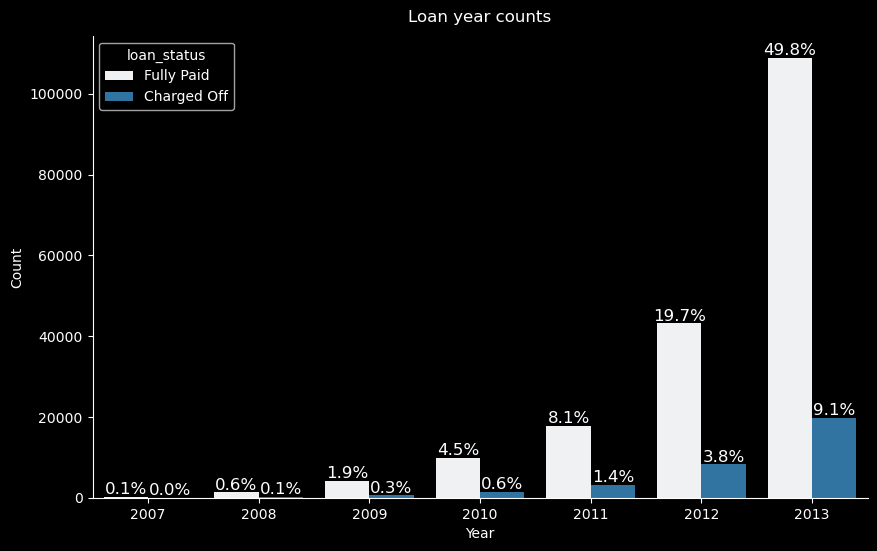

In [ ]:
plt.figure(figsize=(10, 6))

ax = sns.countplot(data = df_merged, x = 'year', hue = 'loan_status', color = basic)
ax.set_title("Loan year counts", pad = 10)
ax.set_xlabel('Year')
ax.set_ylabel('Count')

for p in ax.patches:
    total = df_merged.year.count()
    percentage = "{:.1f}%".format(100*p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y), fontsize = 12, ha = 'center', va = 'bottom')
    sns.despine()

plt.show();

In [ ]:
# Group by state and loan_status, then count the number of occurrences
loan_status_year_counts = df_merged.groupby(['year', 'loan_status']).size().reset_index(name='counts')

# Pivot the DataFrame to get states on the index and loan statuses on the columns
pivot_df = loan_status_year_counts.pivot(index='year', columns='loan_status', values='counts')

# Add a new column 'ratio' which is the ratio of 'Charged Off' to 'Fully Paid'
pivot_df['ratio'] = pivot_df['Charged Off'] / pivot_df['Fully Paid']

# Display the DataFrame to see the ratios
print(pivot_df)

loan_status  Charged Off  Fully Paid     ratio
year                                          
2007                  45         206  0.218447
2008                 243        1311  0.185355
2009                 591        4111  0.143761
2010                1407        9792  0.143689
2011                3139       17816  0.176190
2012                8256       43142  0.191368
2013               19828      108926  0.182032


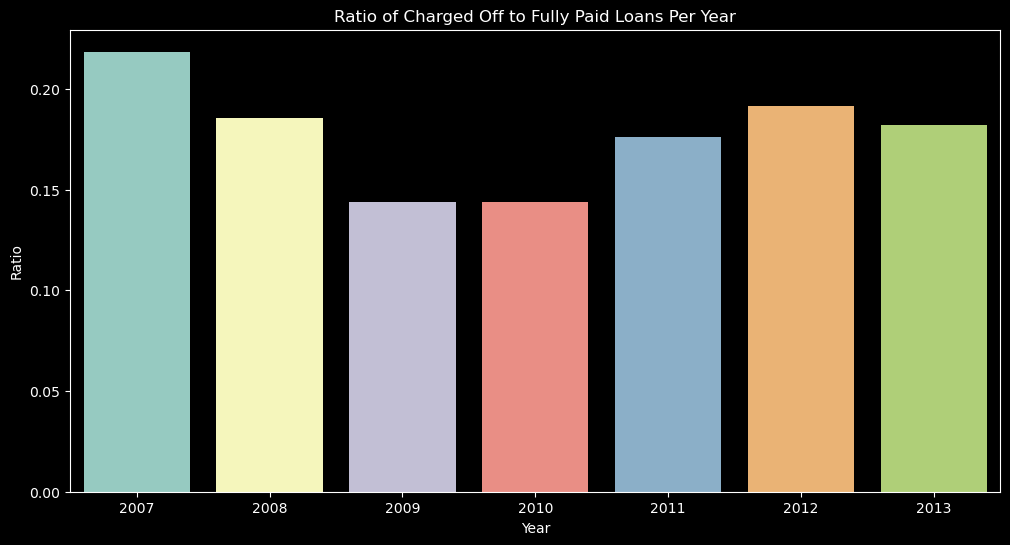

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use seaborn's barplot function to plot the 'ratio' column
plt.figure(figsize=(12,6))
sns.barplot(x=pivot_df.index, y=pivot_df['ratio'])
plt.title("Ratio of Charged Off to Fully Paid Loans Per Year")
plt.xlabel('Year')
plt.ylabel('Ratio')
plt.show()

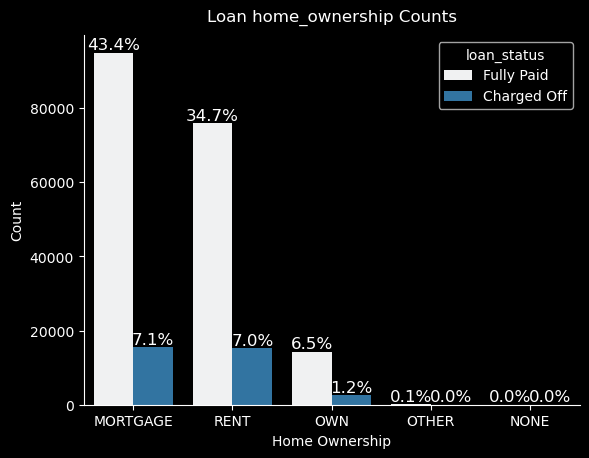

In [ ]:
home_ownership_order = df_merged.home_ownership.value_counts().index

ax = sns.countplot(data = df_merged, x = 'home_ownership', hue = 'loan_status', color = basic, order = home_ownership_order)
ax.set_title("Loan home_ownership Counts", pad = 10)
ax.set_xlabel('Home Ownership')
ax.set_ylabel('Count')

for p in ax.patches:
    total = df_merged.home_ownership.count()
    percentage = "{:.1f}%".format(100*p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y), fontsize = 12, ha = 'center', va = 'bottom')
    sns.despine()

plt.show();

SAY SOMETHING

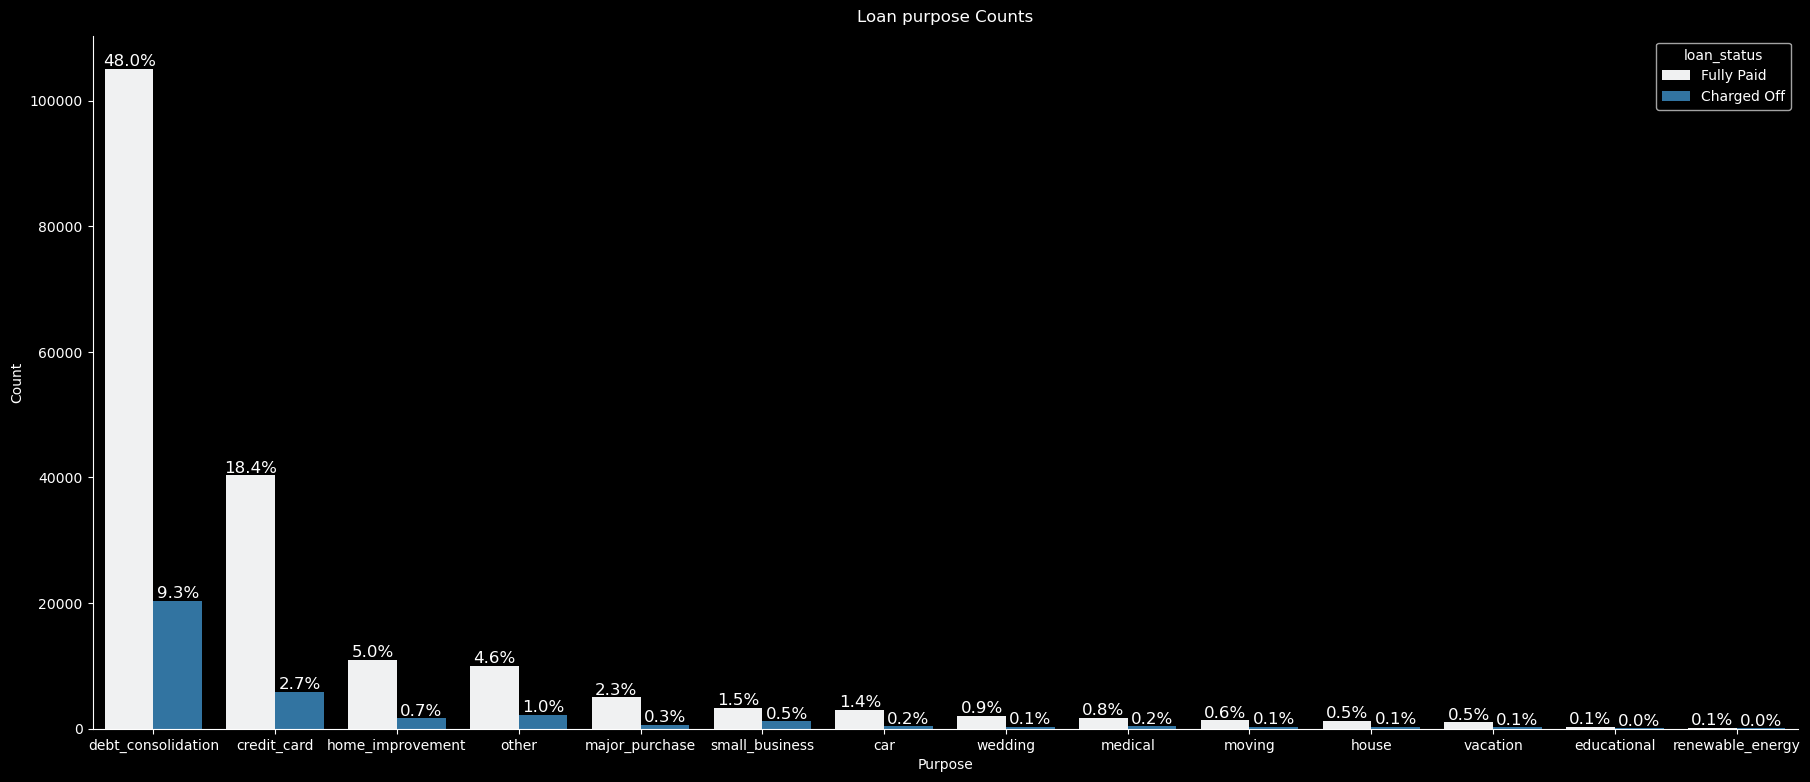

In [ ]:
plt.figure(figsize=(22, 9))

purpose_order = df_merged.purpose.value_counts().index

ax = sns.countplot(data = df_merged, x = 'purpose', hue = 'loan_status', color = basic, order = purpose_order)
ax.set_title("Loan purpose Counts", pad = 10)
ax.set_xlabel('Purpose')
ax.set_ylabel('Count')

for p in ax.patches:
    total = df_merged.purpose.count()
    percentage = "{:.1f}%".format(100*p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y), fontsize = 12, ha = 'center', va = 'bottom')
    sns.despine()

plt.show();

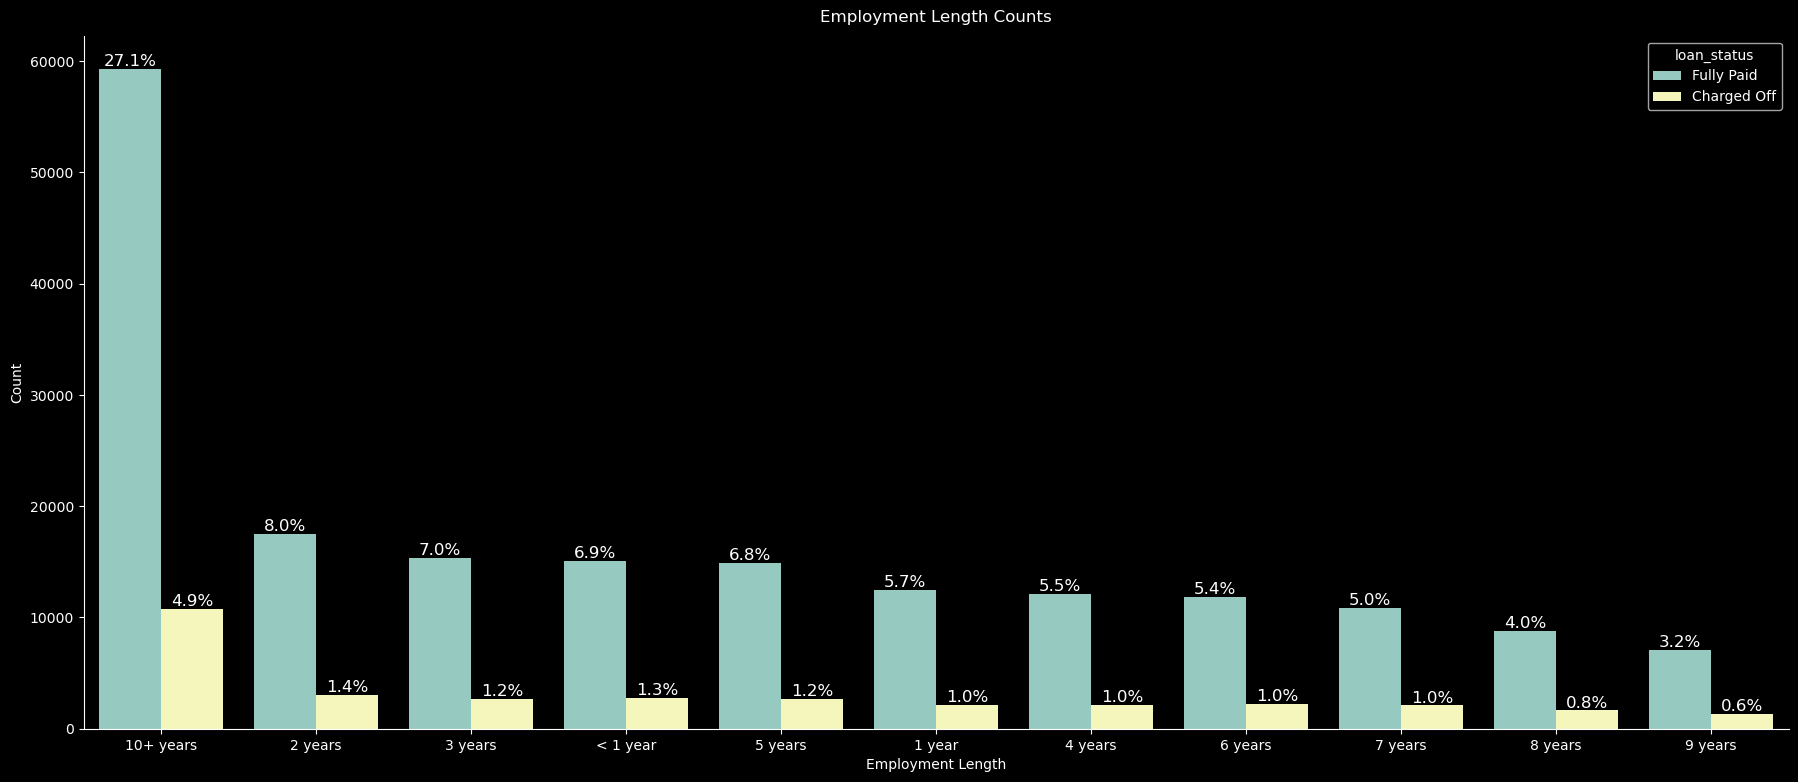

In [ ]:
plt.figure(figsize=(22, 9))

emp_length_order = df_merged.emp_length.value_counts().index

ax = sns.countplot(data = df_merged, x = 'emp_length', hue = 'loan_status', order = emp_length_order)
ax.set_title("Employment Length Counts", pad = 10)
ax.set_xlabel('Employment Length')
ax.set_ylabel('Count')

for p in ax.patches:
    total = df_merged.emp_length.count()
    percentage = "{:.1f}%".format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), fontsize = 12, ha = 'center', va = 'bottom')
sns.despine()

plt.show();

SAY SOMETHING?

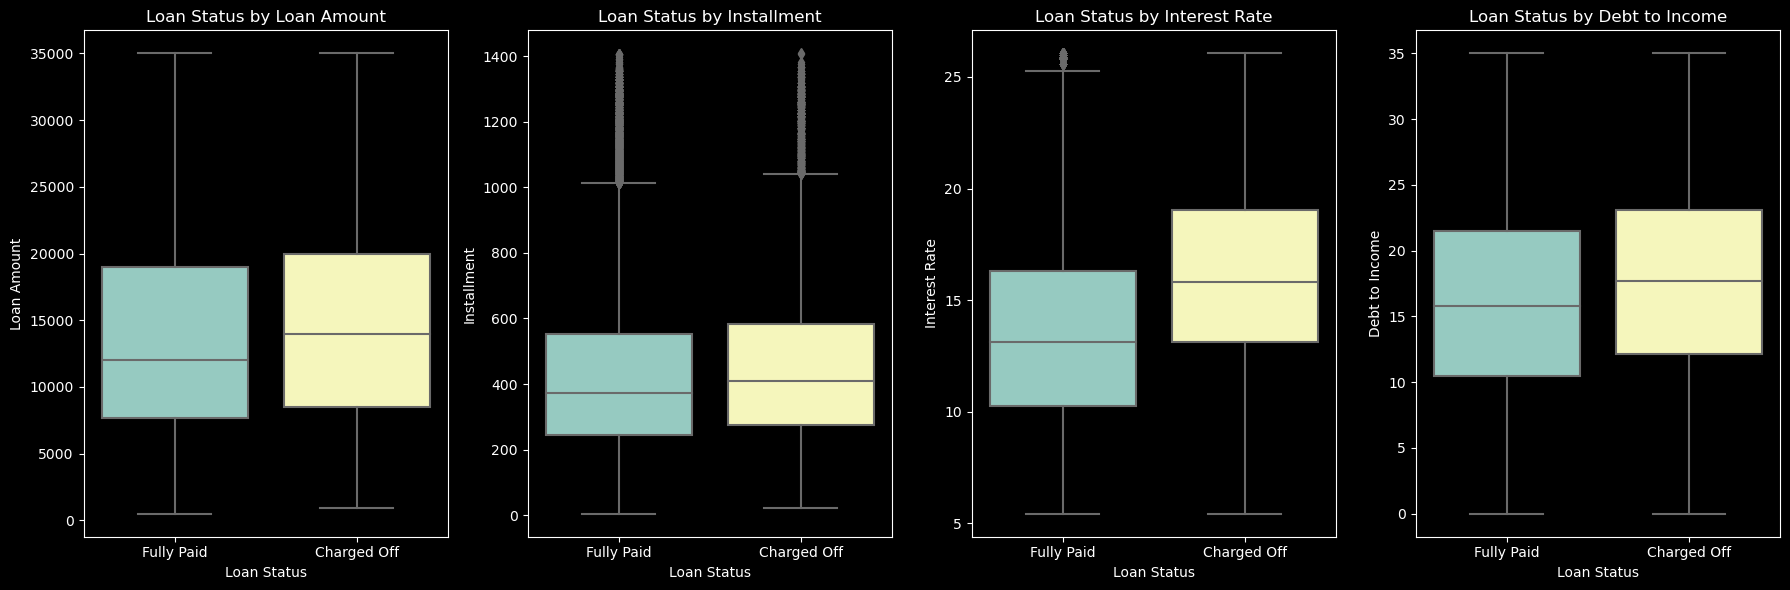

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(18, 6)) 

# Box plot for loan_amnt
sns.boxplot(data=df_merged, x='loan_status', y='loan_amnt', ax=axes[0])
axes[0].set_title('Loan Status by Loan Amount')
axes[0].set_xlabel('Loan Status')
axes[0].set_ylabel('Loan Amount')

# Box plot for installment
sns.boxplot(data=df_merged, x='loan_status', y='installment', ax=axes[1])
axes[1].set_title('Loan Status by Installment')
axes[1].set_xlabel('Loan Status')
axes[1].set_ylabel('Installment')

# Box plot for interest rate
sns.boxplot(data=df_merged, x='loan_status', y='int_rate', ax=axes[2])
axes[2].set_title('Loan Status by Interest Rate')
axes[2].set_xlabel('Loan Status')
axes[2].set_ylabel('Interest Rate')

# Box plot for dti
sns.boxplot(data=df_merged, x='loan_status', y='dti', ax=axes[3])
axes[3].set_title('Loan Status by Debt to Income')
axes[3].set_xlabel('Loan Status')
axes[3].set_ylabel('Debt to Income')

plt.tight_layout()
plt.show()


SAY SOMETHING

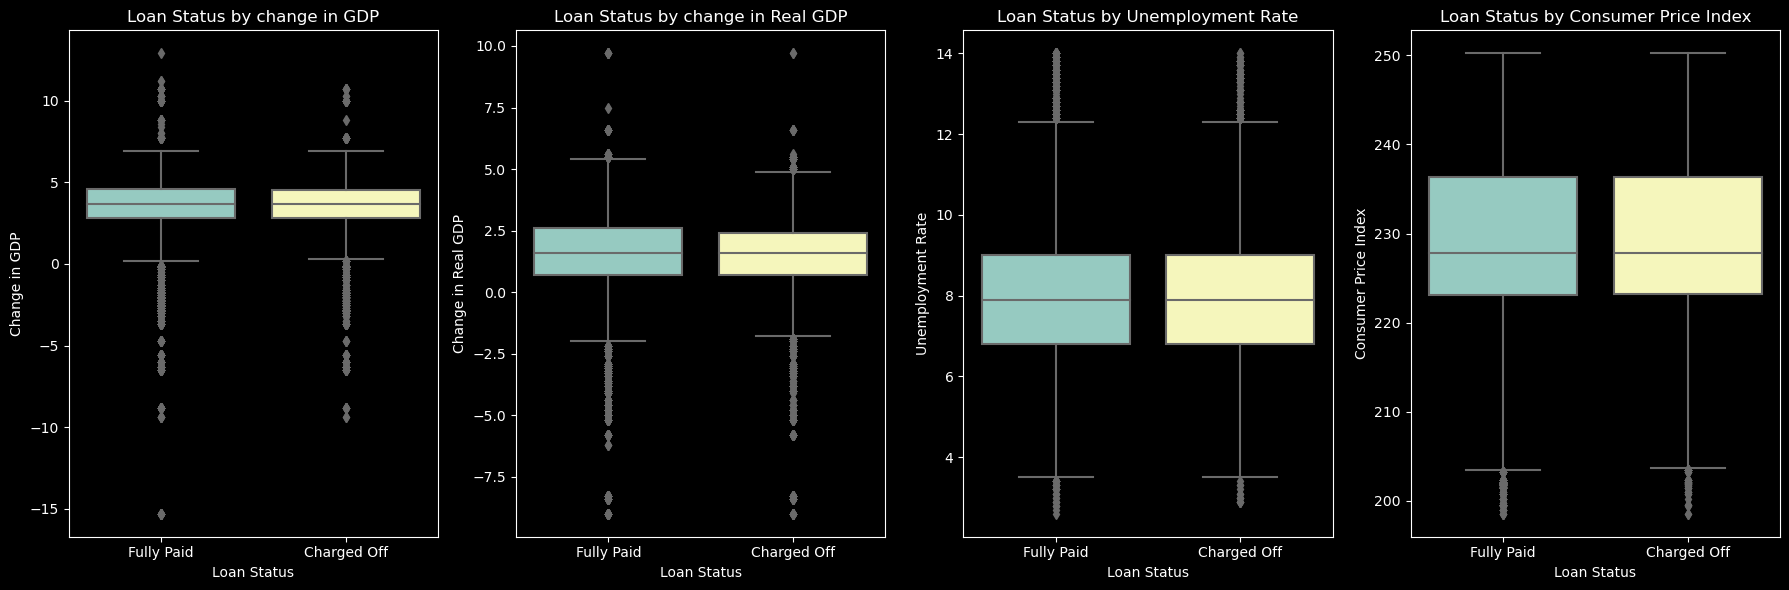

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(18, 6)) 

# Box plot for change in GDP
sns.boxplot(data=df_merged, x='loan_status', y='dGDP', ax=axes[0])
axes[0].set_title('Loan Status by change in GDP')
axes[0].set_xlabel('Loan Status')
axes[0].set_ylabel('Change in GDP')

# Box plot for installment
sns.boxplot(data=df_merged, x='loan_status', y='dRGDP', ax=axes[1])
axes[1].set_title('Loan Status by change in Real GDP')
axes[1].set_xlabel('Loan Status')
axes[1].set_ylabel('Change in Real GDP')

# Box plot for interest rate
sns.boxplot(data=df_merged, x='loan_status', y='unempl_rate', ax=axes[2])
axes[2].set_title('Loan Status by Unemployment Rate')
axes[2].set_xlabel('Loan Status')
axes[2].set_ylabel('Unemployment Rate')

# Box plot for dti
sns.boxplot(data=df_merged, x='loan_status', y='cpi', ax=axes[3])
axes[3].set_title('Loan Status by Consumer Price Index')
axes[3].set_xlabel('Loan Status')
axes[3].set_ylabel('Consumer Price Index')

plt.tight_layout()
plt.show()

SAY SOMETHING

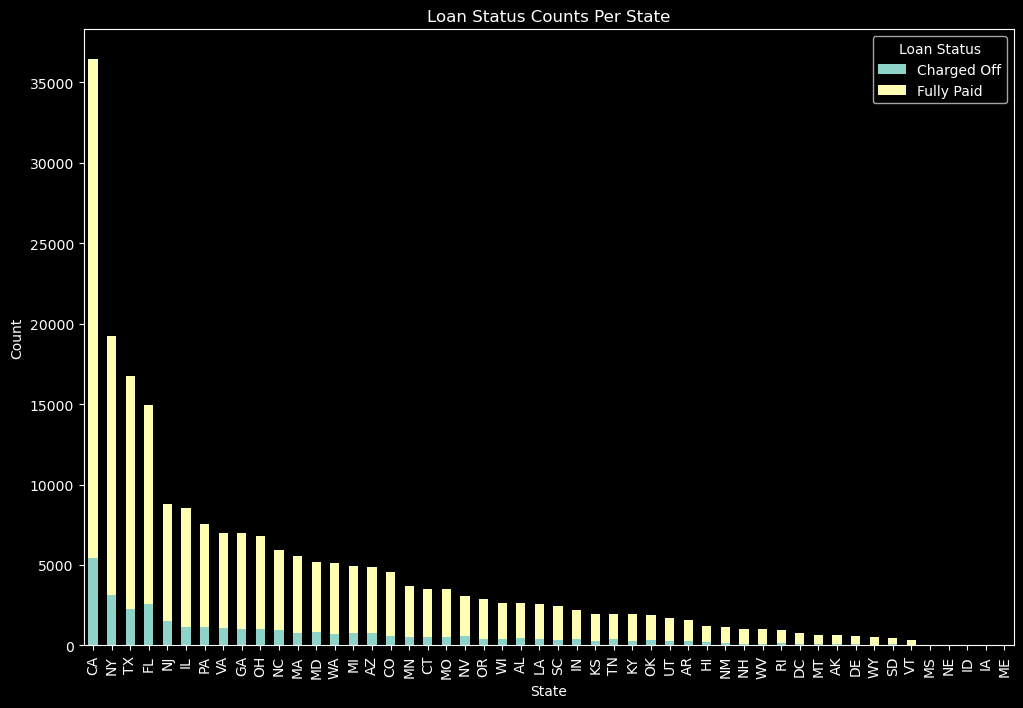

In [ ]:
# Group by state and loan_status, then count the number of occurrences
loan_status_counts = df_loans4.groupby(['addr_state', 'loan_status']).size().reset_index(name='counts')

# Pivot the DataFrame to get states on the index and loan statuses on the columns
pivot_df = loan_status_counts.pivot(index='addr_state', columns='loan_status', values='counts')

# Calculate total count per state and sort by it in descending order
pivot_df['total'] = pivot_df.sum(axis=1)
pivot_df = pivot_df.sort_values(by='total', ascending=False)

# Drop the total column as we don't need it anymore
pivot_df = pivot_df.drop(columns=['total'])

# Plot a stacked bar chart
pivot_df.plot(kind='bar', stacked=True, figsize=(12,8))

plt.title('Loan Status Counts Per State')
plt.xlabel('State')
plt.ylabel('Count')
plt.legend(title='Loan Status')

plt.show()


The graph clearly illustrates that California leads in the number of issued loans, significantly surpassing New York, Texas, and Florida. This is expected considering that LendingClub, the loan issuer, is headquartered in San Francisco, California.

Nonetheless, a closer examination reveals that California also has the highest count of charged-off loans. Despite this, it's essential to look beyond absolute numbers and assess the ratio between fully paid and charged-off loans per state, as it offers insights into the default rate.

In [ ]:
# Group by state and loan_status, then count the number of occurrences
loan_status_counts = df_loans4.groupby(['addr_state', 'loan_status']).size().reset_index(name='counts')

# Pivot the DataFrame to get states on the index and loan statuses on the columns
pivot_df = loan_status_counts.pivot(index='addr_state', columns='loan_status', values='counts')

# Add a new column 'ratio' which is the ratio of 'Charged Off' to 'Fully Paid'
pivot_df['ratio'] = pivot_df['Charged Off'] / pivot_df['Fully Paid']

# Display the DataFrame to see the ratios
print(pivot_df)

loan_status  Charged Off  Fully Paid     ratio
addr_state                                    
AK                  89.0       536.0  0.166045
AL                 455.0      2193.0  0.207478
AR                 262.0      1317.0  0.198937
AZ                 750.0      4115.0  0.182260
CA                5456.0     31010.0  0.175943
CO                 575.0      4005.0  0.143571
CT                 511.0      3020.0  0.169205
DC                  65.0       698.0  0.093123
DE                  84.0       474.0  0.177215
FL                2603.0     12339.0  0.210957
GA                1011.0      5964.0  0.169517
HI                 214.0      1026.0  0.208577
IA                   1.0         5.0  0.200000
ID                   1.0         6.0  0.166667
IL                1161.0      7359.0  0.157766
IN                 385.0      1830.0  0.210383
KS                 263.0      1721.0  0.152818
KY                 303.0      1632.0  0.185662
LA                 420.0      2174.0  0.193192
MA           

Differences in this ratio across states suggest that certain state-specific factors may be influencing the likelihood of loan default. For instance, while Texas has issued more loans than Florida, the default rate in Florida surprisingly exceeds that of Texas. This underlines the importance of considering regional factors when evaluating the risk of loan default.

In [ ]:
import plotly.express as px

# Group by state and loan status, then count the number of occurrences
state_loan_counts = df_merged.groupby('addr_state').size().reset_index(name='counts')

# Group by state and loan status, then count the number of occurrences
loan_status_counts = df_merged[df_merged['loan_status'].isin(['Charged Off', 'Fully Paid'])].groupby(['addr_state', 'loan_status']).size().unstack(fill_value=0)
loan_status_counts['Ratio'] = loan_status_counts['Charged Off'] / loan_status_counts['Fully Paid']
loan_status_counts = loan_status_counts.reset_index()

# Merge the loan count and loan status ratio
state_loan_counts = state_loan_counts.merge(loan_status_counts[['addr_state', 'Charged Off', 'Fully Paid', 'Ratio']], on='addr_state', how='left')

fig = px.choropleth(state_loan_counts, 
                    locations='addr_state', 
                    color='counts', 
                    locationmode="USA-states", 
                    scope="usa",
                    labels={'counts': 'Loan Count'},
                    title='Loan Count per State',
                    color_continuous_scale='Blues')

fig.update_layout(
    coloraxis_colorbar=dict(title='Loan Count'),
    hoverlabel=dict(
        bgcolor="white",
        font_size=12,
        font_family="Arial"
    )
)

# Add extra information to hover text
fig.update_traces(hovertemplate='<b>%{location}</b><br>Loan Count: %{z}<br>Charged Off: %{customdata[0]}<br>Fully Paid: %{customdata[1]}<br>Ratio: %{customdata[2]:.2f}')

# Assign charged off, fully paid counts, and ratio as custom data
fig.data[0].update(customdata=state_loan_counts[['Charged Off', 'Fully Paid', 'Ratio']].values)

fig.show()


# Data Preparation

All variables will be grouped as follows:

Borrower Assessment: {Grade, Sub grade, Interest Rate}

Loan Characteristics: {Loan Purpose, Loan Amount, Term}

Borrower Characteristics: {Annual Income, Housing Situation, Employment Length}

Credit History: {Earliest Credit Line, Delinquency 2 Years, Inquiries Last 6 Months, Public Records,Revolving Utilisation, Open Accounts, Months Since Last Delinquency}

Borrower Indebtedness: {Loan Amount to Annual Income, Annual Instalment to Income, Debt to Income}

Macroeconomic: {Change in Real GDP, Unemployment Rate, Consumer Price Index, Russell 2000 Index, Federal Interest Rate}

Please beware that some variables have been removed due to multicollinearity.

To effectively evaluate the impact of each variable group on predicting loan defaults, we'll establish seven distinctive models, each encompassing a unique combination of variable groups. By analyzing these different models, we can determine the relative importance of each variable in predicting loan defaults. Furthermore, this approach can help us identify potential instances of overfitting, where the model might be too closely tailored to the training data, thereby reducing its predictive accuracy with new data. 

Model 1 incorporates the borrower assessment & loan characteristic. These two variable groups serve as the main variables. Model 2 add borrower characteristics, model 3 credit history, model 4 borrower indebtedness, model 5 macroeconomics. Then, model 6 includes all variable groups except macroeconomics. And model 7 includes all variable groups. 

The seven models for logistic regression are as follows:

Model 1: PD_i = B_0 + B_1 * Dummy_sub_grade + B_2 * int_rate + B_3 * purpose + B_4 * loan_amnt + B_5 * Dummy_term

Model 2: PD_i = B_0 + B_1 * Dummy_sub_grade + B_2 * int_rate + B_3 * purpose + B_4 * loan_amnt + B_5 * Dummy_term + B_6 * annual_inc + B_7 * Dummy_home_ownership + B_8 * Dummy_emp_length

Model 3: PD_i = PD_i = B_0 + B_1 * Dummy_sub_grade + B_2 * int_rate + B_3 * purpose + B_4 * loan_amnt + B_5 * Dummy_term + B_6 * days_since_earliest_cr_line + B_7 * delinq_2yrs + B_8 * inq_last_6mths + B_9 * pub_rec + B_10 * revol_util + B_11 * open_acc

Model 4: PD_i = B_0 + B_1 * Dummy_sub_grade + B_2 * int_rate + B_3 * purpose + B_4 * loan_amnt + B_5 * Dummy_term + B_6 * loan_to_income + B_7 * dti

Model 5: PD_i = B_0 + B_1 * Dummy_sub_grade + B_2 * int_rate + B_3 * purpose + B_4 * loan_amnt + B_5 * Dummy_term + B_6 * dRGDP + B_7 * unempl_rate + B_8 * russell_vol + B_9 * cpi + B_10 * fed_funds

Model 6: PD_i = B_0 + B_1 * Dummy_sub_grade + B_2 * int_rate + B_3 * purpose + B_4 * loan_amnt + B_5 * Dummy_term + B_6 * annual_inc + B_7 * Dummy_home_ownership + B_8 * Dummy_emp_length + B_9 * days_since_earliest_cr_line + B_10 * delinq_2yrs + B_11 * inq_last_6mths + B_12 * pub_rec + B_13 * revol_util + B_14 * open_acc + B_15 * loan_to_income + B_16 * dti

Model 7: PD_i = B_0 + B_1 * Dummy_sub_grade + B_2 * int_rate + B_3 * purpose + B_4 * loan_amnt + B_5 * Dummy_term + B_6 * annual_inc + B_7 * Dummy_home_ownership + B_8 * Dummy_emp_length + B_9 * days_since_earliest_cr_line + B_10 * delinq_2yrs + B_11 * inq_last_6mths + B_12 * pub_rec + B_13 * revol_util + B_14 * open_acc + B_15 * loan_to_income + B_16 * dti + B_17 * dRGDP + B_18 * unempl_rate + B_19 * russell_vol + B_20 * cpi + B_21 * fed_funds 

In [ ]:
# from sklearn.model_selection import train_test_split
# import statsmodels.api as sm
# from sklearn.preprocessing import LabelEncoder
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report
# from imblearn.under_sampling import RandomUnderSampler

# # Prepare the features for Model 1
# X1 = df_merged[['sub_grade', 'int_rate', 'purpose', 'loan_amnt', 'term']]

# # Create dummy variables for Model 1
# X1 = pd.get_dummies(X1, columns=['sub_grade', 'purpose', 'term'], drop_first=True)

# # Add intercept for Model 1
# X1 = sm.add_constant(X1)

# # Prepare the features for Model 2
# X2 = df_merged[['sub_grade', 'int_rate', 'purpose', 'loan_amnt', 'term', 'annual_inc', 'home_ownership', 'emp_length']]

# # Create dummy variables for Model 2
# X2 = pd.get_dummies(X2, columns=['sub_grade', 'purpose', 'term', 'home_ownership', 'emp_length'], drop_first=True)

# # Add intercept for Model 2
# X2 = sm.add_constant(X2)

# # Prepare the features for Model 3
# X3 = df_merged[['sub_grade', 'int_rate', 'purpose', 'loan_amnt', 'term', 'days_since_earliest_cr_line', 'delinq_2yrs', 'inq_last_6mths', 'pub_rec', 'revol_util', 'open_acc']]

# # Create dummy variables for Model 3
# X3 = pd.get_dummies(X3, columns=['sub_grade', 'purpose', 'term'], drop_first=True)

# # Add intercept for Model 3
# X3 = sm.add_constant(X3)

# # Prepare the features for Model 4
# X4 = df_merged[['sub_grade', 'int_rate', 'purpose', 'loan_amnt', 'term', 'loan_to_income', 'dti']]

# # Create dummy variables for Model 4
# X4 = pd.get_dummies(X4, columns=['sub_grade', 'purpose', 'term'], drop_first=True)

# # Add intercept for Model 4
# X4 = sm.add_constant(X4)

# # Prepare the features for Model 5
# X5 = df_merged[['sub_grade', 'int_rate', 'purpose', 'loan_amnt', 'term', 'dRGDP', 'unempl_rate', 'russell_vol', 'cpi', 'fed_funds']]

# # Create dummy variables for Model 5
# X5 = pd.get_dummies(X5, columns=['sub_grade', 'purpose', 'term'], drop_first=True)

# # Add intercept for Model 5
# X5 = sm.add_constant(X5)

# # Prepare the features for Model 6
# X6 = df_merged[['sub_grade', 'int_rate', 'purpose', 'loan_amnt', 'term', 'annual_inc', 'home_ownership', 'emp_length', 'days_since_earliest_cr_line', 'delinq_2yrs', 'inq_last_6mths', 'pub_rec', 'revol_util', 'open_acc', 'loan_to_income', 'dti']]

# # Create dummy variables for Model 6
# X6 = pd.get_dummies(X6, columns=['sub_grade', 'purpose', 'term', 'home_ownership', 'emp_length'], drop_first=True)

# # Add intercept for Model 6
# X6 = sm.add_constant(X6)

# # Prepare the features for Model 7
# X7 = df_merged[['sub_grade', 'int_rate', 'purpose', 'loan_amnt', 'term', 'annual_inc', 'home_ownership', 'emp_length', 'days_since_earliest_cr_line', 'delinq_2yrs', 'inq_last_6mths', 'pub_rec', 'revol_util', 'open_acc', 'loan_to_income', 'dti', 'dRGDP', 'unempl_rate', 'russell_vol', 'cpi', 'fed_funds']] 

# # Create dummy variables for Model 7
# X7 = pd.get_dummies(X7, columns=['sub_grade', 'purpose', 'term', 'home_ownership', 'emp_length'], drop_first=True)

# # Add intercept for Model 7
# X7 = sm.add_constant(X7)

In [ ]:
# # Prepare the target
# y = df_merged['loan_status']
# le = LabelEncoder()
# y = le.fit_transform(y)

In [ ]:
# # Split the data for Model 1
# X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# # Split the data for Model 2
# X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.2, random_state=42)

# # Split the data for Model 3
# X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y, test_size=0.2, random_state=42)

# # Split the data for Model 4
# X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y, test_size=0.2, random_state=42)

# # Split the data for Model 5
# X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y, test_size=0.2, random_state=42)

# # Split the data for Model 6
# X6_train, X6_test, y6_train, y6_test = train_test_split(X6, y, test_size=0.2, random_state=42)

# # Split the data for Model 7
# X7_train, X7_test, y7_train, y7_test = train_test_split(X7, y, test_size=0.2, random_state=42)

In [ ]:
df_merged.head()

grade sub_grade  int_rate             purpose  loan_amnt  annual_inc  \
0     E        E2     13.75  debt_consolidation       7500       22000   
1     A        A2      7.43         credit_card       5000       85000   
2     B        B5      9.96         educational       3500       13500   
3     B        B2      9.01               other       5000      250000   
4     F        F4     15.96  debt_consolidation       2700       52200   

  home_ownership emp_length earliest_cr_line  delinq_2yrs  ...  dRGDP  \
0            OWN   < 1 year       2003-10-01            1  ...    2.8   
1            OWN     1 year       1997-10-01            0  ...    0.6   
2           RENT   < 1 year       2002-12-01            0  ...    1.2   
3       MORTGAGE     1 year       2003-04-01            2  ...    0.8   
4           RENT     1 year       2003-08-01            0  ...    2.8   

   russell_vol  unempl_rate  census_region      cpi  fed_funds loan_to_income  \
0  65322800000          4.5      Northeast  221.579       5.25       0.340909   
1  70337430000          4.9        Midwest  198.989       5.26       0.058824   
2  70337430000          3.3          South  201.571       5.26       0.259259   
3  70337430000          4.5      Northeast  221.945       5.26       0.020000   
4  70337430000          4.5      Northeast  221.945       5.26       0.051724   

  installment_to_income days_since_earliest_cr_line  year  
0              0.011610                        7186  2007  
1              0.001828                        9377  2007  
2              0.008361                        7490  2007  
3              0.000636                        7369  2007  
4              0.001818                        7247  2007  

[5 rows x 31 columns]

Exploratory data analysis reveals a significant class imbalance in our dataset, with 85% of loans being paid off and only 15% being charged off. This severe imbalance can negatively impact the predictive performance of our models. While the models may achieve high accuracy in predicting 'good' loans, they are likely to struggle with accurately identifying 'bad' loans. To address this issue and improve model performance, it is essential to balance the data to achieve a 50/50 ratio.

There are two primary approaches for data balancing: undersampling and oversampling. Undersampling involves removing samples from the majority class, while oversampling generates synthetic samples for the minority class. In our case, due to the sufficient amount of available data and the potential bias that oversampling might introduce, we will focus on undersampling. Additionally, to ensure unbiased evaluation and assess model performance on unseen data, we will employ the K-fold cross-validation technique.

Furthermore, we will explore the class weight method, which assigns higher importance to the minority class during model training without altering the original dataset. This approach allows us to give appropriate consideration to charged off loans, as they carry a higher significance for the company and accurate prediction is crucial in mitigating potential losses.

By implementing undersampling and evaluating the model through K-fold cross-validation, we aim to achieve balanced data representation and robust performance on unseen data. Additionally, the class weight method will be examined as a non-invasive alternative to address the class imbalance. This comprehensive approach will improve our ability to predict loan defaults while minimizing biases and maintaining the integrity of the original dataset.

In [ ]:
raise SystemExit("Stop right there!")

SystemExit: Stop right there!

C:\Users\Lawrence\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3386: UserWarning:

To exit: use 'exit', 'quit', or Ctrl-D.



Preparing X variables

In [ ]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imblearn.under_sampling import RandomUnderSampler

# # Prepare the features for Model 1
# X1 = df_merged[['sub_grade', 'int_rate', 'purpose', 'loan_amnt', 'term']]

# # Create dummy variables for Model 1
# X1 = pd.get_dummies(X1, columns=['sub_grade', 'purpose', 'term'], drop_first=True)

# # Add intercept for Model 1
# X1 = sm.add_constant(X1)

# # Prepare the features for Model 2
# X2 = df_merged[['sub_grade', 'int_rate', 'purpose', 'loan_amnt', 'term', 'annual_inc', 'home_ownership', 'emp_length']]

# # Create dummy variables for Model 2
# X2 = pd.get_dummies(X2, columns=['sub_grade', 'purpose', 'term', 'home_ownership', 'emp_length'], drop_first=True)

# # Add intercept for Model 2
# X2 = sm.add_constant(X2)

# # Prepare the features for Model 3
# X3 = df_merged[['sub_grade', 'int_rate', 'purpose', 'loan_amnt', 'term', 'days_since_earliest_cr_line', 'delinq_2yrs', 'inq_last_6mths', 'pub_rec', 'revol_util', 'open_acc']]

# # Create dummy variables for Model 3
# X3 = pd.get_dummies(X3, columns=['sub_grade', 'purpose', 'term'], drop_first=True)

# # Add intercept for Model 3
# X3 = sm.add_constant(X3)

# # Prepare the features for Model 4
# X4 = df_merged[['sub_grade', 'int_rate', 'purpose', 'loan_amnt', 'term', 'loan_to_income', 'dti']]

# # Create dummy variables for Model 4
# X4 = pd.get_dummies(X4, columns=['sub_grade', 'purpose', 'term'], drop_first=True)

# # Add intercept for Model 4
# X4 = sm.add_constant(X4)

# # Prepare the features for Model 5
# X5 = df_merged[['sub_grade', 'int_rate', 'purpose', 'loan_amnt', 'term', 'dRGDP', 'unempl_rate', 'russell_vol', 'cpi', 'fed_funds']]

# # Create dummy variables for Model 5
# X5 = pd.get_dummies(X5, columns=['sub_grade', 'purpose', 'term'], drop_first=True)

# # Add intercept for Model 5
# X5 = sm.add_constant(X5)

# Prepare the features for Model 6
X6 = df_merged[['sub_grade', 'int_rate', 'purpose', 'loan_amnt', 'term', 'annual_inc', 'home_ownership', 'emp_length', 'days_since_earliest_cr_line', 'delinq_2yrs', 'inq_last_6mths', 'pub_rec', 'revol_util', 'open_acc', 'loan_to_income', 'dti']]

# Create dummy variables for Model 6
X6 = pd.get_dummies(X6, columns=['sub_grade', 'purpose', 'term', 'home_ownership', 'emp_length'], drop_first=True)

# Add intercept for Model 6
X6 = sm.add_constant(X6)

# Prepare the features for Model 7
X7 = df_merged[['sub_grade', 'int_rate', 'purpose', 'loan_amnt', 'term', 'annual_inc', 'home_ownership', 'emp_length', 'days_since_earliest_cr_line', 'delinq_2yrs', 'inq_last_6mths', 'pub_rec', 'revol_util', 'open_acc', 'loan_to_income', 'dti', 'dRGDP', 'unempl_rate', 'russell_vol', 'cpi', 'fed_funds']] 

# Create dummy variables for Model 7
X7 = pd.get_dummies(X7, columns=['sub_grade', 'purpose', 'term', 'home_ownership', 'emp_length'], drop_first=True)

# Add intercept for Model 7
X7 = sm.add_constant(X7)

Prepare Y variable

In [ ]:
# Prepare the target 0 = default, 1 = paid off
y = df_merged['loan_status']
le = LabelEncoder()
y = le.fit_transform(y)

Splitting Data 80/20 Train/Test

In [ ]:
# # Split the data for Model 1
# X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.2, random_state=42)

# # Split the data for Model 2
# X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.2, random_state=42)

# # Split the data for Model 3
# X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y, test_size=0.2, random_state=42)

# # Split the data for Model 4
# X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y, test_size=0.2, random_state=42)

# # Split the data for Model 5
# X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y, test_size=0.2, random_state=42)

# Split the data for Model 6
X6_train, X6_test, y6_train, y6_test = train_test_split(X6, y, test_size=0.2, random_state=42)

# Split the data for Model 7
X7_train, X7_test, y7_train, y7_test = train_test_split(X7, y, test_size=0.2, random_state=42)

Apply Scaling Technique

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer

# List of your numerical features
num_features6 = ['int_rate', 'loan_amnt', 'annual_inc', 'days_since_earliest_cr_line', 'delinq_2yrs', 'inq_last_6mths', 'pub_rec', 'revol_util', 'open_acc', 'loan_to_income', 'dti']

# Create a column transformer
preprocessor6 = make_column_transformer(
    (StandardScaler(), num_features6),
    remainder='passthrough'  # leave remaining categorical features untouched
)

# Fit and transform the numerical features of the undersampled training data
X6_train_scaled = preprocessor6.fit_transform(X6_train)
X6_test = preprocessor6.transform(X6_test)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer

# List of your numerical features
num_features7 = ['int_rate', 'loan_amnt', 'annual_inc', 'days_since_earliest_cr_line', 'delinq_2yrs', 'inq_last_6mths', 'pub_rec', 'revol_util', 'open_acc', 'loan_to_income', 'dti', 'dRGDP', 'unempl_rate', 'russell_vol', 'cpi', 'fed_funds']

# Create a column transformer
preprocessor7 = make_column_transformer(
    (StandardScaler(), num_features7),
    remainder='passthrough'  # leave remaining categorical features untouched
)

# Fit and transform the numerical features of the undersampled training data
X7_train_scaled = preprocessor7.fit_transform(X7_train)
X7_test = preprocessor7.transform(X7_test)

Apply Data Balancing Technique only to Train set

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Initialize a RandomUnderSampler object
undersampler = RandomUnderSampler(random_state=42)

# Fit the undersampler and resample the training data
X6_train_scaled_undersampled, y6_train_undersampled = undersampler.fit_resample(X6_train_scaled, y6_train)

# Fit the undersampler and resample the training data
X7_train_scaled_undersampled, y7_train_undersampled = undersampler.fit_resample(X7_train_scaled, y7_train)


Splitting Train Data 80/20 Train/Validation

In [ ]:
# # Further split the train set into train and validation sets (80% train, 20% validation)
# X1_train, X1_val, y1_train, y1_val = train_test_split(X1_train, y1_train, test_size=0.2, random_state=1234)

# X2_train, X2_val, y2_train, y2_val = train_test_split(X2_train, y2_train, test_size=0.2, random_state=1234)

# X3_train, X3_val, y3_train, y3_val = train_test_split(X3_train, y3_train, test_size=0.2, random_state=1234)

# X4_train, X4_val, y4_train, y4_val = train_test_split(X4_train, y4_train, test_size=0.2, random_state=1234)

# X5_train, X5_val, y5_train, y5_val = train_test_split(X5_train, y5_train, test_size=0.2, random_state=1234)

X6_train, X6_val, y6_train, y6_val = train_test_split(X6_train_scaled_undersampled, y6_train_undersampled, test_size=0.2, random_state=1234)

X7_train, X7_val, y7_train, y7_val = train_test_split(X7_train_scaled_undersampled, y7_train_undersampled, test_size=0.2, random_state=1234)

In [ ]:
# Print the shape of each set for Model 6
print("Train set shape:", X6_train.shape, y6_train.shape)
print("Validation set shape:", X6_val.shape, y6_val.shape)
print("Test set shape:", X6_test.shape, y6_test.shape)

Train set shape: (42881, 74) (42881,)
Validation set shape: (10721, 74) (10721,)
Test set shape: (43763, 74) (43763,)


In [ ]:
# Print the shape of each set for Model 7
print("Train set shape:", X7_train.shape, y7_train.shape)
print("Validation set shape:", X7_val.shape, y7_val.shape)
print("Test set shape:", X7_test.shape, y7_test.shape)


Train set shape: (42881, 79) (42881,)
Validation set shape: (10721, 79) (10721,)
Test set shape: (43763, 79) (43763,)


In [ ]:
# Get column names from original DataFrame
original_columns = X6.columns

# Convert numpy arrays back to pandas DataFrame
X6_train = pd.DataFrame(X6_train, columns=original_columns)
X6_val = pd.DataFrame(X6_val, columns=original_columns)
X6_test = pd.DataFrame(X6_test, columns=original_columns)


In [ ]:
# Get column names from original DataFrame
original_columns = X7.columns

# Convert numpy arrays back to pandas DataFrame
X7_train = pd.DataFrame(X7_train, columns=original_columns)
X7_val = pd.DataFrame(X7_val, columns=original_columns)
X7_test = pd.DataFrame(X7_test, columns=original_columns)


In [ ]:
# Check column consistency between training and test sets
train_columns = set(X6_train.columns)
val_columns = set(X6_val.columns)
test_columns = set(X6_test.columns)

# Columns present in training set but not in validation or test set
missing_columns_val = train_columns - val_columns
missing_columns_test = train_columns - test_columns

# Columns present in validation or test set but not in training set
extra_columns_val = val_columns - train_columns
extra_columns_test = test_columns - train_columns

print("Columns present in training set but not in validation set:", missing_columns_val)
print("Columns present in training set but not in test set:", missing_columns_test)
print("Columns present in validation set but not in training set:", extra_columns_val)
print("Columns present in test set but not in training set:", extra_columns_test)

Columns present in training set but not in validation set: set()
Columns present in training set but not in test set: set()
Columns present in validation set but not in training set: set()
Columns present in test set but not in training set: set()


In [ ]:
# Check column consistency between training and test sets
train_columns = set(X7_train.columns)
val_columns = set(X7_val.columns)
test_columns = set(X7_test.columns)

# Columns present in training set but not in validation or test set
missing_columns_val = train_columns - val_columns
missing_columns_test = train_columns - test_columns

# Columns present in validation or test set but not in training set
extra_columns_val = val_columns - train_columns
extra_columns_test = test_columns - train_columns

print("Columns present in training set but not in validation set:", missing_columns_val)
print("Columns present in training set but not in test set:", missing_columns_test)
print("Columns present in validation set but not in training set:", extra_columns_val)
print("Columns present in test set but not in training set:", extra_columns_test)


Columns present in training set but not in validation set: set()
Columns present in training set but not in test set: set()
Columns present in validation set but not in training set: set()
Columns present in test set but not in training set: set()


In [ ]:
raise SystemExit("Stop right there!")

SystemExit: Stop right there!

C:\Users\Lawrence\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3386: UserWarning:

To exit: use 'exit', 'quit', or Ctrl-D.



# Neural Network Model VI

All neural network codes are taken from https://github.com/riccardopinosio/DDB_AI/blob/main/credit_risk_case_study/modelling.ipynb

In [ ]:
import tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense
print('tensorflow: %s' % tensorflow.__version__)
print('keras: %s' % keras.__version__)

tensorflow: 2.10.0
keras: 2.10.0


In [ ]:
print(f"The number of neurons for the input layer must be: {X6_train.shape[1]}")

The number of neurons for the input layer must be: 74


In [ ]:
# define the neural network model class instance
simple_nn6 = Sequential()
# add the first input layer with 29 nodes and the first hidden layer, with  relu activation function
# note that the first command does two things: create a first input layer with 29 nodes, and then a hidden layer
# we set the number of neurons to be equal to the (# of nodes in the input layer + # neurons in the output layer)/2,
# i.e. the mean of the number of neurons in the input layer and the output layer. This is usually a good heuristic to get started.
simple_nn6.add(Dense(20, input_dim=X6_train.shape[1], activation='relu'))
# add the output layer with sigmoid function (the sigmoid function is exactly the same as that used in the formulation of logisitc regression
simple_nn6.add(Dense(1, activation='sigmoid'))

In [ ]:
print(simple_nn6.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                1500      
                                                                 
 dense_1 (Dense)             (None, 1)                 21        
                                                                 
Total params: 1,521
Trainable params: 1,521
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
simple_nn6.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
print(X6_train.shape)
print(y6_train.shape)
print(X6_val.shape)
print(y6_val.shape)

(42881, 74)
(42881,)
(10721, 74)
(10721,)


In [ ]:
# Define model architecture
def create_model():
    model = Sequential()
    model.add(Dense(20, input_dim=X6_train.shape[1], activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam')
    return model

# Create a new instance of the model
simple_nn6_new = create_model()

# Now fit the model
simple_nn6_new.fit(X6_train, y6_train, epochs=100, batch_size = 150)

Epoch 1/100
286/286 [==============================] - 4s 5ms/step - loss: 0.6496
Epoch 2/100
286/286 [==============================] - 1s 4ms/step - loss: 0.6370
Epoch 3/100
286/286 [==============================] - 1s 3ms/step - loss: 0.6345
Epoch 4/100
286/286 [==============================] - 1s 3ms/step - loss: 0.6331
Epoch 5/100
286/286 [==============================] - 1s 3ms/step - loss: 0.6323
Epoch 6/100
286/286 [==============================] - 1s 4ms/step - loss: 0.6315
Epoch 7/100
286/286 [==============================] - 1s 5ms/step - loss: 0.6308
Epoch 8/100
286/286 [==============================] - 1s 5ms/step - loss: 0.6301
Epoch 9/100
286/286 [==============================] - 1s 5ms/step - loss: 0.6295
Epoch 10/100
286/286 [==============================] - 1s 4ms/step - loss: 0.6290
Epoch 11/100
286/286 [==============================] - 2s 6ms/step - loss: 0.6283
Epoch 12/100
286/286 [==============================] - 2s 5ms/step - loss: 0.6278
Epoch 13/100


dict_keys(['loss'])


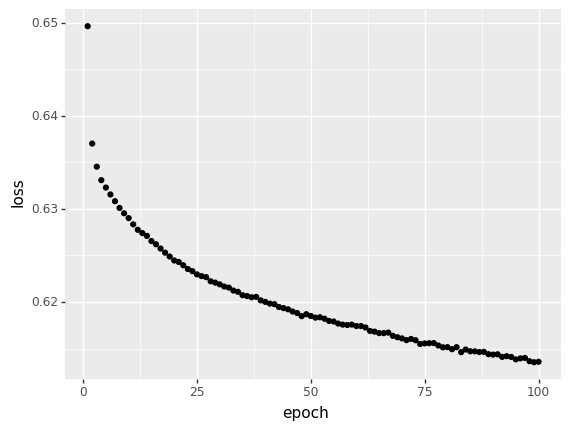

<ggplot: (137168567899)>

In [ ]:
from plotnine import ggplot, aes, geom_point
import numpy as np
import pandas as pd

# see what information has been logged during the training process
print(simple_nn6_new.history.history.keys())

# plot the training loss over epochs
loss_df = pd.DataFrame(simple_nn6_new.history.history['loss'])
loss_df.columns = ['loss']
loss_df = loss_df.assign(epoch = np.arange(1, len(loss_df) + 1))

(
    ggplot(loss_df, aes(x='epoch', y='loss')) +
    geom_point()
)


In [ ]:
# Define model architecture
def create_model():
    model = Sequential()
    model.add(Dense(20, input_dim=X6_train.shape[1], activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam')
    return model

# Create a new instance of the model
simple_nn6_new = create_model()

# Now fit the model
simple_nn6_new.fit(X6_train, y6_train, epochs=100, batch_size = 150, validation_data=(X6_val, y6_val))

Epoch 1/100
286/286 [==============================] - 3s 6ms/step - loss: 0.6526 - val_loss: 0.6467
Epoch 2/100
286/286 [==============================] - 1s 5ms/step - loss: 0.6363 - val_loss: 0.6430
Epoch 3/100
286/286 [==============================] - 1s 4ms/step - loss: 0.6339 - val_loss: 0.6416
Epoch 4/100
286/286 [==============================] - 1s 4ms/step - loss: 0.6324 - val_loss: 0.6412
Epoch 5/100
286/286 [==============================] - 1s 4ms/step - loss: 0.6315 - val_loss: 0.6410
Epoch 6/100
286/286 [==============================] - 1s 4ms/step - loss: 0.6307 - val_loss: 0.6411
Epoch 7/100
286/286 [==============================] - 2s 6ms/step - loss: 0.6299 - val_loss: 0.6405
Epoch 8/100
286/286 [==============================] - 2s 7ms/step - loss: 0.6294 - val_loss: 0.6410
Epoch 9/100
286/286 [==============================] - 2s 6ms/step - loss: 0.6289 - val_loss: 0.6395
Epoch 10/100
286/286 [==============================] - 1s 5ms/step - loss: 0.6285 - val_lo

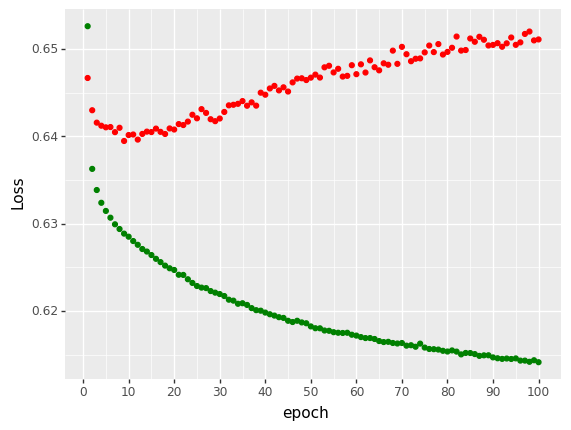

<ggplot: (137184479693)>

In [ ]:
from plotnine import ggplot, aes, geom_point, scale_x_continuous, ylab
import numpy as np
import pandas as pd

# plot the training loss over epochs
def plot_loss(nn_model):
    loss_df = pd.DataFrame({
        'train_loss': nn_model.history.history['loss'],
        'val_loss': nn_model.history.history['val_loss']
    })
    loss_df = loss_df.assign(epoch = np.arange(1, len(loss_df['train_loss']) + 1))

    p = (
        ggplot(loss_df) +
        geom_point(aes(x='epoch', y='train_loss'), color='green') +
        geom_point(aes(x='epoch', y='val_loss'), color='red') +
        scale_x_continuous(breaks = np.arange(0, 150, 10)) +
        ylab("Loss")
    )
    return p

plot_loss(simple_nn6_new)


In [ ]:
# Assuming you have a list of the original column names
original_columns = X6.columns  # Replace this with your actual column names list

# Convert numpy arrays back to pandas DataFrame
X6_train1 = pd.DataFrame(X6_train, columns=original_columns)
X6_val1 = pd.DataFrame(X6_val, columns=original_columns)

# Assuming y7_train and y7_val are 1-D numpy arrays, you can convert them to pandas Series
y6_train1 = pd.Series(y6_train)
y6_val1 = pd.Series(y6_val)

# Now you can concatenate
X6_train_validation = pd.concat([X6_train1, X6_val1])
y6_train_validation = pd.concat([y6_train1, y6_val1])


In [ ]:
from sklearn.metrics import f1_score

final_nn6 = Sequential()
final_nn6.add(Dense(20, input_dim=X6_train.shape[1], activation='relu'))
final_nn6.add(Dense(1, activation='sigmoid'))
final_nn6.compile(loss='binary_crossentropy', optimizer='adam')
final_nn6.fit(X6_train_validation, y6_train_validation, epochs=50, batch_size = 20, verbose=0)
y_hat_test_nn6 = final_nn6.predict(X6_test)
y_hat_test_nn6 = np.where(y_hat_test_nn6 >= 0.5, 1, 0)
print("The f1 score of the 6th nn model is {}".format(f1_score(y6_test, y_hat_test_nn6)))

1368/1368 [==============================] - 5s 3ms/step
The f1 score of the 6th nn model is 0.7372043148426748


In [ ]:
import shap

# Initialize JavaScript visualization
shap.initjs()

# Select a random subset of the training data
background = X6_train.iloc[np.random.choice(X6_train.shape[0], 100, replace=False)]

# KernelExplainer
explainer = shap.KernelExplainer(final_nn6.predict, background)

# Calculate Shap values
shap_values_single = explainer.shap_values(X6_test.iloc[0,:].values.reshape(1,-1))

# Plot
shap.force_plot(explainer.expected_value[0], shap_values_single[0], X6_test.iloc[0,:])


4/4 [==============================] - 0s 4ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

6775/6775 [==============================] - 27s 4ms/step


The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 


In [ ]:
raise SystemExit("Stop right there!")

SystemExit: Stop right there!

To exit: use 'exit', 'quit', or Ctrl-D.


Running the code below takes approximately 160 minutes

keras is no longer supported, please use tf.keras instead.
Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
You have provided over 5k background samples! For better performance consider using smaller random sample.
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


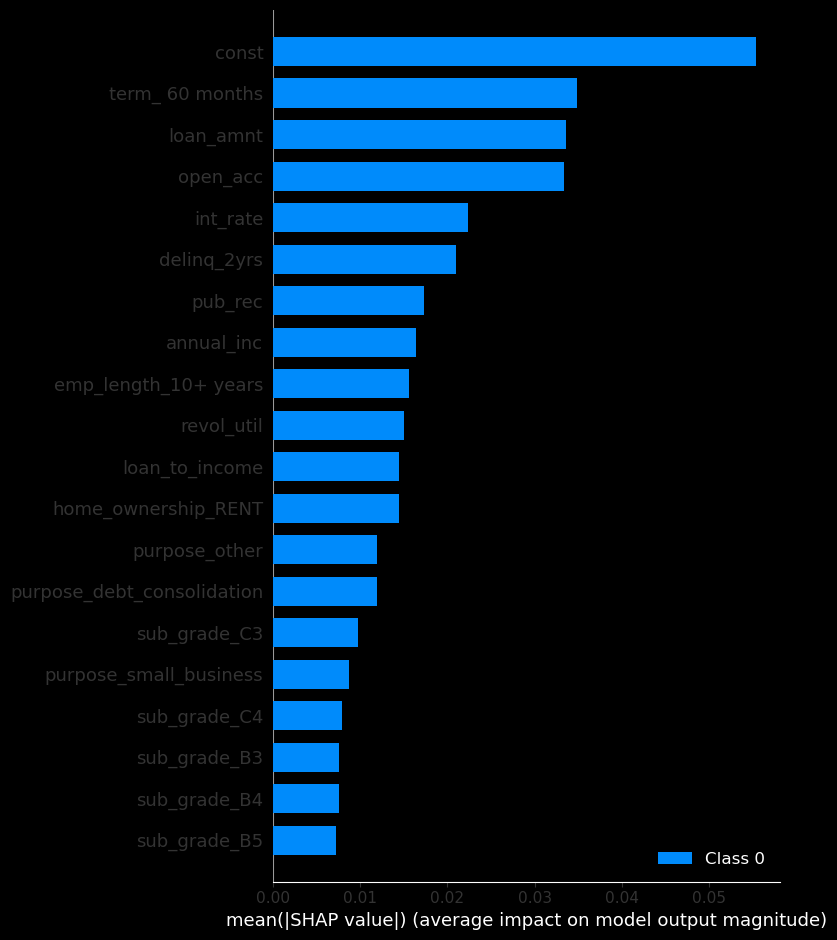

In [ ]:
import numpy as np
import shap
explainer = shap.DeepExplainer(final_nn6, X6_train.values)
X6_test_values = X6_test.values
shap_values6 = explainer.shap_values(X6_test_values)
shap.summary_plot(shap_values6, X6_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score

# Classification report
print("Classification Report:\n", classification_report(y6_test, y_hat_test_nn6))

# AUC
auc = roc_auc_score(y6_test, y_hat_test_nn6)
print(f'AUC: {auc}')

# Confusion Matrix
cm = confusion_matrix(y6_test, y_hat_test_nn6)
print(f'Confusion Matrix: \n{cm}')


Classification Report:
               precision    recall  f1-score   support

           0       0.24      0.64      0.34      6708
           1       0.91      0.62      0.74     37055

    accuracy                           0.62     43763
   macro avg       0.57      0.63      0.54     43763
weighted avg       0.80      0.62      0.68     43763

AUC: 0.6321750525234976
Confusion Matrix: 
[[ 4312  2396]
 [14024 23031]]


Epoch 1/100
429/429 [==============================] - 5s 8ms/step - loss: 0.6438 - val_loss: 0.6430
Epoch 2/100
429/429 [==============================] - 2s 5ms/step - loss: 0.6329 - val_loss: 0.6421
Epoch 3/100
429/429 [==============================] - 2s 5ms/step - loss: 0.6299 - val_loss: 0.6428
Epoch 4/100
429/429 [==============================] - 2s 5ms/step - loss: 0.6276 - val_loss: 0.6407
Epoch 5/100
429/429 [==============================] - 3s 7ms/step - loss: 0.6255 - val_loss: 0.6422
Epoch 6/100
429/429 [==============================] - 3s 6ms/step - loss: 0.6233 - val_loss: 0.6428
Epoch 7/100
429/429 [==============================] - 3s 6ms/step - loss: 0.6209 - val_loss: 0.6441
Epoch 8/100
429/429 [==============================] - 2s 5ms/step - loss: 0.6189 - val_loss: 0.6470
Epoch 9/100
429/429 [==============================] - 2s 5ms/step - loss: 0.6164 - val_loss: 0.6472
Epoch 10/100
429/429 [==============================] - 2s 5ms/step - loss: 0.6138 - val_lo

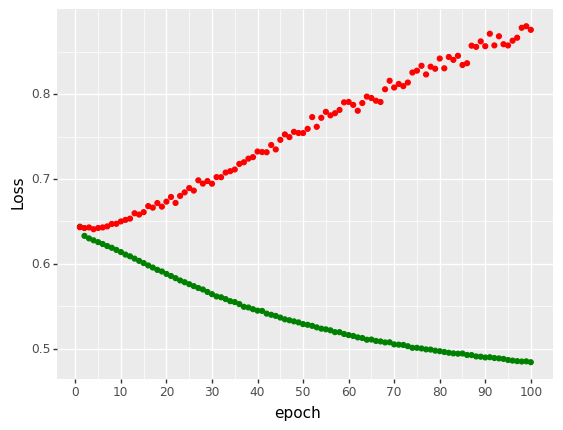

<ggplot: (137185715014)>

In [ ]:
from keras.regularizers import l2
from plotnine import ggplot, aes, geom_point, scale_x_continuous, ylab
import pandas as pd
import numpy as np

def plot_loss(history):
    loss_df = pd.DataFrame({
        'train_loss': history.history['loss'],
        'val_loss': history.history['val_loss']
    })
    loss_df = loss_df.assign(epoch = np.arange(1, len(loss_df['train_loss']) + 1))

    p = (
        ggplot(loss_df) +
        geom_point(aes(x='epoch', y='train_loss'), color='green') +
        geom_point(aes(x='epoch', y='val_loss'), color='red') +
        scale_x_continuous(breaks = np.arange(0, 150, 10)) +
        ylab("Loss")
    )
    return p

oversized_nn6 = Sequential()
oversized_nn6.add(Dense(60, input_dim=X6_train.shape[1], activation='relu'))
oversized_nn6.add(Dense(40, activation='relu'))
oversized_nn6.add(Dense(15, activation='relu'))
oversized_nn6.add(Dense(1, activation='sigmoid'))
oversized_nn6.compile(loss="binary_crossentropy", optimizer="adam")

history_oversized_nn6 = oversized_nn6.fit(X6_train, y6_train, epochs=100, batch_size = 100, validation_data=(X6_val, y6_val))

# After the model has been trained, plot the loss
plot_loss(history_oversized_nn6)


As we can see from the graph, the additional hidden layers and neurons compared to the simple NN makes it extremely overfit immediately from the start. We can attempt to mitigate this effect by applying L2 regularization to the model.

Epoch 1/100
429/429 [==============================] - 5s 6ms/step - loss: 0.9429 - val_loss: 0.6776
Epoch 2/100
429/429 [==============================] - 2s 5ms/step - loss: 0.6631 - val_loss: 0.6648
Epoch 3/100
429/429 [==============================] - 2s 5ms/step - loss: 0.6564 - val_loss: 0.6602
Epoch 4/100
429/429 [==============================] - 2s 5ms/step - loss: 0.6547 - val_loss: 0.6586
Epoch 5/100
429/429 [==============================] - 2s 5ms/step - loss: 0.6530 - val_loss: 0.6582
Epoch 6/100
429/429 [==============================] - 2s 5ms/step - loss: 0.6522 - val_loss: 0.6599
Epoch 7/100
429/429 [==============================] - 2s 4ms/step - loss: 0.6516 - val_loss: 0.6560
Epoch 8/100
429/429 [==============================] - 3s 7ms/step - loss: 0.6515 - val_loss: 0.6582
Epoch 9/100
429/429 [==============================] - 3s 6ms/step - loss: 0.6507 - val_loss: 0.6559
Epoch 10/100
429/429 [==============================] - 3s 6ms/step - loss: 0.6505 - val_lo

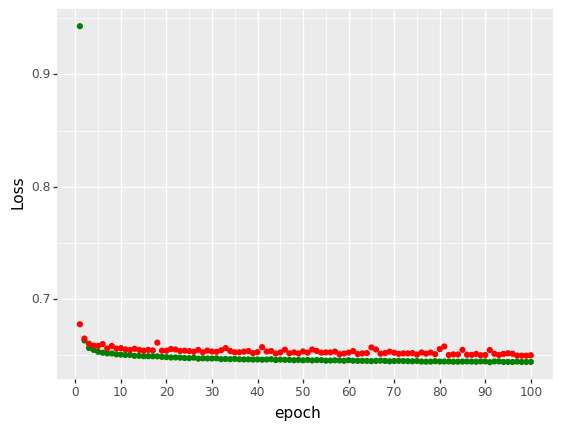

<ggplot: (137208772045)>

In [ ]:
from keras.regularizers import l2
from plotnine import ggplot, aes, geom_point, scale_x_continuous, ylab
import pandas as pd
import numpy as np

def plot_loss(history):
    loss_df = pd.DataFrame({
        'train_loss': history.history['loss'],
        'val_loss': history.history['val_loss']
    })
    loss_df = loss_df.assign(epoch = np.arange(1, len(loss_df['train_loss']) + 1))

    p = (
        ggplot(loss_df) +
        geom_point(aes(x='epoch', y='train_loss'), color='green') +
        geom_point(aes(x='epoch', y='val_loss'), color='red') +
        scale_x_continuous(breaks = np.arange(0, 150, 10)) +
        ylab("Loss")
    )
    return p

oversized_nn6 = Sequential()
oversized_nn6.add(Dense(60, input_dim=X6_train.shape[1], activation='relu', kernel_regularizer=l2(0.01)))
oversized_nn6.add(Dense(40, activation='relu', kernel_regularizer=l2(0.01)))
oversized_nn6.add(Dense(15, activation='relu', kernel_regularizer=l2(0.01)))
oversized_nn6.add(Dense(1, activation='sigmoid'))
oversized_nn6.compile(loss="binary_crossentropy", optimizer="adam")

history_oversized_nn6 = oversized_nn6.fit(X6_train, y6_train, epochs=100, batch_size = 100, validation_data=(X6_val, y6_val))

# After the model has been trained, plot the loss
plot_loss(history_oversized_nn6)


We see that L2 regularization has limited the losses of the validation set. However, it is too similar to the training set, which may indicate underfitting. Therefore, we adjust the L2 regularization factor.

Epoch 1/100
429/429 [==============================] - 5s 6ms/step - loss: 0.7112 - val_loss: 0.6813
Epoch 2/100
429/429 [==============================] - 2s 5ms/step - loss: 0.6626 - val_loss: 0.6616
Epoch 3/100
429/429 [==============================] - 2s 5ms/step - loss: 0.6509 - val_loss: 0.6560
Epoch 4/100
429/429 [==============================] - 2s 5ms/step - loss: 0.6455 - val_loss: 0.6531
Epoch 5/100
429/429 [==============================] - 3s 6ms/step - loss: 0.6429 - val_loss: 0.6498
Epoch 6/100
429/429 [==============================] - 2s 5ms/step - loss: 0.6413 - val_loss: 0.6488
Epoch 7/100
429/429 [==============================] - 2s 5ms/step - loss: 0.6403 - val_loss: 0.6523
Epoch 8/100
429/429 [==============================] - 2s 5ms/step - loss: 0.6394 - val_loss: 0.6478
Epoch 9/100
429/429 [==============================] - 3s 7ms/step - loss: 0.6387 - val_loss: 0.6499
Epoch 10/100
429/429 [==============================] - 3s 7ms/step - loss: 0.6382 - val_lo

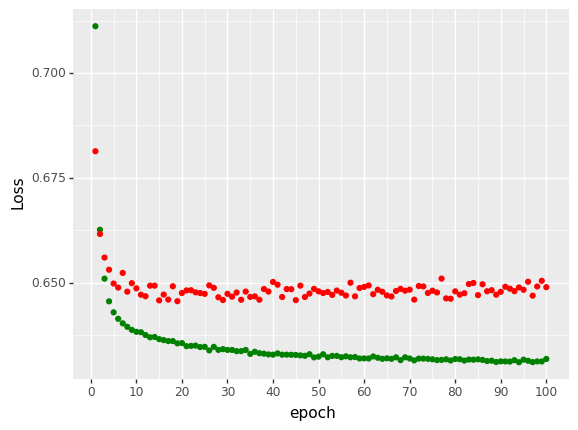

<ggplot: (137209595441)>

In [ ]:
from keras.regularizers import L2
from plotnine import ggplot, aes, geom_point, scale_x_continuous, ylab
import pandas as pd
import numpy as np

def plot_loss(history):
    loss_df = pd.DataFrame({
        'train_loss': history.history['loss'],
        'val_loss': history.history['val_loss']
    })
    loss_df = loss_df.assign(epoch = np.arange(1, len(loss_df['train_loss']) + 1))

    p = (
        ggplot(loss_df) +
        geom_point(aes(x='epoch', y='train_loss'), color='green') +
        geom_point(aes(x='epoch', y='val_loss'), color='red') +
        scale_x_continuous(breaks = np.arange(0, 150, 10)) +
        ylab("Loss")
    )
    return p

oversized_nn6 = Sequential()
oversized_nn6.add(Dense(60, input_dim=X6_train.shape[1], activation='relu', kernel_regularizer=l2(0.001)))
oversized_nn6.add(Dense(40, activation='relu', kernel_regularizer=l2(0.001)))
oversized_nn6.add(Dense(15, activation='relu', kernel_regularizer=l2(0.001)))
oversized_nn6.add(Dense(1, activation='sigmoid'))
oversized_nn6.compile(loss="binary_crossentropy", optimizer="adam")

history_oversized_nn6 = oversized_nn6.fit(X6_train, y6_train, epochs=100, batch_size = 100, validation_data=(X6_val, y6_val))

# After the model has been trained, plot the loss
plot_loss(history_oversized_nn6)


L2 regularization with factor 0.001 shows much better results compared to factor 0.01. Factor 0.001 seems optimal, as it is around the 0.650. 

In [ ]:
from sklearn.metrics import f1_score

final_nn6 = Sequential()
final_nn6.add(Dense(60, input_dim=X6_train.shape[1], activation='relu', kernel_regularizer=l2(0.001)))
final_nn6.add(Dense(40, activation='relu', kernel_regularizer=l2(0.001)))
final_nn6.add(Dense(15, activation='relu', kernel_regularizer=l2(0.001)))
final_nn6.add(Dense(1, activation='sigmoid'))
final_nn6.compile(loss="binary_crossentropy", optimizer="adam")
final_nn6.fit(X6_train_validation, y6_train_validation, epochs=50, batch_size = 20, verbose=0)
y_hat_test_nn6 = final_nn6.predict(X6_test)
y_hat_test_nn6 = np.where(y_hat_test_nn6 >= 0.5, 1, 0)
print("The f1 score of the 6th nn model is {}".format(f1_score(y6_test, y_hat_test_nn6)))

1368/1368 [==============================] - 4s 3ms/step
The f1 score of the 6th nn model is 0.7255681173054775


In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Get the predictions
y_hat_test_nn6 = final_nn6.predict(X6_test)
y_hat_test_nn6_class = np.where(y_hat_test_nn6 >= 0.5, 1, 0)

# Classification report
print("Classification Report:\n", classification_report(y6_test, y_hat_test_nn6_class))

# ROC AUC score
print("ROC AUC Score:", roc_auc_score(y6_test, y_hat_test_nn6))

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y6_test, y_hat_test_nn6_class))


1368/1368 [==============================] - 4s 3ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.23      0.67      0.35      6708
           1       0.91      0.60      0.73     37055

    accuracy                           0.61     43763
   macro avg       0.57      0.64      0.54     43763
weighted avg       0.81      0.61      0.67     43763

ROC AUC Score: 0.6882989914024078
Confusion Matrix:
 [[ 4478  2230]
 [14689 22366]]


In [ ]:
import os
import json
from tensorflow.keras.models import load_model

# Ensure the output directory exists
os.makedirs('../dataset', exist_ok=True)

# Save the model
simple_nn6_new.save('../dataset/simple_nn6_model')

print("Storing the fitting history of simple nn to disk")
with open('../dataset/simple_nn6_history.json', 'w') as handle:
    json.dump(simple_nn6_new.history.history, handle)


Exception ignored in: <function WeakKeyDictionary.__init__.<locals>.remove at 0x000001FEFA1AB1F0>
Traceback (most recent call last):
  File "c:\Users\Lawrence\anaconda3\lib\weakref.py", line 371, in remove
    self = selfref()
KeyboardInterrupt: 


INFO:tensorflow:Assets written to: ../dataset/simple_nn6_model\assets
Storing the fitting history of simple nn to disk


In [ ]:
# we can load the above save model like this:
simple_nn6_new = keras.models.load_model("../dataset/simple_nn6_model")
simple_nn6_new

# reload the fitting history like this
with open("../dataset/simple_nn6_history.json", "r") as handle:
    simple_nn6_new_history = json.load(handle)

In [ ]:
# from keras.wrappers.scikit_learn import KerasClassifier
from scikeras.wrappers import KerasClassifier

In [ ]:
# function that creates the model
# note that we pass the number of neurons as a parameter to the network
def create_model(neurons=1):
    nn_model6 = Sequential()
    nn_model6.add(Dense(60, input_dim=X6_train.shape[1], activation='relu', kernel_regularizer=l2(0.001)))
    nn_model6.add(Dense(40, activation='relu', kernel_regularizer=l2(0.001)))
    nn_model6.add(Dense(15, activation='relu', kernel_regularizer=l2(0.001)))
    nn_model6.add(Dense(1, activation='sigmoid'))
    nn_model6.compile(loss='binary_crossentropy', optimizer='adam')
    return nn_model6

seed = 1234
np.random.seed(seed)

# turn the keras model into a sklearn compatible model
# note that the neurons parameter needs to be specified in the interface of KerasClassifier
model = KerasClassifier(build_fn=create_model, verbose=0, neurons=1)

In [ ]:
# define the grid search parameters
batch_size = [50, 100, 150, 200]
epochs = [30, 50, 100]
neurons = [40, 50, 60, 100]
params_grid = dict(batch_size=batch_size, epochs=epochs, neurons=neurons)

In [ ]:
params_grid

{'batch_size': [50, 100, 150, 200],
 'epochs': [30, 50, 100],
 'neurons': [40, 50, 60, 100]}

In [ ]:
from sklearn.model_selection import PredefinedSplit, GridSearchCV

# use PredefinedSplit to specify which observations are train and which are validation
fold_index = PredefinedSplit([-1]* X6_train.shape[0] + [0] * X6_val.shape[0])

In [ ]:
import datetime
import os
import pickle
from sklearn.model_selection import GridSearchCV

USE_STORED_NN_HYPERTUNED_MODELS = True

# perform grid search with sklearn if needed, otherwise load the grid search already performed
if os.path.exists("../dataset/nn_grid_search.pickle") and USE_STORED_NN_HYPERTUNED_MODELS is True:
    with open('../dataset/nn_grid_search.pickle', 'rb') as handle:
        grid_search_nn = pickle.load(handle)
else:
    start_time = datetime.datetime.now()
    grid_search_nn = GridSearchCV(estimator=model, param_grid=params_grid, n_jobs=-1, cv=fold_index)
    grid_search_nn = grid_search_nn.fit(X6_train_validation, y6_train_validation)
    end_time = datetime.datetime.now()
    print(f'hypertuning with sklearn grid search for neural networks complete in {round((end_time - start_time).seconds/60, 2)} minutes')
    # store the results of the grid search to disk
with open('../dataset/nn_grid_search.pickle', 'wb') as handle:
    pickle.dump(grid_search_nn, handle)


INFO:tensorflow:Assets written to: C:\Users\Lawrence\AppData\Local\Temp\tmpwvl9tv4s\assets


In [ ]:
import datetime
import os
import pickle
from sklearn.model_selection import GridSearchCV

start_time = datetime.datetime.now()
grid_search_nn = GridSearchCV(estimator=model, param_grid=params_grid, n_jobs=-1, cv=fold_index)
grid_search_nn = grid_search_nn.fit(X6_train_validation, y6_train_validation)
end_time = datetime.datetime.now()
print(f'hypertuning with sklearn grid search for neural networks complete in {round((end_time - start_time).seconds/60, 2)} minutes')
# store the results of the grid search to disk
with open('../dataset/nn_grid_search.pickle', 'wb') as handle:
    pickle.dump(grid_search_nn, handle)


``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.


hypertuning with sklearn grid search for neural networks complete in 26.22 minutes
INFO:tensorflow:Assets written to: C:\Users\Lawrence\AppData\Local\Temp\tmpx_y5fte5\assets


In [ ]:
grid_search_nn

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             estimator=KerasClassifier(build_fn=<function create_model at 0x000001FF18C51EE0>, neurons=1, verbose=0),
             n_jobs=-1,
             param_grid={'batch_size': [50, 100, 150, 200],
                         'epochs': [30, 50, 100],
                         'neurons': [40, 50, 60, 100]})

In [ ]:
print("The best parameter combination is: {} with score: {}".format(grid_search_nn.best_params_, grid_search_nn.best_score_))

The best parameter combination is: {'batch_size': 50, 'epochs': 50, 'neurons': 40} with score: 0.6298852718962783


In [ ]:
best_model6 = create_model(40)
best_model6.fit(X6_train_validation, y6_train_validation, epochs=50, batch_size=50, verbose=0)

In [ ]:
y6_hat_test = best_model6.predict(X6_test)
y6_hat_test = np.where(y6_hat_test >= 0.5, 1, 0)
f1_score(y6_test, y6_hat_test)

1368/1368 [==============================] - 4s 3ms/step


0.7191675650952333

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score

# Classification report
print("Classification Report:\n", classification_report(y6_test, y6_hat_test))

# AUC
auc = roc_auc_score(y6_test, y6_hat_test)
print(f'AUC: {auc}')

# Confusion Matrix
cm = confusion_matrix(y6_test, y6_hat_test)
print(f'Confusion Matrix: \n{cm}')


Classification Report:
               precision    recall  f1-score   support

           0       0.23      0.68      0.35      6708
           1       0.91      0.59      0.72     37055

    accuracy                           0.61     43763
   macro avg       0.57      0.64      0.53     43763
weighted avg       0.81      0.61      0.66     43763

AUC: 0.6367750294953102
Confusion Matrix: 
[[ 4558  2150]
 [15042 22013]]


In [ ]:
raise SystemExit("Stop right there!")

SystemExit: Stop right there!

To exit: use 'exit', 'quit', or Ctrl-D.


# Neural Network Model VII

In [ ]:
print(f"The number of neurons for the input layer must be: {X7_train.shape[1]}")

The number of neurons for the input layer must be: 79


In [ ]:
# define the neural network model class instance
simple_nn7 = Sequential()
# add the first input layer with 79 nodes and the first hidden layer, with  relu activation function
# note that the first command does two things: create a first input layer with 29 nodes, and then a hidden layer
# we set the number of neurons to be equal to the (# of nodes in the input layer + # neurons in the output layer)/2,
# i.e. the mean of the number of neurons in the input layer and the output layer. This is usually a good heuristic to get started.
simple_nn7.add(Dense(20, input_dim=X7_train.shape[1], activation='relu'))
# add the output layer with sigmoid function (the sigmoid function is exactly the same as that used in the formulation of logisitc regression
simple_nn7.add(Dense(1, activation='sigmoid'))

In [ ]:
print(simple_nn7.summary())

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (None, 20)                1600      
                                                                 
 dense_51 (Dense)            (None, 1)                 21        
                                                                 
Total params: 1,621
Trainable params: 1,621
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
simple_nn7.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
print(X7_train.shape)
print(y7_train.shape)
print(X7_val.shape)
print(y7_val.shape)

(42881, 79)
(42881,)
(10721, 79)
(10721,)


In [ ]:
simple_nn7.fit(X7_train, y7_train, epochs=100, batch_size = 150)

Epoch 1/100
286/286 [==============================] - 2s 4ms/step - loss: 0.6538
Epoch 2/100
286/286 [==============================] - 1s 4ms/step - loss: 0.6374
Epoch 3/100
286/286 [==============================] - 1s 3ms/step - loss: 0.6343
Epoch 4/100
286/286 [==============================] - 1s 3ms/step - loss: 0.6325
Epoch 5/100
286/286 [==============================] - 1s 3ms/step - loss: 0.6313
Epoch 6/100
286/286 [==============================] - 1s 3ms/step - loss: 0.6304
Epoch 7/100
286/286 [==============================] - 1s 2ms/step - loss: 0.6295
Epoch 8/100
286/286 [==============================] - 1s 3ms/step - loss: 0.6288
Epoch 9/100
286/286 [==============================] - 1s 2ms/step - loss: 0.6278
Epoch 10/100
286/286 [==============================] - 1s 2ms/step - loss: 0.6273
Epoch 11/100
286/286 [==============================] - 1s 3ms/step - loss: 0.6268
Epoch 12/100
286/286 [==============================] - 1s 3ms/step - loss: 0.6261
Epoch 13/100


dict_keys(['loss'])


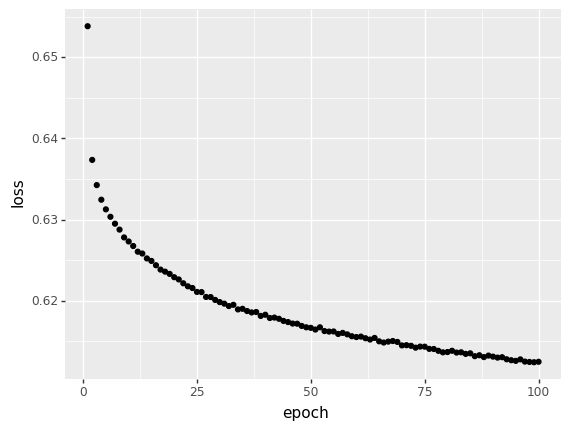

<ggplot: (137209130132)>

In [ ]:
from plotnine import ggplot, aes, geom_point
import numpy as np
import pandas as pd

# see what information has been logged during the training process
print(simple_nn7.history.history.keys())

# plot the training loss over epochs
loss_df = pd.DataFrame(simple_nn7.history.history['loss'])
loss_df.columns = ['loss']
loss_df = loss_df.assign(epoch = np.arange(1, len(loss_df) + 1))

(
    ggplot(loss_df, aes(x='epoch', y='loss')) +
    geom_point()
)


In [ ]:
simple_nn7.fit(X7_train, y7_train, epochs=100, batch_size = 100, validation_data=(X7_val, y7_val))

Epoch 1/100
429/429 [==============================] - 2s 4ms/step - loss: 0.6134 - val_loss: 0.6520
Epoch 2/100
429/429 [==============================] - 2s 6ms/step - loss: 0.6129 - val_loss: 0.6506
Epoch 3/100
429/429 [==============================] - 2s 5ms/step - loss: 0.6130 - val_loss: 0.6513
Epoch 4/100
429/429 [==============================] - 2s 4ms/step - loss: 0.6125 - val_loss: 0.6508
Epoch 5/100
429/429 [==============================] - 2s 4ms/step - loss: 0.6128 - val_loss: 0.6507
Epoch 6/100
429/429 [==============================] - 2s 4ms/step - loss: 0.6123 - val_loss: 0.6492
Epoch 7/100
429/429 [==============================] - 2s 4ms/step - loss: 0.6121 - val_loss: 0.6507
Epoch 8/100
429/429 [==============================] - 2s 5ms/step - loss: 0.6122 - val_loss: 0.6517
Epoch 9/100
429/429 [==============================] - 1s 3ms/step - loss: 0.6122 - val_loss: 0.6505
Epoch 10/100
429/429 [==============================] - 1s 3ms/step - loss: 0.6119 - val_lo

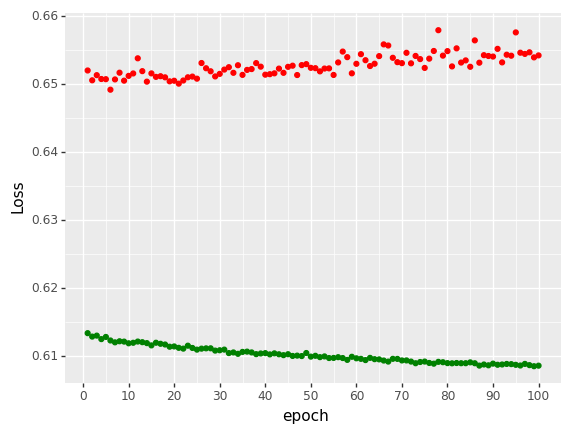

<ggplot: (137216096726)>

In [ ]:
from plotnine import ggplot, aes, geom_point, scale_x_continuous, ylab
import numpy as np
import pandas as pd

# plot the training loss over epochs
def plot_loss(nn_model):
    loss_df = pd.DataFrame({
        'train_loss': nn_model.history.history['loss'],
        'val_loss': nn_model.history.history['val_loss']
    })
    loss_df = loss_df.assign(epoch = np.arange(1, len(loss_df['train_loss']) + 1))

    p = (
        ggplot(loss_df) +
        geom_point(aes(x='epoch', y='train_loss'), color='green') +
        geom_point(aes(x='epoch', y='val_loss'), color='red') +
        scale_x_continuous(breaks = np.arange(0, 150, 10)) +
        ylab("Loss")
    )
    return p

plot_loss(simple_nn7)


In [ ]:
# Assuming you have a list of the original column names
original_columns = X7.columns  # Replace this with your actual column names list

# Convert numpy arrays back to pandas DataFrame
X7_train1 = pd.DataFrame(X7_train, columns=original_columns)
X7_val1 = pd.DataFrame(X7_val, columns=original_columns)

# Assuming y7_train and y7_val are 1-D numpy arrays, you can convert them to pandas Series
y7_train1 = pd.Series(y7_train)
y7_val1 = pd.Series(y7_val)

# Now you can concatenate
X7_train_validation = pd.concat([X7_train1, X7_val1])
y7_train_validation = pd.concat([y7_train1, y7_val1])


In [ ]:
from sklearn.metrics import f1_score

final_nn7 = Sequential()
final_nn7.add(Dense(20, input_dim=X7_train.shape[1], activation='relu'))
final_nn7.add(Dense(1, activation='sigmoid'))
final_nn7.compile(loss='binary_crossentropy', optimizer='adam')
final_nn7.fit(X7_train_validation, y7_train_validation, epochs=50, batch_size = 20, verbose=0)
y_hat_test_nn7 = final_nn7.predict(X7_test)
y_hat_test_nn7 = np.where(y_hat_test_nn7 >= 0.5, 1, 0)
print("The f1 score of the 7th nn model is {}".format(f1_score(y7_test, y_hat_test_nn7)))

1368/1368 [==============================] - 3s 2ms/step
The f1 score of the 7th nn model is 0.7689903288201161


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score

# Print classification report
print("Validation Set Classification report: \n", classification_report(y7_test, y_hat_test_nn7))

# AUC
auc = roc_auc_score(y7_test, y_hat_test_nn7)
print(f'AUC: {auc}')

# Confusion Matrix
cm = confusion_matrix(y7_test, y_hat_test_nn7)
print(f'Confusion Matrix: \n{cm}')


Validation Set Classification report: 
               precision    recall  f1-score   support

           0       0.25      0.59      0.35      6708
           1       0.90      0.67      0.77     37055

    accuracy                           0.66     43763
   macro avg       0.57      0.63      0.56     43763
weighted avg       0.80      0.66      0.70     43763

AUC: 0.6323933174163661
Confusion Matrix: 
[[ 3986  2722]
 [12207 24848]]


In [ ]:
oversized_nn7 = Sequential()
oversized_nn7.add(Dense(60, input_dim=X7_train.shape[1], activation='relu'))
oversized_nn7.add(Dense(40, activation='relu'))
oversized_nn7.add(Dense(15, activation='relu'))
oversized_nn7.add(Dense(1, activation='sigmoid'))
oversized_nn7.compile(loss="binary_crossentropy", optimizer="adam")
oversized_nn7.fit(X7_train, y7_train, epochs=150, batch_size = 100, validation_data=(X7_val, y7_val))

Epoch 1/150
429/429 [==============================] - 2s 3ms/step - loss: 0.6455 - val_loss: 0.6429
Epoch 2/150
429/429 [==============================] - 1s 3ms/step - loss: 0.6332 - val_loss: 0.6420
Epoch 3/150
429/429 [==============================] - 1s 3ms/step - loss: 0.6304 - val_loss: 0.6412
Epoch 4/150
429/429 [==============================] - 1s 3ms/step - loss: 0.6276 - val_loss: 0.6404
Epoch 5/150
429/429 [==============================] - 1s 3ms/step - loss: 0.6244 - val_loss: 0.6408
Epoch 6/150
429/429 [==============================] - 1s 3ms/step - loss: 0.6216 - val_loss: 0.6428
Epoch 7/150
429/429 [==============================] - 2s 4ms/step - loss: 0.6189 - val_loss: 0.6427
Epoch 8/150
429/429 [==============================] - 2s 5ms/step - loss: 0.6153 - val_loss: 0.6471
Epoch 9/150
429/429 [==============================] - 2s 4ms/step - loss: 0.6117 - val_loss: 0.6511
Epoch 10/150
429/429 [==============================] - 2s 4ms/step - loss: 0.6090 - val_lo

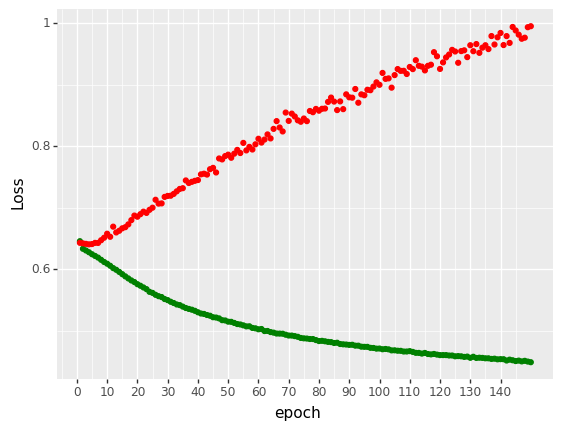

<ggplot: (137216371378)>

In [ ]:
plot_loss(oversized_nn7)

As expected, the additional layers and neurons has caused the model to overfit as we had seen in model 6. We apply L2 regularization.

Epoch 1/100
429/429 [==============================] - 5s 8ms/step - loss: 0.9369 - val_loss: 0.6764
Epoch 2/100
429/429 [==============================] - 2s 5ms/step - loss: 0.6614 - val_loss: 0.6663
Epoch 3/100
429/429 [==============================] - 2s 4ms/step - loss: 0.6565 - val_loss: 0.6590
Epoch 4/100
429/429 [==============================] - 2s 4ms/step - loss: 0.6535 - val_loss: 0.6615
Epoch 5/100
429/429 [==============================] - 2s 4ms/step - loss: 0.6525 - val_loss: 0.6635
Epoch 6/100
429/429 [==============================] - 2s 4ms/step - loss: 0.6516 - val_loss: 0.6559
Epoch 7/100
429/429 [==============================] - 1s 3ms/step - loss: 0.6513 - val_loss: 0.6602
Epoch 8/100
429/429 [==============================] - 1s 3ms/step - loss: 0.6506 - val_loss: 0.6567
Epoch 9/100
429/429 [==============================] - 2s 4ms/step - loss: 0.6498 - val_loss: 0.6557
Epoch 10/100
429/429 [==============================] - 2s 4ms/step - loss: 0.6494 - val_lo

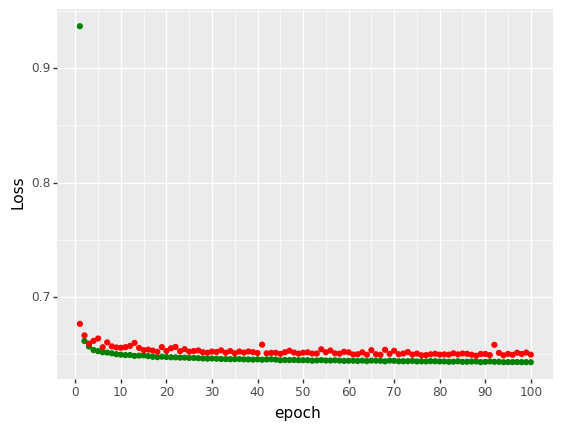

<ggplot: (137227922149)>

In [ ]:
from keras.regularizers import l2
from plotnine import ggplot, aes, geom_point, scale_x_continuous, ylab
import pandas as pd
import numpy as np

def plot_loss(history):
    loss_df = pd.DataFrame({
        'train_loss': history.history['loss'],
        'val_loss': history.history['val_loss']
    })
    loss_df = loss_df.assign(epoch = np.arange(1, len(loss_df['train_loss']) + 1))

    p = (
        ggplot(loss_df) +
        geom_point(aes(x='epoch', y='train_loss'), color='green') +
        geom_point(aes(x='epoch', y='val_loss'), color='red') +
        scale_x_continuous(breaks = np.arange(0, 150, 10)) +
        ylab("Loss")
    )
    return p

oversized_nn7 = Sequential()
oversized_nn7.add(Dense(60, input_dim=X7_train.shape[1], activation='relu', kernel_regularizer=l2(0.01)))
oversized_nn7.add(Dense(40, activation='relu', kernel_regularizer=l2(0.01)))
oversized_nn7.add(Dense(15, activation='relu', kernel_regularizer=l2(0.01)))
oversized_nn7.add(Dense(1, activation='sigmoid'))
oversized_nn7.compile(loss="binary_crossentropy", optimizer="adam")
history = oversized_nn7.fit(X7_train, y7_train, epochs=100, batch_size=100, validation_data=(X7_val, y7_val))

# After the model has been trained, plot the loss
plot_loss(history)


There is extreme underfit after applying Lasso 2 regularization of 0.01. We can attempt to minimize the effect by applying a smaller factor of L2.

Epoch 1/100
429/429 [==============================] - 3s 4ms/step - loss: 0.7197 - val_loss: 0.6878
Epoch 2/100
429/429 [==============================] - 2s 4ms/step - loss: 0.6664 - val_loss: 0.6659
Epoch 3/100
429/429 [==============================] - 1s 3ms/step - loss: 0.6528 - val_loss: 0.6562
Epoch 4/100
429/429 [==============================] - 1s 3ms/step - loss: 0.6467 - val_loss: 0.6530
Epoch 5/100
429/429 [==============================] - 2s 4ms/step - loss: 0.6436 - val_loss: 0.6521
Epoch 6/100
429/429 [==============================] - 2s 4ms/step - loss: 0.6413 - val_loss: 0.6475
Epoch 7/100
429/429 [==============================] - 2s 5ms/step - loss: 0.6398 - val_loss: 0.6489
Epoch 8/100
429/429 [==============================] - 2s 5ms/step - loss: 0.6387 - val_loss: 0.6475
Epoch 9/100
429/429 [==============================] - 2s 4ms/step - loss: 0.6378 - val_loss: 0.6508
Epoch 10/100
429/429 [==============================] - 2s 4ms/step - loss: 0.6374 - val_lo

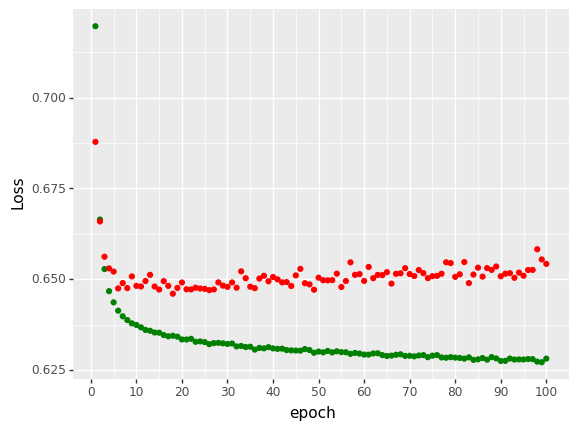

<ggplot: (137228201244)>

In [ ]:
from keras.regularizers import l2
from plotnine import ggplot, aes, geom_point, scale_x_continuous, ylab
import pandas as pd
import numpy as np

def plot_loss(history):
    loss_df = pd.DataFrame({
        'train_loss': history.history['loss'],
        'val_loss': history.history['val_loss']
    })
    loss_df = loss_df.assign(epoch = np.arange(1, len(loss_df['train_loss']) + 1))

    p = (
        ggplot(loss_df) +
        geom_point(aes(x='epoch', y='train_loss'), color='green') +
        geom_point(aes(x='epoch', y='val_loss'), color='red') +
        scale_x_continuous(breaks = np.arange(0, 150, 10)) +
        ylab("Loss")
    )
    return p

oversized_nn7 = Sequential()
oversized_nn7.add(Dense(60, input_dim=X7_train.shape[1], activation='relu', kernel_regularizer=l2(0.001)))
oversized_nn7.add(Dense(40, activation='relu', kernel_regularizer=l2(0.001)))
oversized_nn7.add(Dense(15, activation='relu', kernel_regularizer=l2(0.001)))
oversized_nn7.add(Dense(1, activation='sigmoid'))
oversized_nn7.compile(loss="binary_crossentropy", optimizer="adam")

history_oversized_nn7 = oversized_nn7.fit(X7_train, y7_train, epochs=100, batch_size = 100, validation_data=(X7_val, y7_val))

# After the model has been trained, plot the loss
plot_loss(history_oversized_nn7)


After applying L2 by factor 0.001, we can see that our model is slightly overfitting. We try again with factor 0.002.

Epoch 1/100
429/429 [==============================] - 3s 4ms/step - loss: 0.7713 - val_loss: 0.7001
Epoch 2/100
429/429 [==============================] - 1s 3ms/step - loss: 0.6728 - val_loss: 0.6665
Epoch 3/100
429/429 [==============================] - 1s 3ms/step - loss: 0.6532 - val_loss: 0.6565
Epoch 4/100
429/429 [==============================] - 1s 3ms/step - loss: 0.6461 - val_loss: 0.6513
Epoch 5/100
429/429 [==============================] - 1s 3ms/step - loss: 0.6433 - val_loss: 0.6505
Epoch 6/100
429/429 [==============================] - 1s 3ms/step - loss: 0.6416 - val_loss: 0.6500
Epoch 7/100
429/429 [==============================] - 1s 3ms/step - loss: 0.6408 - val_loss: 0.6484
Epoch 8/100
429/429 [==============================] - 2s 4ms/step - loss: 0.6404 - val_loss: 0.6486
Epoch 9/100
429/429 [==============================] - 2s 4ms/step - loss: 0.6397 - val_loss: 0.6472
Epoch 10/100
429/429 [==============================] - 2s 5ms/step - loss: 0.6392 - val_lo

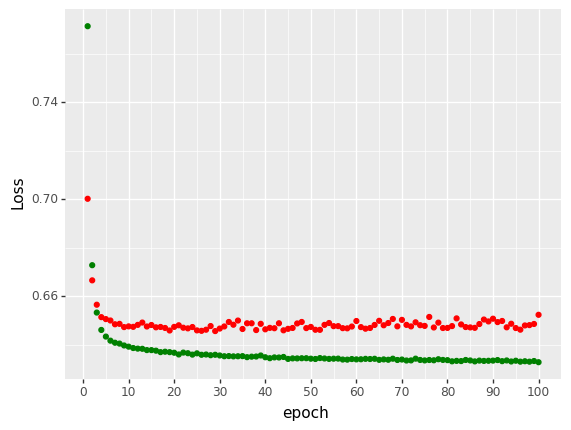

<ggplot: (137228549087)>

In [ ]:
from keras.regularizers import l2
from plotnine import ggplot, aes, geom_point, scale_x_continuous, ylab
import pandas as pd
import numpy as np

def plot_loss(history):
    loss_df = pd.DataFrame({
        'train_loss': history.history['loss'],
        'val_loss': history.history['val_loss']
    })
    loss_df = loss_df.assign(epoch = np.arange(1, len(loss_df['train_loss']) + 1))

    p = (
        ggplot(loss_df) +
        geom_point(aes(x='epoch', y='train_loss'), color='green') +
        geom_point(aes(x='epoch', y='val_loss'), color='red') +
        scale_x_continuous(breaks = np.arange(0, 150, 10)) +
        ylab("Loss")
    )
    return p

oversized_nn7 = Sequential()
oversized_nn7.add(Dense(60, input_dim=X7_train.shape[1], activation='relu', kernel_regularizer=l2(0.002)))
oversized_nn7.add(Dense(40, activation='relu', kernel_regularizer=l2(0.002)))
oversized_nn7.add(Dense(15, activation='relu', kernel_regularizer=l2(0.002)))
oversized_nn7.add(Dense(1, activation='sigmoid'))
oversized_nn7.compile(loss="binary_crossentropy", optimizer="adam")

history_oversized_nn7_1 = oversized_nn7.fit(X7_train, y7_train, epochs=100, batch_size = 100, validation_data=(X7_val, y7_val))

# After the model has been trained, plot the loss
plot_loss(history_oversized_nn7_1)


This looks a lot better, but let's see how it looks when we apply factor 0.0015

Epoch 1/100
429/429 [==============================] - 6s 5ms/step - loss: 0.7380 - val_loss: 0.6893
Epoch 2/100
429/429 [==============================] - 2s 4ms/step - loss: 0.6665 - val_loss: 0.6646
Epoch 3/100
429/429 [==============================] - 2s 5ms/step - loss: 0.6520 - val_loss: 0.6568
Epoch 4/100
429/429 [==============================] - 2s 5ms/step - loss: 0.6465 - val_loss: 0.6522
Epoch 5/100
429/429 [==============================] - 2s 6ms/step - loss: 0.6436 - val_loss: 0.6501
Epoch 6/100
429/429 [==============================] - 2s 5ms/step - loss: 0.6422 - val_loss: 0.6495
Epoch 7/100
429/429 [==============================] - 2s 5ms/step - loss: 0.6408 - val_loss: 0.6492
Epoch 8/100
429/429 [==============================] - 2s 6ms/step - loss: 0.6402 - val_loss: 0.6500
Epoch 9/100
429/429 [==============================] - 2s 5ms/step - loss: 0.6395 - val_loss: 0.6480
Epoch 10/100
429/429 [==============================] - 1s 3ms/step - loss: 0.6394 - val_lo

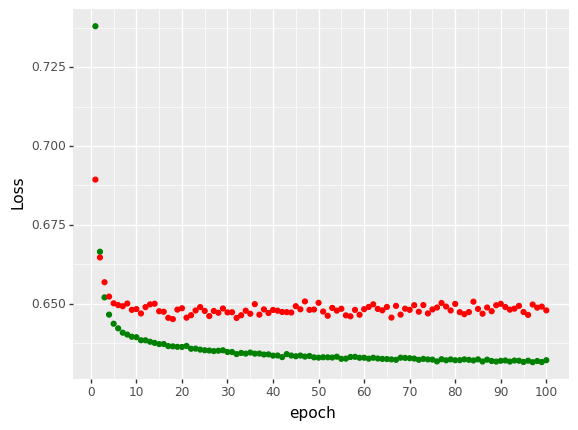

<ggplot: (137228606621)>

In [ ]:
from keras.regularizers import l2
from plotnine import ggplot, aes, geom_point, scale_x_continuous, ylab
import pandas as pd
import numpy as np

def plot_loss(history):
    loss_df = pd.DataFrame({
        'train_loss': history.history['loss'],
        'val_loss': history.history['val_loss']
    })
    loss_df = loss_df.assign(epoch = np.arange(1, len(loss_df['train_loss']) + 1))

    p = (
        ggplot(loss_df) +
        geom_point(aes(x='epoch', y='train_loss'), color='green') +
        geom_point(aes(x='epoch', y='val_loss'), color='red') +
        scale_x_continuous(breaks = np.arange(0, 150, 10)) +
        ylab("Loss")
    )
    return p

oversized_nn7 = Sequential()
oversized_nn7.add(Dense(60, input_dim=X7_train.shape[1], activation='relu', kernel_regularizer=l2(0.0015)))
oversized_nn7.add(Dense(40, activation='relu', kernel_regularizer=l2(0.0015)))
oversized_nn7.add(Dense(15, activation='relu', kernel_regularizer=l2(0.0015)))
oversized_nn7.add(Dense(1, activation='sigmoid'))
oversized_nn7.compile(loss="binary_crossentropy", optimizer="adam")

history_oversized_nn7_2 = oversized_nn7.fit(X7_train, y7_train, epochs=100, batch_size = 100, validation_data=(X7_val, y7_val))

# After the model has been trained, plot the loss
plot_loss(history_oversized_nn7_2)


Applying factor 0.0015 provides us with a result which look similar to model 6.

In [ ]:
import os
import json
from tensorflow.keras.models import load_model

# Ensure the output directory exists
os.makedirs('../dataset', exist_ok=True)

# Save the model
simple_nn7.save('../dataset/simple_nn6_model')

print("Storing the fitting history of simple nn to disk")
with open('../dataset/simple_nn6_history.json', 'w') as handle:
    json.dump(simple_nn7.history.history, handle)


INFO:tensorflow:Assets written to: ../dataset/simple_nn6_model\assets
Storing the fitting history of simple nn to disk


In [ ]:
# we can load the above save model like this:
simple_nn7 = keras.models.load_model("../dataset/simple_nn6_model")
simple_nn7

# reload the fitting history like this
with open("../dataset/simple_nn6_history.json", "r") as handle:
    simple_nn7_history = json.load(handle)

In [ ]:
# function that creates the model
# note that we pass the number of neurons as a parameter to the network
def create_model(neurons=60):
    nn_model7 = Sequential()
    nn_model7.add(Dense(neurons, input_dim=X7_train.shape[1], activation="relu", kernel_regularizer=l2(0.0015)))
    nn_model7.add(Dense(40, activation='relu', kernel_regularizer=l2(0.0015)))
    nn_model7.add(Dense(15, activation='relu', kernel_regularizer=l2(0.0015)))
    nn_model7.add(Dense(1, activation='sigmoid'))
    nn_model7.compile(loss='binary_crossentropy', optimizer='adam')
    return nn_model7

seed = 1234
np.random.seed(seed)

# turn the keras model into a sklearn compatible model
# note that the neurons parameter needs to be specified in the interface of KerasClassifier
model = KerasClassifier(build_fn=create_model, verbose=0, neurons=60)

In [ ]:
# define the grid search parameters
batch_size = [50, 100, 150, 200]
epochs = [30, 50, 100]
neurons = [40, 50, 60, 100]
params_grid = dict(batch_size=batch_size, epochs=epochs, neurons=neurons)

In [ ]:
params_grid

{'batch_size': [50, 100, 150, 200],
 'epochs': [30, 50, 100],
 'neurons': [40, 50, 60, 100]}

In [ ]:
from sklearn.model_selection import PredefinedSplit, GridSearchCV

# use PredefinedSplit to specify which observations are train and which are validation
fold_index = PredefinedSplit([-1]* X7_train.shape[0] + [0] * X7_val.shape[0])

In [172]:
import datetime
import os
import pickle
from sklearn.model_selection import GridSearchCV

start_time = datetime.datetime.now()
grid_search_nn = GridSearchCV(estimator=model, param_grid=params_grid, n_jobs=-1, cv=fold_index)
grid_search_nn = grid_search_nn.fit(X7_train_validation, y7_train_validation)
end_time = datetime.datetime.now()
print(f'hypertuning with sklearn grid search for neural networks complete in {round((end_time - start_time).seconds/60, 2)} minutes')
# store the results of the grid search to disk
with open('../dataset/nn_grid_search.pickle', 'wb') as handle:
    pickle.dump(grid_search_nn, handle)


``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.


hypertuning with sklearn grid search for neural networks complete in 31.63 minutes
INFO:tensorflow:Assets written to: C:\Users\Lawrence\AppData\Local\Temp\tmp3meulrqy\assets


In [173]:
grid_search_nn

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             estimator=KerasClassifier(build_fn=<function create_model at 0x000001FF25024040>, neurons=60, verbose=0),
             n_jobs=-1,
             param_grid={'batch_size': [50, 100, 150, 200],
                         'epochs': [30, 50, 100],
                         'neurons': [40, 50, 60, 100]})

In [174]:
print("The best parameter combination is: {} with score: {}".format(grid_search_nn.best_params_, grid_search_nn.best_score_))

The best parameter combination is: {'batch_size': 150, 'epochs': 50, 'neurons': 50} with score: 0.6330566178528122


In [179]:
best_model7 = create_model(50)
best_model7.fit(X7_train_validation, y7_train_validation, epochs=50, batch_size=150, verbose=0)

In [180]:
y7_hat_test = best_model7.predict(X7_test)
y7_hat_test = np.where(y7_hat_test >= 0.5, 1, 0)

score = f1_score(y7_test, y7_hat_test)
print("The F1 score for the best NN of model 7 is: ", score)

1368/1368 [==============================] - 5s 4ms/step
The F1 score for the best NN of model 7 is:  0.7290028158073599


In [182]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score

# Compute and print the classification report
print(classification_report(y7_test, y7_hat_test))

# AUC
auc = roc_auc_score(y7_test, y7_hat_test)
print(f'AUC: {auc}')

# Confusion Matrix
cm = confusion_matrix(y7_test, y7_hat_test)
print(f'Confusion Matrix: \n{cm}')


              precision    recall  f1-score   support

           0       0.24      0.67      0.35      6708
           1       0.91      0.61      0.73     37055

    accuracy                           0.62     43763
   macro avg       0.57      0.64      0.54     43763
weighted avg       0.81      0.62      0.67     43763

AUC: 0.6388252241044131
Confusion Matrix: 
[[ 4493  2215]
 [14531 22524]]


In [178]:
raise SystemExit("Stop right there!")

SystemExit: Stop right there!

To exit: use 'exit', 'quit', or Ctrl-D.


Final report of Model 6

In [183]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score

# Compute and print the classification report
print(classification_report(y6_test, y6_hat_test))

# AUC
auc = roc_auc_score(y6_test, y6_hat_test)
print(f'AUC: {auc}')

# Confusion Matrix
cm = confusion_matrix(y6_test, y6_hat_test)
print(f'Confusion Matrix: \n{cm}')


              precision    recall  f1-score   support

           0       0.23      0.68      0.35      6708
           1       0.91      0.59      0.72     37055

    accuracy                           0.61     43763
   macro avg       0.57      0.64      0.53     43763
weighted avg       0.81      0.61      0.66     43763

AUC: 0.6367750294953102
Confusion Matrix: 
[[ 4558  2150]
 [15042 22013]]


### Neural Networks Conclusion

Model 6 is better at predicting TN (charged off loans), but also predicts more FN.
Although, model 6 predicts fewer FP than model 7.
Overall, model 7 has a slightly better accuracy and AUC score.

# Logistic Regression on Model VI

              precision    recall  f1-score   support

           0       0.24      0.66      0.35      6708
           1       0.91      0.62      0.74     37055

    accuracy                           0.63     43763
   macro avg       0.57      0.64      0.55     43763
weighted avg       0.81      0.63      0.68     43763

ROC AUC score:  0.6898959764800296
Confusion matrix:
 [[ 4398  2310]
 [13968 23087]]


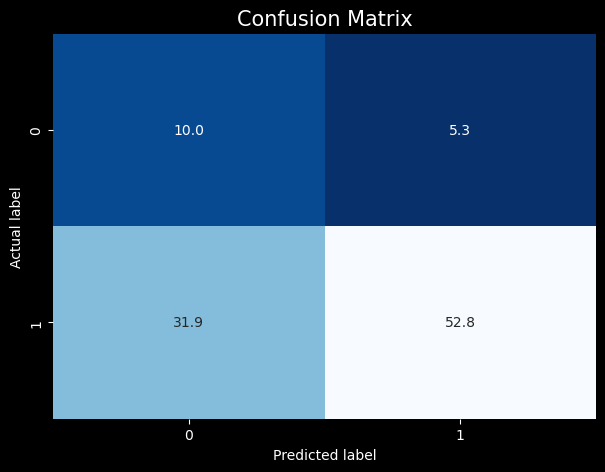

In [186]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create an instance of LogisticRegression
logreg6 = LogisticRegression(penalty='none', max_iter=1000)

# Fit the model using the training data
logreg6.fit(X6_train_validation, y6_train_validation)

# Use the model to make predictions on the test data
y6_pred = logreg6.predict(X6_test)

# Calculate the probabilities of each class
y6_pred_prob = logreg6.predict_proba(X6_test)[:, 1]

# Compute and print the classification report
print(classification_report(y6_test, y6_pred))

# Compute and print the ROC AUC score
print("ROC AUC score: ", roc_auc_score(y6_test, y6_pred_prob))

# Compute and print the confusion matrix
cm6 = confusion_matrix(y6_test, y6_pred)
print("Confusion matrix:\n", cm6)

# Calculate percentages in the confusion matrix
cm6_percent = cm6 / cm6.sum() * 100

# Plot confusion matrix with percentages
plt.figure(figsize=(7, 5))
sns.heatmap(cm6_percent, annot=True, fmt=".1f", cmap='Blues_r', cbar=False)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix', size=15)
plt.show()


Checking for overfitting

In [187]:
from sklearn.metrics import accuracy_score

# Make predictions on the training data
y6_train_pred = logreg6.predict(X6_train_validation)

# Make predictions on the test data
y6_test_pred = logreg6.predict(X6_test)

# Calculate and print the accuracy on the training data
train_accuracy6 = accuracy_score(y6_train_validation, y6_train_pred)
print("Training accuracy: ", train_accuracy6)

# Calculate and print the accuracy on the test data
test_accuracy6 = accuracy_score(y6_test, y6_test_pred)
print("Test accuracy: ", test_accuracy6)


Training accuracy:  0.6365247565389351
Test accuracy:  0.6280419532481777


Training accuracy & test accuracy are very close. Therefore, we can conclude that there is no overfitting.

In [188]:
import statsmodels.api as sm

# Adding constant is required for statsmodels logistic regression
X6_train_validation_sm = sm.add_constant(X6_train_validation)

# Fit model
logit_model=sm.Logit(y6_train_validation, X6_train_validation_sm)
result=logit_model.fit()

# Output model summary
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.634946
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                53602
Model:                          Logit   Df Residuals:                    53528
Method:                           MLE   Df Model:                           73
Date:                Sun, 04 Jun 2023   Pseudo R-squ.:                 0.08397
Time:                        23:14:09   Log-Likelihood:                -34034.
converged:                       True   LL-Null:                       -37154.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.1155      0.044     -2.611      0.009   

In [189]:
import numpy as np

# Assuming you have the coefficient for the intercept term
intercept_coef6 = -0.1178

# Calculate the log-odds of the base model
log_odds_base_model6 = intercept_coef6

# Calculate the odds of the base model
odds_base_model6 = np.exp(log_odds_base_model6)

# Display the log-odds and odds of the base model
print("Log-Odds of the Base Model:", log_odds_base_model6)
print("Odds of the Base Model:", odds_base_model6)

Log-Odds of the Base Model: -0.1178
Odds of the Base Model: 0.8888738096002463


In [190]:
import math

# Define the odds value
odds = odds_base_model6

# Calculate the probability
probability = odds / (1 + odds)

# Print the probability
print("Probability:", probability)


Probability: 0.4705840088853601


In [191]:
pd.set_option('display.max_rows', None)

# Get a Series object mapping each column name to its respective coefficient
coefficients = pd.Series(logreg6.coef_[0], index=X6_train_validation.columns)

# Print the coefficients sorted by absolute value
print(coefficients.abs().sort_values(ascending=False))


sub_grade_G3                   1.974418
sub_grade_G1                   1.935228
sub_grade_F4                   1.915555
sub_grade_F5                   1.908771
sub_grade_F3                   1.893444
sub_grade_F2                   1.796716
sub_grade_E4                   1.763765
sub_grade_E2                   1.619852
sub_grade_G5                   1.609354
sub_grade_E5                   1.592817
sub_grade_G2                   1.592389
sub_grade_D4                   1.578232
sub_grade_E1                   1.551024
sub_grade_D3                   1.502547
sub_grade_E3                   1.472378
sub_grade_D2                   1.470337
sub_grade_D1                   1.464834
sub_grade_F1                   1.443288
sub_grade_C3                   1.427388
sub_grade_D5                   1.409984
sub_grade_C5                   1.398876
sub_grade_C4                   1.369439
sub_grade_G4                   1.336845
sub_grade_C1                   1.252529
sub_grade_B5                   1.235013


# Logistic Regression on Model VII

              precision    recall  f1-score   support

           0       0.24      0.65      0.35      6708
           1       0.91      0.62      0.74     37055

    accuracy                           0.63     43763
   macro avg       0.57      0.64      0.54     43763
weighted avg       0.81      0.63      0.68     43763

ROC AUC score:  0.6909356162618912
Confusion matrix:
 [[ 4391  2317]
 [13983 23072]]


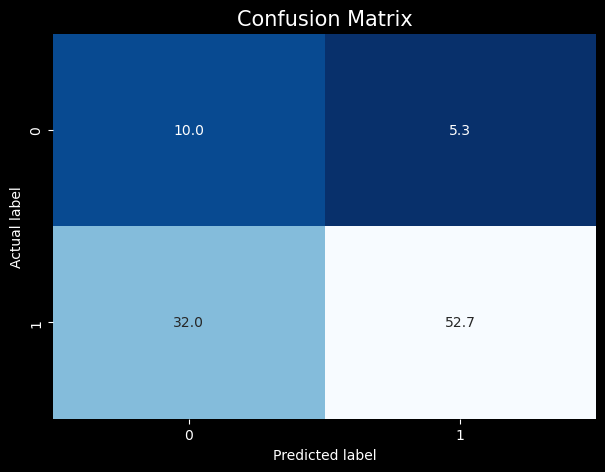

In [192]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create an instance of LogisticRegression
logreg7 = LogisticRegression(penalty='none', max_iter=1000)

# Fit the model using the training data
logreg7.fit(X7_train_validation, y7_train_validation)

# Use the model to make predictions on the test data
y7_pred = logreg7.predict(X7_test)

# Calculate the probabilities of each class
y7_pred_prob = logreg7.predict_proba(X7_test)[:, 1]

# Compute and print the classification report
print(classification_report(y7_test, y7_pred))

# Compute and print the ROC AUC score
print("ROC AUC score: ", roc_auc_score(y7_test, y7_pred_prob))

# Compute and print the confusion matrix
cm7 = confusion_matrix(y7_test, y7_pred)
print("Confusion matrix:\n", cm7)

# Calculate percentages in the confusion matrix
cm7_percent = cm7 / cm7.sum() * 100

# Plot confusion matrix with percentages
plt.figure(figsize=(7, 5))
sns.heatmap(cm7_percent, annot=True, fmt=".1f", cmap='Blues_r', cbar=False)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix', size=15)
plt.show()


Checking for overfitting

In [193]:
from sklearn.metrics import accuracy_score

# Make predictions on the training data
y7_train_pred = logreg7.predict(X7_train_validation)

# Make predictions on the test data
y7_test_pred = logreg7.predict(X7_test)

# Calculate and print the accuracy on the training data
train_accuracy7 = accuracy_score(y7_train_validation, y7_train_pred)
print("Training accuracy: ", train_accuracy7)

# Calculate and print the accuracy on the test data
test_accuracy7 = accuracy_score(y6_test, y7_test_pred)
print("Test accuracy: ", test_accuracy7)


Training accuracy:  0.6378866460206709
Test accuracy:  0.6275392454813427


Training accuracy & test accuracy are very close. Therefore, we can conclude that there is no overfitting.

In [194]:
import statsmodels.api as sm

# Adding constant is required for statsmodels logistic regression
X7_train_validation_sm = sm.add_constant(X7_train_validation)

# Fit model
logit_model=sm.Logit(y6_train_validation, X7_train_validation_sm)
result=logit_model.fit()

# Output model summary
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.634270
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                53602
Model:                          Logit   Df Residuals:                    53523
Method:                           MLE   Df Model:                           78
Date:                Sun, 04 Jun 2023   Pseudo R-squ.:                 0.08494
Time:                        23:14:16   Log-Likelihood:                -33998.
converged:                       True   LL-Null:                       -37154.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.2502      0.053     -4.719      0.000   

In [195]:
import numpy as np

# Assuming you have the coefficient for the intercept term
intercept_coef = -0.2551

# Calculate the log-odds of the base model
log_odds_base_model = intercept_coef

# Calculate the odds of the base model
odds_base_model = np.exp(log_odds_base_model)

# Display the log-odds and odds of the base model
print("Log-Odds of the Base Model:", log_odds_base_model)
print("Odds of the Base Model:", odds_base_model)


Log-Odds of the Base Model: -0.2551
Odds of the Base Model: 0.7748390101857382


In [196]:
# Extract the coefficients from the fitted model
coefficients = result.params

# Create a DataFrame for easy viewing and sorting
coefficients_df = pd.DataFrame(coefficients, columns=['Coefficient'])

# Sort the coefficients in descending order of absolute value
sorted_coefficients = coefficients_df.reindex(coefficients_df.Coefficient.abs().sort_values(ascending=False).index)

print(sorted_coefficients)


                             Coefficient
fed_funds                       1.376977
sub_grade_G3                   -1.348530
sub_grade_F4                   -1.326634
sub_grade_F5                   -1.324021
sub_grade_G1                   -1.323838
sub_grade_F3                   -1.316049
sub_grade_E4                   -1.247234
sub_grade_F2                   -1.236990
sub_grade_D4                   -1.152171
sub_grade_E2                   -1.136993
sub_grade_C3                   -1.113938
sub_grade_D3                   -1.094310
sub_grade_E1                   -1.088392
sub_grade_D1                   -1.086200
sub_grade_D2                   -1.077704
sub_grade_E5                   -1.058194
sub_grade_C5                   -1.040645
sub_grade_C4                   -1.040438
sub_grade_G5                   -0.989923
sub_grade_G2                   -0.988143
sub_grade_C1                   -0.980423
sub_grade_B5                   -0.980090
sub_grade_E3                   -0.972758
sub_grade_D5    

In [197]:
raise SystemExit("Stop right there!")

SystemExit: Stop right there!

To exit: use 'exit', 'quit', or Ctrl-D.


# Hybrid Model Neural Network/Logistic Regression

### TRY FIELD

Epoch 1/50
858/858 [==============================] - 7s 5ms/step - loss: 0.6979
Epoch 2/50
858/858 [==============================] - 4s 5ms/step - loss: 0.6559
Epoch 3/50
858/858 [==============================] - 3s 4ms/step - loss: 0.6466
Epoch 4/50
858/858 [==============================] - 5s 6ms/step - loss: 0.6430
Epoch 5/50
858/858 [==============================] - 4s 4ms/step - loss: 0.6411
Epoch 6/50
858/858 [==============================] - 4s 5ms/step - loss: 0.6398
Epoch 7/50
858/858 [==============================] - 3s 4ms/step - loss: 0.6392
Epoch 8/50
858/858 [==============================] - 4s 5ms/step - loss: 0.6388
Epoch 9/50
858/858 [==============================] - 5s 6ms/step - loss: 0.6382
Epoch 10/50
858/858 [==============================] - 4s 4ms/step - loss: 0.6379
Epoch 11/50
858/858 [==============================] - 3s 4ms/step - loss: 0.6375
Epoch 12/50
858/858 [==============================] - 4s 4ms/step - loss: 0.6373
Epoch 13/50
858/858 [====

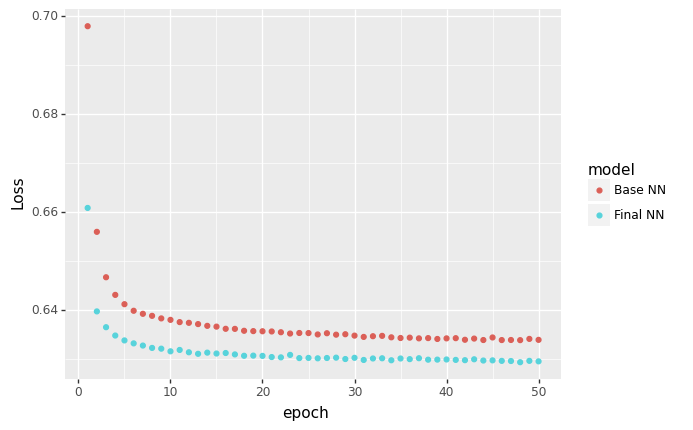

In [205]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from plotnine import ggplot, aes, geom_point, scale_x_continuous, ylab
import pandas as pd

def build_nn(input_dim, neurons=40):  # Added an argument for input_dim
    model = tf.keras.Sequential()
    model.add(Dense(neurons, input_dim=input_dim, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
    model.add(Dense(40, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
    model.add(Dense(15, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam')
    return model

# Base model 1: logistic regression
lr6 = LogisticRegression(max_iter=1000)
lr6.fit(X6_train, y6_train)

# Base model 2: neural network
nn6 = build_nn(X6_train.shape[1])
history_nn6 = nn6.fit(X6_train, y6_train, epochs=50, batch_size=50)

# Get predictions from base models
train_preds_lr6 = lr6.predict(X6_train)
train_preds_nn6 = nn6.predict(X6_train).ravel()
X6_train_preds = np.column_stack((train_preds_lr6, train_preds_nn6))

# Final model: neural network
final_model6 = build_nn(X6_train_preds.shape[1])
history_final6 = final_model6.fit(X6_train_preds, y6_train, epochs=50, batch_size=50)

# Create data frames for loss values
loss_df_nn6 = pd.DataFrame({'loss': history_nn6.history['loss'], 'epoch': range(1, 51), 'model': ['Base NN']*50})
loss_df_final6 = pd.DataFrame({'loss': history_final6.history['loss'], 'epoch': range(1, 51), 'model': ['Final NN']*50})

# Concatenate data frames
loss_df6 = pd.concat([loss_df_nn6, loss_df_final6])

# Validation
val_preds_lr6 = lr6.predict(X6_val)
val_preds_nn6 = nn6.predict(X6_val).ravel()
X_val_preds6 = np.column_stack((val_preds_lr6, val_preds_nn6))

y6_pred = final_model6.predict(X_val_preds6)
print("Validation Set Classification report: \n", classification_report(y6_val, (y6_pred>0.5).astype(int)))
print("Validation Set ROC AUC score: ", roc_auc_score(y6_val, y6_pred))

# Test
test_preds_lr6 = lr6.predict(X6_test)
test_preds_nn6 = nn6.predict(X6_test).ravel()
X_test_preds6 = np.column_stack((test_preds_lr6, test_preds_nn6))

y6_pred_test = final_model6.predict(X_test_preds6)
print("Test Set Classification report: \n", classification_report(y6_test, (y6_pred_test>0.5).astype(int))) # changed from y7_test to y6_test
print("Test Set ROC AUC score: ", roc_auc_score(y6_test, y6_pred_test))

print("Validation Set Confusion Matrix: \n", confusion_matrix(y6_val, (y6_pred>0.5).astype(int)))

print("Test Set Confusion Matrix: \n", confusion_matrix(y6_test, (y6_pred_test>0.5).astype(int))) # changed from y7_test to y6_test

# Create plot
p = (
    ggplot(loss_df6) +
    geom_point(aes(x='epoch', y='loss', color='model')) +
    scale_x_continuous(breaks = np.arange(0, 150, 10)) +
    ylab("Loss")
)
print(p)


## LR/NN Model 6

Epoch 1/100
1341/1341 [==============================] - 3s 2ms/step - loss: 0.6887
Epoch 2/100
1341/1341 [==============================] - 2s 2ms/step - loss: 0.6507
Epoch 3/100
1341/1341 [==============================] - 5s 4ms/step - loss: 0.6443
Epoch 4/100
1341/1341 [==============================] - 4s 3ms/step - loss: 0.6423
Epoch 5/100
1341/1341 [==============================] - 4s 3ms/step - loss: 0.6411
Epoch 6/100
1341/1341 [==============================] - 4s 3ms/step - loss: 0.6404
Epoch 7/100
1341/1341 [==============================] - 2s 2ms/step - loss: 0.6395
Epoch 8/100
1341/1341 [==============================] - 2s 2ms/step - loss: 0.6390
Epoch 9/100
1341/1341 [==============================] - 2s 2ms/step - loss: 0.6388
Epoch 10/100
1341/1341 [==============================] - 2s 2ms/step - loss: 0.6383
Epoch 11/100
1341/1341 [==============================] - 2s 2ms/step - loss: 0.6384
Epoch 12/100
1341/1341 [==============================] - 2s 2ms/step - lo

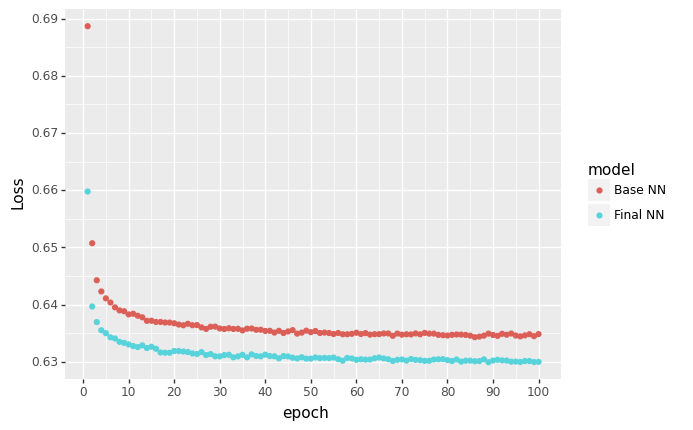

In [206]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Concatenate
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score

def build_nn(input_dim, output_dim):
    model = tf.keras.Sequential()
    model.add(Dense(60, input_dim=input_dim, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dense(40, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dense(15, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dense(output_dim, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam')
    return model

# Base model 1: logistic regression
lr6 = LogisticRegression(max_iter=1000)
lr6.fit(X6_train, y6_train)

# Base model 2: neural network
nn6 = build_nn(X6_train.shape[1], 1)
history_nn6 = nn6.fit(X6_train, y6_train, epochs=100, batch_size=32)

# Get predictions from base models
train_preds_lr6 = lr6.predict(X6_train)
train_preds_nn6 = nn6.predict(X6_train).ravel()
X6_train_preds = np.column_stack((train_preds_lr6, train_preds_nn6))

# Final model: neural network
final_model6 = build_nn(X6_train_preds.shape[1], 1)
history_final6 = final_model6.fit(X6_train_preds, y6_train, epochs=100, batch_size=32)

# Create data frames for loss values
loss_df_nn6 = pd.DataFrame({'loss': history_nn6.history['loss'], 'epoch': range(1, 101), 'model': ['Base NN']*100})
loss_df_final6 = pd.DataFrame({'loss': history_final6.history['loss'], 'epoch': range(1, 101), 'model': ['Final NN']*100})

# Concatenate data frames
loss_df6 = pd.concat([loss_df_nn6, loss_df_final6])

# Validation
val_preds_lr6 = lr6.predict(X6_val)
val_preds_nn6 = nn6.predict(X6_val).ravel()
X_val_preds6 = np.column_stack((val_preds_lr6, val_preds_nn6))

y6_pred = final_model6.predict(X_val_preds6)
print("Validation Set Classification report: \n", classification_report(y6_val, (y6_pred>0.5).astype(int)))
print("Validation Set ROC AUC score: ", roc_auc_score(y6_val, y6_pred))

# Test
test_preds_lr6 = lr6.predict(X6_test)
test_preds_nn6 = nn6.predict(X6_test).ravel()
X_test_preds6 = np.column_stack((test_preds_lr6, test_preds_nn6))

y6_pred_test = final_model6.predict(X_test_preds6)
print("Test Set Classification report: \n", classification_report(y7_test, (y6_pred_test>0.5).astype(int)))
print("Test Set ROC AUC score: ", roc_auc_score(y7_test, y6_pred_test))

print("Validation Set Confusion Matrix: \n", confusion_matrix(y6_val, (y6_pred>0.5).astype(int)))

print("Test Set Confusion Matrix: \n", confusion_matrix(y7_test, (y6_pred_test>0.5).astype(int)))

# Create plot
p = (
    ggplot(loss_df6) +
    geom_point(aes(x='epoch', y='loss', color='model')) +
    scale_x_continuous(breaks = np.arange(0, 150, 10)) +
    ylab("Loss")
)
print(p)

Trying to improve the accuracy and AUC-ROC of the model by adding hidden layers

Epoch 1/100
1341/1341 [==============================] - 3s 2ms/step - loss: 0.6910
Epoch 2/100
1341/1341 [==============================] - 2s 2ms/step - loss: 0.6560
Epoch 3/100
1341/1341 [==============================] - 3s 2ms/step - loss: 0.6501
Epoch 4/100
1341/1341 [==============================] - 3s 2ms/step - loss: 0.6474
Epoch 5/100
1341/1341 [==============================] - 2s 2ms/step - loss: 0.6460
Epoch 6/100
1341/1341 [==============================] - 3s 2ms/step - loss: 0.6451
Epoch 7/100
1341/1341 [==============================] - 2s 2ms/step - loss: 0.6445
Epoch 8/100
1341/1341 [==============================] - 2s 2ms/step - loss: 0.6438
Epoch 9/100
1341/1341 [==============================] - 3s 2ms/step - loss: 0.6433
Epoch 10/100
1341/1341 [==============================] - 3s 2ms/step - loss: 0.6429
Epoch 11/100
1341/1341 [==============================] - 2s 2ms/step - loss: 0.6423
Epoch 12/100
1341/1341 [==============================] - 2s 2ms/step - lo

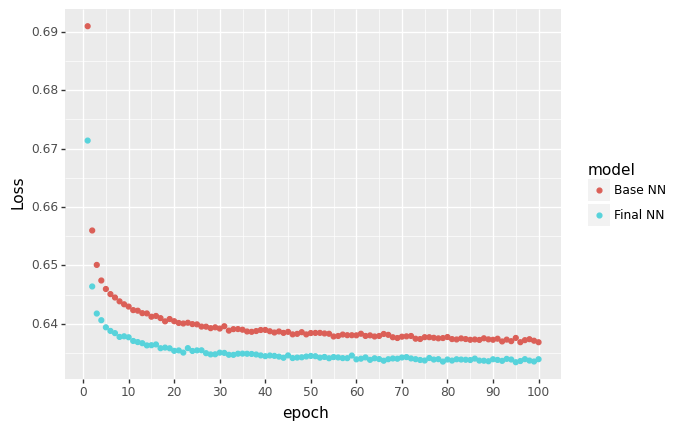

In [207]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Concatenate
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score

def build_nn(input_dim, output_dim):
    model = tf.keras.Sequential()
    model.add(Dense(40, input_dim=input_dim, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dense(30, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dense(20, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dense(10, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dense(5, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dense(output_dim, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam')
    return model

# Base model 1: logistic regression
lr6 = LogisticRegression(max_iter=1000)
lr6.fit(X6_train, y6_train)

# Base model 2: neural network
nn6 = build_nn(X6_train.shape[1], 1)
history_nn6 = nn6.fit(X6_train, y6_train, epochs=100, batch_size=32)

# Get predictions from base models
train_preds_lr6 = lr6.predict(X6_train)
train_preds_nn6 = nn6.predict(X6_train).ravel()
X6_train_preds = np.column_stack((train_preds_lr6, train_preds_nn6))

# Final model: neural network
final_model6 = build_nn(X6_train_preds.shape[1], 1)
history_final6 = final_model6.fit(X6_train_preds, y6_train, epochs=100, batch_size=32)

# Create data frames for loss values
loss_df_nn6 = pd.DataFrame({'loss': history_nn6.history['loss'], 'epoch': range(1, 101), 'model': ['Base NN']*100})
loss_df_final6 = pd.DataFrame({'loss': history_final6.history['loss'], 'epoch': range(1, 101), 'model': ['Final NN']*100})

# Concatenate data frames
loss_df6 = pd.concat([loss_df_nn6, loss_df_final6])

# Validation
val_preds_lr6 = lr6.predict(X6_val)
val_preds_nn6 = nn6.predict(X6_val).ravel()
X_val_preds6 = np.column_stack((val_preds_lr6, val_preds_nn6))

y6_pred = final_model6.predict(X_val_preds6)
print("Validation Set Classification report: \n", classification_report(y6_val, (y6_pred>0.5).astype(int)))
print("Validation Set ROC AUC score: ", roc_auc_score(y6_val, y6_pred))

# Test
test_preds_lr6 = lr6.predict(X6_test)
test_preds_nn6 = nn6.predict(X6_test).ravel()
X_test_preds6 = np.column_stack((test_preds_lr6, test_preds_nn6))

y6_pred_test = final_model6.predict(X_test_preds6)
print("Test Set Classification report: \n", classification_report(y7_test, (y6_pred_test>0.5).astype(int)))
print("Test Set ROC AUC score: ", roc_auc_score(y7_test, y6_pred_test))

print("Validation Set Confusion Matrix: \n", confusion_matrix(y6_val, (y6_pred>0.5).astype(int)))

print("Test Set Confusion Matrix: \n", confusion_matrix(y7_test, (y6_pred_test>0.5).astype(int)))

# Create plot
p = (
    ggplot(loss_df6) +
    geom_point(aes(x='epoch', y='loss', color='model')) +
    scale_x_continuous(breaks = np.arange(0, 150, 10)) +
    ylab("Loss")
)
print(p)

## LR/NN Model 7

LR/NN test

Epoch 1/50
286/286 [==============================] - 2s 3ms/step - loss: 0.7505
Epoch 2/50
286/286 [==============================] - 1s 3ms/step - loss: 0.6741
Epoch 3/50
286/286 [==============================] - 1s 3ms/step - loss: 0.6559
Epoch 4/50
286/286 [==============================] - 1s 2ms/step - loss: 0.6488
Epoch 5/50
286/286 [==============================] - 1s 3ms/step - loss: 0.6450
Epoch 6/50
286/286 [==============================] - 1s 3ms/step - loss: 0.6433
Epoch 7/50
286/286 [==============================] - 1s 2ms/step - loss: 0.6417
Epoch 8/50
286/286 [==============================] - 1s 2ms/step - loss: 0.6405
Epoch 9/50
286/286 [==============================] - 1s 2ms/step - loss: 0.6399
Epoch 10/50
286/286 [==============================] - 1s 3ms/step - loss: 0.6395
Epoch 11/50
286/286 [==============================] - 1s 3ms/step - loss: 0.6390
Epoch 12/50
286/286 [==============================] - 1s 3ms/step - loss: 0.6388
Epoch 13/50
286/286 [====

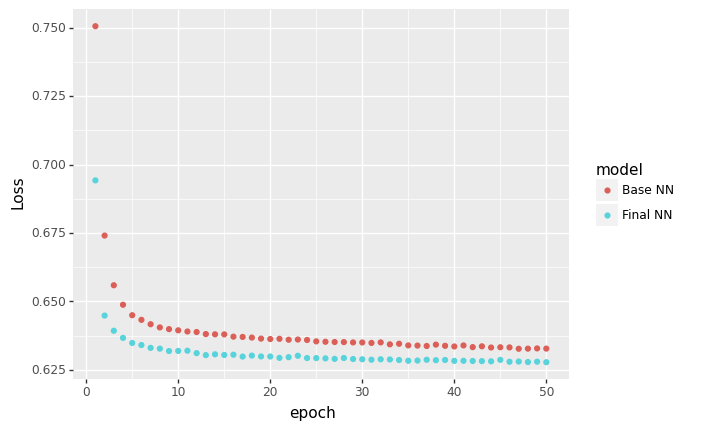

In [209]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from plotnine import ggplot, aes, geom_point, scale_x_continuous, ylab
import pandas as pd

def build_nn(input_dim, neurons=50):  # Added an argument for input_dim
    model = tf.keras.Sequential()
    model.add(Dense(neurons, input_dim=input_dim, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0015)))
    model.add(Dense(50, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0015)))
    model.add(Dense(15, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.0015)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam')
    return model

# Base model 1: logistic regression
lr7 = LogisticRegression(max_iter=1000)
lr7.fit(X7_train, y7_train)

# Base model 2: neural network
nn7 = build_nn(X7_train.shape[1])
history_nn7 = nn7.fit(X7_train, y7_train, epochs=50, batch_size=150)

# Get predictions from base models
train_preds_lr7 = lr7.predict(X7_train)
train_preds_nn7 = nn7.predict(X7_train).ravel()
X7_train_preds = np.column_stack((train_preds_lr7, train_preds_nn7))

# Final model: neural network
final_model7 = build_nn(X7_train_preds.shape[1])
history_final7 = final_model7.fit(X7_train_preds, y7_train, epochs=50, batch_size=150)

# Create data frames for loss values
loss_df_nn7 = pd.DataFrame({'loss': history_nn7.history['loss'], 'epoch': range(1, 51), 'model': ['Base NN']*50})
loss_df_final7 = pd.DataFrame({'loss': history_final7.history['loss'], 'epoch': range(1, 51), 'model': ['Final NN']*50})

# Concatenate data frames
loss_df7 = pd.concat([loss_df_nn7, loss_df_final7])

# Validation
val_preds_lr7 = lr7.predict(X7_val)
val_preds_nn7 = nn7.predict(X7_val).ravel()
X_val_preds6 = np.column_stack((val_preds_lr7, val_preds_nn7))

y7_pred = final_model7.predict(X_val_preds6)
print("Validation Set Classification report: \n", classification_report(y7_val, (y7_pred>0.5).astype(int)))
print("Validation Set ROC AUC score: ", roc_auc_score(y7_val, y7_pred))

# Test
test_preds_lr7 = lr7.predict(X7_test)
test_preds_nn7 = nn7.predict(X7_test).ravel()
X_test_preds7 = np.column_stack((test_preds_lr7, test_preds_nn7))

y7_pred_test = final_model7.predict(X_test_preds7)
print("Test Set Classification report: \n", classification_report(y7_test, (y7_pred_test>0.5).astype(int))) # changed from y7_test to y7_test
print("Test Set ROC AUC score: ", roc_auc_score(y7_test, y7_pred_test))

print("Validation Set Confusion Matrix: \n", confusion_matrix(y7_val, (y7_pred>0.5).astype(int)))

print("Test Set Confusion Matrix: \n", confusion_matrix(y7_test, (y7_pred_test>0.5).astype(int))) # changed from y7_test to y7_test

# Create plot
p = (
    ggplot(loss_df7) +
    geom_point(aes(x='epoch', y='loss', color='model')) +
    scale_x_continuous(breaks = np.arange(0, 150, 10)) +
    ylab("Loss")
)
print(p)


End of test

Epoch 1/100
1341/1341 [==============================] - 4s 2ms/step - loss: 0.7123
Epoch 2/100
1341/1341 [==============================] - 3s 2ms/step - loss: 0.6537
Epoch 3/100
1341/1341 [==============================] - 3s 2ms/step - loss: 0.6458
Epoch 4/100
1341/1341 [==============================] - 3s 2ms/step - loss: 0.6431
Epoch 5/100
1341/1341 [==============================] - 3s 2ms/step - loss: 0.6419
Epoch 6/100
1341/1341 [==============================] - 3s 2ms/step - loss: 0.6411
Epoch 7/100
1341/1341 [==============================] - 3s 2ms/step - loss: 0.6404
Epoch 8/100
1341/1341 [==============================] - 3s 2ms/step - loss: 0.6401
Epoch 9/100
1341/1341 [==============================] - 3s 2ms/step - loss: 0.6396
Epoch 10/100
1341/1341 [==============================] - 2s 2ms/step - loss: 0.6390
Epoch 11/100
1341/1341 [==============================] - 2s 2ms/step - loss: 0.6390
Epoch 12/100
1341/1341 [==============================] - 2s 2ms/step - lo

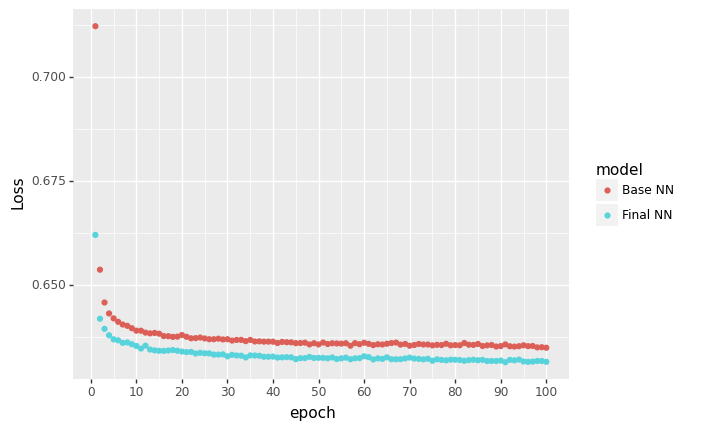

In [208]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Concatenate
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score

def build_nn(input_dim, output_dim):
    model = tf.keras.Sequential()
    model.add(Dense(60, input_dim=input_dim, activation='relu', kernel_regularizer=l2(0.0015)))
    model.add(Dense(40, activation='relu', kernel_regularizer=l2(0.0015)))
    model.add(Dense(15, activation='relu', kernel_regularizer=l2(0.0015)))
    model.add(Dense(output_dim, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam')
    return model

# Base model 1: logistic regression
lr7 = LogisticRegression(max_iter=1000)
lr7.fit(X7_train, y7_train)

# Base model 2: neural network
nn7 = build_nn(X7_train.shape[1], 1)
history_nn7 = nn7.fit(X7_train, y7_train, epochs=100, batch_size=32)

# Get predictions from base models
train_preds_lr7 = lr7.predict(X7_train)
train_preds_nn7 = nn7.predict(X7_train).ravel()
X7_train_preds = np.column_stack((train_preds_lr7, train_preds_nn7))

# Final model: neural network
final_model7 = build_nn(X7_train_preds.shape[1], 1)
history_final7 = final_model7.fit(X7_train_preds, y7_train, epochs=100, batch_size=32)

# Create data frames for loss values
loss_df_nn7 = pd.DataFrame({'loss': history_nn7.history['loss'], 'epoch': range(1, 101), 'model': ['Base NN']*100})
loss_df_final = pd.DataFrame({'loss': history_final7.history['loss'], 'epoch': range(1, 101), 'model': ['Final NN']*100})

# Concatenate data frames
loss_df = pd.concat([loss_df_nn7, loss_df_final])

# Validation
val_preds_lr7 = lr7.predict(X7_val)
val_preds_nn7 = nn7.predict(X7_val).ravel()
X_val_preds7 = np.column_stack((val_preds_lr7, val_preds_nn7))

y7_pred = final_model7.predict(X_val_preds7)
print("Validation Set Classification report: \n", classification_report(y7_val, (y7_pred>0.5).astype(int)))
print("Validation Set ROC AUC score: ", roc_auc_score(y7_val, y7_pred))

# Test
test_preds_lr7 = lr7.predict(X7_test)
test_preds_nn7 = nn7.predict(X7_test).ravel()
X_test_preds7 = np.column_stack((test_preds_lr7, test_preds_nn7))

y7_pred_test = final_model7.predict(X_test_preds7)
print("Test Set Classification report: \n", classification_report(y7_test, (y7_pred_test>0.5).astype(int)))
print("Test Set ROC AUC score: ", roc_auc_score(y7_test, y7_pred_test))

print("Validation Set Confusion Matrix: \n", confusion_matrix(y7_val, (y7_pred>0.5).astype(int)))

print("Test Set Confusion Matrix: \n", confusion_matrix(y7_test, (y7_pred_test>0.5).astype(int)))

# Create plot
p = (
    ggplot(loss_df) +
    geom_point(aes(x='epoch', y='loss', color='model')) +
    scale_x_continuous(breaks = np.arange(0, 150, 10)) +
    ylab("Loss")
)
print(p)